# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

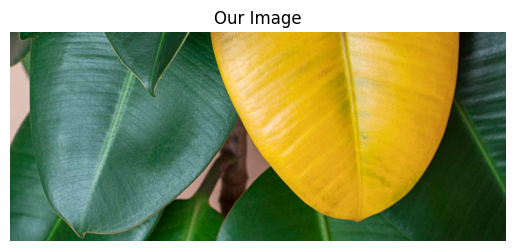

In [33]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data2 = base64.b64decode(img_str)
img2 = Image.open(io.BytesIO(img_data2))
img_part5 = np.array(img2)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [21]:
from google.colab import files
uploaded=files.upload()

Saving AdobeStock_260886100.webp to AdobeStock_260886100.webp


In [22]:
import base64
with open("AdobeStock_260886100.webp", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

UklGRqKwAQBXRUJQVlA4IJawAQAQBAWdASroAzMCPm0ukkakIqGmrNY7mNANiWNubv/ZPYTYofT8yD/T9Gdgv93+5G2P/5vRw8q/7foE+kZ9ZtnVMKamC06+58FM6xjOe39J/+tzmSk/cD+/re5f+5Z5faHwXMT/7e/j4X/yea77t3/v/F65v8x6jn+L9Jv5ee+7zP/1j/l+rp/8P3d97P+A9QX+y/631mf/f///+78Rf9c/9n///+Pwe/z3/oetX6yP+P/93rI/9D1AP/v7ZX8A///VDxjfMvuN4M+VL4f/Bf6X/uf473G/+z/aePbrH/5/6z/e+xH9A/Jn8v/G+17+t/8f+q/LD01/XP43/u/6P2CPcP/A9QH7L/2f7r/TeFDuH+s/+H+t9gv2w+0f9T/GfmR78n0//n/1Pql+wf5L/yf578yfsB/on91/7P+U9pv+l4iH3n/j/uB8A39H/yX/w/1H+1/b/6d/9H/9f7/0W/sX+//b34Dv2T/af1//eN++v///+XxCfuv////QkCwzBh1EN2JV6nZJP+k1X97v6eGGFjDKGseTJ2At5KQukl8NHjrKCcodzhvvUs8/n0es08un/FBF2lJ/q1e5yFiQL2A0qr7BqX2vBn9quzURYSqVvP14ZdvD3Q9HCHZDvcVJl2l+14c+6JfjuhNxBv0u4dwTu9P5m618bza9SV4kuGXHEe0uyuc2sTXxhj52G7GXlRtttrp5lHhhKgH4zI05fcbNiIuhT36jArpsmJBePctpcvtdXPmBvodHpec06N7rrpOuHhtO6gU1rpzQIEUJZqEwPVBzsMsoVAqjJVBmGZgW3L9TnXorrYoEbhPDSPvpKPwju0l1/ogj+iMa7fvHEofOgoTmkkyUNMGA0eK4mR0n8l3a47ojYb3DyEXVrGITg5LlR7s7Ww4k1z1fjGa+QdPxKnOYib/bIwEz5AudXPS46oGiFV6OvjoQ3/lNTD3w6Z93ghcKRyHDersB

(np.float64(-0.5), np.float64(999.5), np.float64(562.5), np.float64(-0.5))

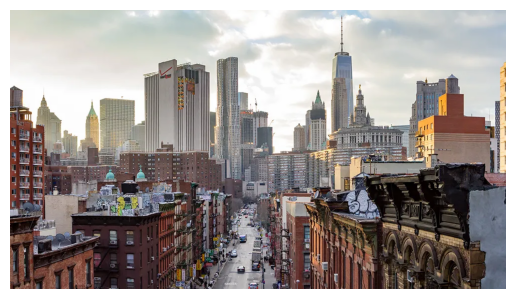

In [23]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """UklGRqKwAQBXRUJQVlA4IJawAQAQBAWdASroAzMCPm0ukkakIqGmrNY7mNANiWNubv/ZPYTYofT8yD/T9Gdgv93+5G2P/5vRw8q/7foE+kZ9ZtnVMKamC06+58FM6xjOe39J/+tzmSk/cD+/re5f+5Z5faHwXMT/7e/j4X/yea77t3/v/F65v8x6jn+L9Jv5ee+7zP/1j/l+rp/8P3d97P+A9QX+y/631mf/f///+78Rf9c/9n///+Pwe/z3/oetX6yP+P/93rI/9D1AP/v7ZX8A///VDxjfMvuN4M+VL4f/Bf6X/uf473G/+z/aePbrH/5/6z/e+xH9A/Jn8v/G+17+t/8f+q/LD01/XP43/u/6P2CPcP/A9QH7L/2f7r/TeFDuH+s/+H+t9gv2w+0f9T/GfmR78n0//n/1Pql+wf5L/yf578yfsB/on91/7P+U9pv+l4iH3n/j/uB8A39H/yX/w/1H+1/b/6d/9H/9f7/0W/sX+//b34Dv2T/af1//eN++v///+XxCfuv////QkCwzBh1EN2JV6nZJP+k1X97v6eGGFjDKGseTJ2At5KQukl8NHjrKCcodzhvvUs8/n0es08un/FBF2lJ/q1e5yFiQL2A0qr7BqX2vBn9quzURYSqVvP14ZdvD3Q9HCHZDvcVJl2l+14c+6JfjuhNxBv0u4dwTu9P5m618bza9SV4kuGXHEe0uyuc2sTXxhj52G7GXlRtttrp5lHhhKgH4zI05fcbNiIuhT36jArpsmJBePctpcvtdXPmBvodHpec06N7rrpOuHhtO6gU1rpzQIEUJZqEwPVBzsMsoVAqjJVBmGZgW3L9TnXorrYoEbhPDSPvpKPwju0l1/ogj+iMa7fvHEofOgoTmkkyUNMGA0eK4mR0n8l3a47ojYb3DyEXVrGITg5LlR7s7Ww4k1z1fjGa+QdPxKnOYib/bIwEz5AudXPS46oGiFV6OvjoQ3/lNTD3w6Z93ghcKRyHDersBaESWapZI9dM1w6mwkj/2/o7cT8M0Rn1ZMzz+gbIATe1hFYr8DOwoplsHiTm1X3H/wbHIWHwVgIkcd1BpZ83Q83shYHhKoLOembROpUQp9/PIsizHYEKiu+kPv/aaJnz0zQxQ78uTHhDzBUhNmaqI35DK1bye9au5nWfbWbupu2yrJ8+uJ9/yEevX3CBI2nbrFF44YUrmtMwWBA9OKQ4l+BURvf05CfsbvYrSByuZeVoW0pqsZXYxG0utzpxmw2E9+6qHQTGk307Ywjz68Kb23rRDqhLVcLhUS8U77wmt2uCiUtvKhTofzSTr/qNvLExrfSwCoot2al+C5M477zQ5BV1bdUKAXYdPK4TMYo5Bg8xtsyhY17tL7DI+BUaWWPgL8sHG7I/UTsEuFHAbAH01LWbnf0o0qqqqjYsnmd6P8dV7VVobOQOFOxCIBKr/n0Z1Ke+3n6HY0/K2eQZLKrDeDMPvr/KMe6Uv1+axxhgDSfE9igT/2x88pJpb6uuncJobHMmDXhGcr8QSL5nKFYXNCoIevfKjulPQ4JrH6YjlnT4G74uhCJIB6qHxYRLGEb+h7Oc/giBvawWFg4JIiQz7BmJsmbXvaEhNnGvXz9730egIYtT7Op06xFJF/gAwy+zp2+D+CwN5BkU/aXFHPDPO/hgbGyUnQL540Wq/VYioHa9TKRwjUwMt8sgVP9284shP4pfMiqUx9wsyJL4AgNq7EmTTSyr1rP9u1KbHJZ4z7Q5zaqkzVV25mJoMkA+DQI0HsC/dqvI/pTIlLpeH0142YZC2X1GrJzGIdKl49InrJgGH4INK332NB6W7iGS75LVxA7cThIy6K33Xzw1+6xoQzJx03MiUK5E6NuXAgnsp8t4K80mo7vhErmQstMB44mz7MRfHr2skb1LHdNrcoujybfBHDhGgBZj9uBYljEWLjmSFgivEF+NkRSMVfaKkKVzcKwLTSsSY99/fCctxqGkT7broXBPL666rlPQyl/WeoiFXc11R8q2pQi6HOeaC/XsKgjzETdQ0NTrP95QLQk6EOroeYJRxs4nkcdlGTHxRu5OZCD7iaDVtljXSVwbOlsK+SYD1kAqADXBNjuIvtgqtQmkvW4z5/MR69nyu0QOLwP2govH5ebIMDeCj8XuhrU8NXAttfKSGFXiC/K+fOR8vuPF6belUdm1Xzk4b8RfmWYdtilKfVneBh/D2EJc5M61u8/F3GKULWFTHKGgSkNIJOMxx2z1LBbG8ap6BGTwAh4PtAdkWzmfRomlfxgzlpSsVHzcsVhc/FckZf/ZO6jAyvQhCozSaYFyH5SOsRf+QShMXoYvirP8Dno0B4dACip1LInelkz/75ShYBy3+0803syVrk14vMfCFCDQQhh/bjhWzdGnQv7Ro5KpPjh++eWYyvhVCYEWERR3ISrfyUeCDi6hng52Ia4FzEkvDjoMeM5KpyT/7CE2TuaSQoSV8CTMJoCa+m4BW8yd54n5X1n5GtZM4e8kffHuEkICKt0iQYqqYrSAxswwIaXwUmnZIChsdMIksMm4Lt1nyD6hlXv6iZZhpntmRpIPDjdB9Y4fmSDaG/YMUp21SUzKN4SjzeWfA43QVG/n1DseuZhcXZzHFFnCkIPyizshqRPfK5AcwhVWccBzRWQz5Vthr5bMp7CI2X0joDdy70XM3jijGqcrUKor2ohS0ziwtMK1rBEhmMbhBppu9Pdsl1dbMaPIrWZMte+Krr09/kP0GW1aS0p+BbAJdahgBlvr4BV+rXAqbuN5ehpe89xnIVIoRuzc956va+gX9xULQiuZ+BeTtSf0aGE+H2+J/Q8BCHQPnN8v/FWGRPJHztdQGShHLls+kVoRAv9hyboEoYouhl2cX4pQFIXY+fHo/52XEZWry7tlnHQ3MxlCM9K7SJtbBTWbrTLsSqvogQL9DesI2wkBP4NSUiNy/dEgZscmboDNjTO8L/bFXieCe7lgvZzVYvY6rR1mmmktfVFPr4sEH+tsUnSOd8K21FverJBVl0ma0Im14pY8EyKA0rJPavKElU2jS7N5dxSOBOZcoYC42ko16ynSgsjvLjbvXKckO2MqKMNt5GEffO9Kb2ppHvdCqzXhfWpxaz1TTZGlI/0RNvDyahY1dJ+rTeHLu7PRIwsXcUWuKqthjdhQH+p8jis0Q0msK80jhz8vz0QSYJ/95X0jqAFAh9ymKUXcRmvCKnKdgCoKs6+K2Jg40+tAcNPoSwtQ5aoIQglvXwKUXsL7k7vPAxVQp6S6kB3cTuV1fsHq+J6u6n7eegwfalxc7v4ea9bZwQTk3mGhJur5WcNp3+yMUIhtK0dpM2xHH8n0ybCppLqTbUwHzwNpWpgwPHPLUTdiL8WkHJaZ+iX+PYTl+8q5hiNzwDqkjCW+NMy7qI70r/1lfh0kI2Kbhsjy//S15KWOP+QldmXy/tecOXlzGpLeyqR4RhpfJFVo39V1/GMvDM7p9ipEO/WLOc/uUtz5jJKvkk8JeuwFazwySgJlEVHSEoa9QZdDOI5+UjsCyTJ7KISQGwsoZ5lsFo4P8kNk3qOBrsiIg5ANlPTjsjpC4rM5yTygSHOHc4mQbFP1ClocV5HBFVXcr+hI9iZgNAQ0lhuoDYGFwqlaEXuodXQ1FcbpMwitPC7JmnvjsmzOS0K/mgjTAk37pS17XXHZlYFS1TaNCq7dnqhqV6+O2OQQbm/y/igQVcdt6v+eEA8umvTCZmDQWRw6y8frcwcPB0zkuMd6ZmJDz06Rz6D3BA+P3Eqw2rRZMNybQ9JX6WMa1d55xMbEEBiDfYIR+uK7lvkjw5E+3eNiCEt8nxc3fLc6JNm4xoa1jlIsZmmAji6lgiRqOEvxWLC4J0GYQZ1k7zI+xRpQeczVv3vMQDm6uY7FnNgD6X/V6K0GzWyUk4FD3qFYoPaK1lg9AJhUjJW1TwCZfWuGc9gcUDVW9fc4BnfaXQARwwREZE3ItUaJFtNvXZnusq/3V3+EZDtvXFdSF/kUzZCUBGOFuyPvoHhm4OzHuiBcCcMnApumnj0HpG3thmIbDposUc5WCRs2wvRS+wKwZ6EfCOnumVFwXGV6sHJwjIQ5Yp0oHtLWBR0nb9T1FFyCMz7uS2MSFyE9wRzrTrkvWwqwxMHr3oSPNDIV1a5JAcOA6zqsIKjNtroP2ADiQ0L0kHvG8bATJXbEKMekF2QENReM8bjzzp0kW7GDRfLf9e5w7Cnd53pc4VuEuF2Nts1wzKnMTWnLc1xWng8LodyZa6RzUMxC74xOus8SEmE291/4dfWsOTTZ6Nkh5ANk9J6u9uT1GyqwTJIq/cBBKztkWTk5YUYLhGYQqLnEchbMfNawxKARFo2r03QlXq70c5xkdE6LmIugomP0Vtn/XEJiLr1U8w1UP1Q7uFkFS+t0DZFT4T39rDnvkC5m+W3rZRc9+OYRr2cGjlxpoLpzJfYK8DGKV5805UboWx+7M8uIKnSR5euxcfnRy/cbn39j2p6zilo1fFqCarAMbNtREXHdcaKowVMCTcDwpbZKPHt8cOd5eO3uteS0eavp5YPRaCHoW8uFuJ1PcPe4tytgIImcRc/C5Lrp2GTgDv5PF0q5SakNV1ZLwBfC5Tba6RSS3srGbu6b6CAx3Jf1t7yopyH+xSYkdCmQDrxe96vv+QuCDtKK5wSYdtZuqu/FlDyKqob421g3imLxi+ba4COsz9BJ7ae+knH0DAdAvraOEn1we7ET+NSIPr66+4zri7Yw5e5ry7mDEbeWq/k9rw4lu1M57/D/qsfe3N8fDnQAQujgM5CCk/czPZrsRKdtDwyM+lk0prh+9/z2oaezu0tTRPGKpt8O9GpcQZf2q2tevZDTSm6ZGHnT1NvDtKG0P7+NZWU5i2sOs4QrxLos8Lgk9KtDha8lFNb9vCODWUHQ5Geap7dwaPE59FHs3KCkCDYPbf4eHyK3xOenTrR6d2mYrCXeKrp5Df+KWQd5hJV23t+t1b1gWTnJjQrArBn2Yq4pq+AbVjv0Ex7dLrN6+pphacAlGR4SezLTcaGoBgASmHExS2Pc8jdz4VLfTX/QR1EUzmG5y8aCM7VQOZxLUprxo+TkP2Gjw4+jp4XrTTT8dEgRhvjUcgl+kfHjfEtmdQsO+F4rkZjdXdVkMOeNWHUg1ILEgo/IHV0KMOQoa9DAVHoc4R8wQdCjw6Kbr1J7x6WyoPnXQf3diDzJvOwknmlds90mh/kOJe/VhPH9tZuBWp80HmtdH/CBj6gFJ3lhPubS6YhZYCGoUQJKu2Smu9KRLXFJkFRYd9VghMi0LJ2FWuBoOqJ0x7lE+5KhVkKr81T68SX62t2Wo8hbAAit/GmBjJMZzajbHLGiWBG8OnaTGh/VR7lsKa19iz/yeAF45SWzFRzhqS2Y0WrywtPvA8z9A1Akf0xEaxLMfMMZkLSx1ZIv8AwiHnIsENcLVrx0UkO7zsvmDv2vjCgOLBvBcdScYpCT/Vk29H0LTLnWeYH/mHqkIBDutlk59TFrkYh9yhbkFHO7X9D5L/bJ1ijt+gzOEhdID2Zynf4hrpCBzeQazv9Wo52xqL5AgWHt/WQUdcsN7TWHSeJvo2u2rfC2YyC8thM7rAfxRzCUQiz03MUtN5fwfjT/lnhRUgFogQtSC50xvlODzRy4GQkGia2FFS9VeU+M4g08ud0fjgMIGvwy8ntYpUu1wJFSSDaD/lfCAEba2WfmxmkWynA3dHeZbVjTQaL1t8T5AGkxfSrpFtfsiDtdJC2Be+TX/oUJSVh66fnATR7rla/KMY+dNQD9Q1+s2U+aBPF2PeDBuG/hypO0IQeTUKA5xMvfwriK32lB7lBNGyqStERXvPxTc7w2mNiqOc7R+cLS7iTNBsvBa/kZe5urmhuYhOxyhSXcQc3nMV4GqMt2kiG/OOdsQq0f7Ni3Lh1GA6EmbnbevXeOskTWJCbP3dmZZVmtCY/HKbks1zOerAtZ+kyje13ClYpLOlvo4fi7SptSyqlc0hD4urpxwbpNwZeY/FLubmJg72+HvxX2RwpRxMuXDYnNVU4bigkaw6zxcqVsAYpqm/ZrdwCidoGlqK4EuMR0RL325IMGKe5zKhorwK1x86ToBpBef5Wz195SwW2ZJU44bYjUCcrPS5kQYpqw7LuY3+1zzp8l4GNMivcbF9kNar3oJNjOhl9Qko8/HiBZdg+RCWyjQOCBHLAOjQmewLz4DZqDaDWj2aICx6zIlGv/sqMYyF/XiiBHNCOorQ1EkYuKhI/uQngvJikQ2slC/ULEGBof+oJl+L3yzm/fygpftJ30CMLZlXo2drSikm52E+2M7M33ybwgX4UJbO3NoCraUdKRT432cnf+UOxklEbhOGl5pAA4ovaG8zajYtDx1L8iF6TCRoBA8ukr49Ppa/aD4ataRVjXW7BNxclObCEzmEpnsFItiozkySEWAt86tzC2ybkjSYyF0wercWOg4ZnadPs8kULc6f7tg7kloZk09Tu7XkgjReoUO807PQH5G7PjvmSjPWs4uWBmKZkrSPZw6kS09P85+lcer1jBeiYVHwGxLvUOxfpGDEpx3fZrPROgMXypHOJAWxLKNC75J7LHpnBCOeG0/z8afixXyhWyOARJ3PUmae5312w0ORX9UQHriY8V1LyoYKJjroRpAbpeUWNtxP8F4furbDHZyHhoyI1o9sUYMNuiDhMg7fWcYcOmGrzW97YHr/y0XITMC33aTTBe3o7EG8BgrdhK3hm/4Shp1fE47lEa1WbdITafNLycPNlR3R/Rr4kDbVdAAlCv+kbUDfH+6bGaRXJivc69S1N0voQq3OJ5UFGQFhidY24lpIgwbiMw27hL8Wt+WLZnPnfq2BaPxE1cte+kqDshV7HRJTkENKktwzpgbYFL3UJegYr4ojk5F730Kvww0zax2VoDcDRuttRD62CKc6IEJZhjhEBW73btQohyDVyz5afpG0x1j9I7dFQZVPPWSMkG0VGJU+zxH0OeagFi9BkvcGRtB02gAW6Ek7kEs4++JviUdlQ7pad3iPylbPYiimN7a5BxjW2cQZ8NJAwEnJVcumj96fygJZGTshYnoRC/AT7MSVnIUpBdyPzkL6QqVwPLojp1tTCX2Bpj+mmMAQr5cBLYFvSjJp80gA0OAhEysf2SwfxhpeguTkTxD1K++jzby7hyTnZJOipwmNj9egZ+TVJg2HbiKuwvZu8aRAW+PCFY85IXAu7wc7eLNL8bUOU9ZqL/nf/OaPChB7c9x3u425lLV2ZYBJp3C/Trynszm5bjRlwp5Ux/yX27SIcfsl+0zM6MEn84IdW8C7vs9yJDg0CkM1b4kBm2r7PfpNpL7dKOuVE0oHSD3CsPZ2DulnsSaziV44sPk30KXosaRUOgwroCNKwDlVvEtvb/f2wx4nLZc9VDng/eVbwuDs1joxRxYXm7RxmX/5qp6WQ1z0XDv7u0wsTFAjuVHHnXV4Mp+yPX10vy6e8/1dLNsRzkSLVqNi0mcNMs3Sj8Lqn/CDY4m+CbNbImTwvdOUiBw5OOgW/jwJF/tBzw6YD3rbWOFDmr8ETCdpnTHckFhrNVMowDNWWVIwgC5wsa30KuNhZMOMXDdm10lIEV/fAo5MxgCYZ1nne8rmkvQNGkrVe0X2RCdIH8Mdk0uNhgLkDAF8RaSvZ2dwm4A18xKn288GQ1mO1tQG71rG0P0/uVpqbyZEY1YLgJvC+6KCe9gjV15QZtUr22NyAWaR+JIlQKN9Mf0KrfX9iZRJLXBzCN+jG52zouBcVVJ8YSrvauBtU4oIvTh7FdC1gE3x+T7E3+JkQSq4//2WCSJp5efqgOd0Z/NkEiGe6UwcuDzfpXmUvD16slx/QcEhMZ0XyFoqnHjTQhRJ2evHP4qqKvaXSqWnQIou/nCNicCuXxuhxuxpYN/bj/JKArk5V2Uje5OrUm1pihP9YW2lF2LXRVeUzXnEu9AmDtQhlY3wEyMVxPft1jBnWsseeZFa9QQgSMYi43UmkWtBG3PndS/k7CIxLPjDmJpcfv0KANhy01OWxwajMSg48lnYhkS1yUlBtMFOT2sZNaD7gfbl1CYjneZykft52Cb/kgQRofsRbOtw87lkI7iX5kwQ7k388khtOdt5Of0/C7av9fxgK2tNOc+gVY4ACGlU8T980n5tyHi0FQ+LasRNfHarQZ3TUMrV7KHfTXhXK+/le3TeWwxxjfvsdUyGp+bFlJngAtS5UMWw+gb7bRlqF/zwQB/PdnqexXhbsd7i4cE31ifp5u7ro3VZN4PN23ffdhYPaPmth4/Ria7k6ouUDKuX6l7vNjut4g2n0QyvWloH0T7scnXDQdOX72Daiy1V6XOFBTw6Riw72upL+SSs3tEnEsoVRIWwZuk7hYJRHgONK6Zn5n5m3c6+BAk6MCo/mJcOSyt6MHfW2RaZui2DCS4y6QctEN95ViYNRl2bt7an5dmeO4cXzdkALJ82DEL3iAoN+6bJxMVmX0gckoOLE+xfpAcPQtfC8HOdl+3N4+wK+/IyMs8AfexjZhD5wATV35/kIw/OU5ffHpUlkOpHQAdkM9AdN8Xl2isAJSZKF/+t/tlbeZ8WnpWthA4H44ngGp74CX+Ey3RkitTp5lzSaCpL4dm1IZHXsDpsHrsU73WhWJuO7N6RK8mRN4jWQMX6gbbFR79C1wA3SuGp0ocRmzU/sQfhCex2c9c2fagxJgjs/eB+Azau28o1gtLPngDw9mt9Lv4QLd5+GodtpVnjnFFX+Z7FN5QNyOwLoA8wCPYYn9Ek1LexKNTREi4rJxeDXrjS6uJZ9zvjfKF5kujq1UqWHV2FjFT7ux3pb+B+TtEeGrzqPVkl5UKWfac9MfgdUETxc8KeRf+4QumTYAo4Fycob/CPPy4fw6OY6Y5FQp8LtPHnPEcNkYkyFSZ8iQiSn7eD7boGFdjr/AeokF5ncxOOIjg/2BubZ5F0xyH+1zVizHQe2hbcr86EKPddo1VgsAOm6rhUJlYsX3/VILC+JzeNnXs785m8ZHDQxFaT1Irrz8D1VC0fA5mwbYpRcJ97WohQV/0196yYoEsIWEZZcznFInlXIif/wIqxzfbRzOHzuPqbbuRjW5LyIZQ6NHzoqellPm+lBS4GSJGxVvuziitAgiVQ2edZuMEKkv5rXDTCQKO2NXBrEoEPDZI3TD3iIDRc0Ln7BY1fI5o5UmEnynT/HIi3vUsY1xa2fVsla4lUd93KJa01HF5bwWkuJwfvm4X87/u4cQFlLVvonRA8zgRwTLfPoDy6V7haoXQr9m65Rv4QHNCyfc4g9lOlu/NkZt1NjoyrzfeufSdGy7yH4z4FtLEqGAqBT2jjIkwBlgoT6PsAcDJXQi/HOglPJypAfI73JfK11RThIVkWXjmBEvW9ZPyzIFossquX+LiAKCXw8g77eDmnJaC58lPsjwRDdscKe06yrO8ME0RNp8e3Hn9w8femiAmAg7NsR0Bbg9LUdOzJNuOmP5pQYXBJT8ACGl1v+GgW0LLukagfh6wjQMoR4Lv1WN9hl0Vjtzr0dHNe6V1aw2D/N6X7p0HfiIJq+RCcgBYP2hdtPqWqAW7nZtHPeu12E4hrEAippew3+jIr/8k4Vz2zxEnNe9ulfT+Ob2t3eyBvmEeF3k0bdCF+1t0XRLhkyFTqbZd3LxKZfu88iZ/7I67e3lv6ojuVwoo/T3fOuhomxlRh3HUsYf0W4YUCNxqtgtFI/6Va28NOTtSojfpsfHNMpLuQwETA11Kl0xKyeNuTkAuKH8U74bJojcjL26fVVzpmCEsN0R9JvcfEY2ty8I8WaYSfFOPvl7uCD4vMFx9JymWCT0igK79UoceuYSjZp6kboR45gQjaay+tmFtq73/y4qVrEAqcp1SwXTfh11f9rMKpyC4IgGIvEqljJD9bEvVxI+MMPIseljIJV4+76/Rw0gQ5ZXt6bVnzdsUY2Vy8r8wex/qlwLt0nxfCsWnCXRVcuSF60STaK6cpk9qXI48y5bfe3xLEdrzt1KUBIj0dYKGLvNXbYz1LxMqfVrjwbJGXb6x5yRqJOMhiFwnj+0ukEF21U5tMN6YnBvNNTGQkWgBBlhlN3EgV3/4sOFBE9PAYUjLQeolzd8AgVix6/aa02/yeXXeOSVPj3rgGDDpm3szK2hWWpsLhxMGkZ9hax/1x0zXK+QotL2jVevOK/sOaBI1/5tc0yE4J/NyNzCSY/XdVUnNLCsR/wtyaO+VNs6ypPCvKgh8uQocGF0HIlZkh+9w6DVPMg18Uun5MM8gzoKYMpMpnsjrxsk75r0Fpjb2+DQWvEdNlfv/nHv4s2RdbWl5FpqP5GYN2hl6qASmKVMeJrT1nydS3D6Vyc78aMhr1lLve9qkRMGAortrAfj7Ok6Tdhm9LKF8rBieWVyE5GoHEJNfz5LZLADLYGcZVekMnMqPktyafk4fRixF8vxBCzvygYkZUxxlhN58GeXkT56OU+nX5deV+flRqk5hRBbEFNOJwZJexWZoZNR0xkAA24Xuikxqj2kyfkiYRcpsau1KRogIOpmPr/SzeWAA6UCE4i/fmEUOFbhu75H4L2vui3xMF1993D7J4uBHQ+0s4K3YiFOwnmr75BHVZZq/yFpE5uF8GcG7lVjzVb14CeU8wLP2FI2k3oeYWC+X9AN53frAQxH5E8pzeZ/8HF/2hQDyXZtH9XWywRYmesCuaELn9P1ntIBnU+rypW50/TwCVfJN7L1hUAGvyZzGI44Jg7mMViNgYp04TUjPOlqrqzeWvZ+2nkJZZ2AzZgfHrrRrxf28tyPt/Z7ss3/uYcj7VUy4xCSrGoZs3JgGUriKOFm3+nmhGRixzyoFPUcfsSyiKomTsgYevgUzxrH+lvo2VTP+6si7M0ktbCWn83np3+jY45HxyCXPC9m5i7wDn1I8gEr7tdTo7isVHso6ejiIpDuar/mnmkfoN/gx0I+hq8Bteo40uJBQST3Uu0DX5Ib9q4CTTtwWoXNz5uvlBkTdevliwvdgdEHnkydJbZA0PitXf/b2PhQYSpZXfbjrphvBf0g1xkFr/3eFZwU2Kbjz7D7RHN2nUXrpCt/BgbdcfXEa/DnmLGeh/okf5CZ7Cbx9tzzQKUgaffwFAm4ARCRtDDjN1jqTh4BEQryqFYHaDnRHPPBdyhhQTnnaX8E/87f30q3vemlkc4DLaFftQyBSn9ZfPqMwwb1x5sPI0shp9t5Jj0bw03fQGd8jg9s61mplIBfulEchFqQocx2vhHzApDfCBgyNZv5F0/8bLzG3pFsGzzqtQnM/7JH/jFpjwUFqdp8qHkzAUrHm4HuXrOaAc6WD/v8DzQfPPiPWCFhus2ob3zL0zyKA/TbWDyyy4nGjuWLKD1/g5jQ7u6jXWQZiPqD+l84zweJ6EBTA9zxVYuOaGbV+82E8D24yrTtsyu5l2iOKUIVqBeqm0WOyHaqgCDVTXq1A2UtHhZW9IIaZb+nIWWz/gaOsI+4zMaXkeHkxy8DI3is2D5MGOy4UZoduQI7+eUBRdncye8gfdlAQw7Tyf8ke2M3AAMvnIuzNO/7v2oauvL1EXbBM7zerNyKc3jwsytV4kBCKV3IMuLFXuyz6bTxpjCkWGAzsj9tNmwFgDcm6RYoDv/69OY/8RTFOnS1p4h6KGaAiJpZtesorGEXKM76/hOdbmqQisF07vpWOy8pigXvJgxovurtAoJuMRpK2SDr/OM6cvpoVVpqxWTLvVuLld5PHTWCranBu+1bAGVXHRM68cEL4T4LsfRdm1gj4YGOchFYF+AO4rxPuqjpgInV4HNupJpD4kLz+hb5jJLy3LjnVekNugHda+TBkfW9GWjdGHORCOyt5oWIOfm187IjadKh+F+R7AlU6Z+dWjkqmoFVAoIsVi68xPh6O0g1mtSa2Ed0g9W70oxLdB9l5RFgjYnnJfMx5w4eyDEu+5/M0mHqsZD/AJUyDzlpLOjyHDqkLG43N4g4guVYEVpkBWkMlPMuBMBKfH7VE90Tul+ots7CUzJiHiRV3ozenSQb6G+Jl1MegUVBfJ/fE9W3ZL+WfIUtfcF6/J/WB8fsfwVbtS2bf2yD8XDW/HysmXcV0NlDsOTjNJ92agHZnOvMGFjbZ3R/kZIeQv3iHE81cDSxGPSVUFUaA0d8jo+uIePZcAMP1FXLvkolpmyVwzOIH72QDogFa5EWH5W8i49S3ai0UvOAfAYqvFxIEP8hh1/72Z72xV84TC/aMQ/fsGyzjUmvZsTadLb33D45ekdp5urzsj4l63NtOdpUmiMYLiTF6AlUT/F6hPBzZM58FHX06VqwlKaodl1THUC3Z5ERNLpbcBgdwwwe8t026mRIyjgLm/ERS54hTneXdmM4F9a6jIaibFH1gV5HrBvEb+qwXVMBuDmabdEqUN8ReNnW8qQ4P0uQJ9JB0+4HQMe7BwVS76iiiqIYoJVY0Un3R71X3AJBMf94aVqo9yLGJ61KYTeCeRqzuYKjACc2hQbGSLYQu4SugOkoF//1zs+l0+aJiRec4Jn2PK0Gtlz8ydU5eF3r/buq36UlK6Zn7akHkvj4LK2NC3Q24Ink9ocMmvv+GFLhGGYxuKc6mmB/gR9EAZuYYHS/y7cJbrpT+/qBLWOIL0kZ1SOIDququ8ppvAEye+Zs7xqXp6iyrcjVegOnyd7APbFnAM+ABjBN/Y3d9gEZyP3EDCMO6HeN5HNR1XMUgiNKmsLzaepLomuvZXX5BsJObrMdabS1lnJWbUn0Dg4735J6KPGvMI8aXddU/hJgQBWir25RXNzMsfmV1259U9oNnCzRoN6NYRuDOQewMW6oWLufhS/Y0BST/1o+dPQxZVf6RHSz1L+r0srdlus8DTmgq0U+amO7O/3TnaM0F38PqaN7Wi74ZVfLLktgLWhRyPo1UjHNnN2aOn3UjcpcCsHu9Jxl5cqBeEjpqc6+P4NI9ZCySH5nQW+s5+i6QGa26graeZ3EpWIrkPrYwkyLOc7dGxY1Q1jh4/kvpuIa8xyGQomBrbRp2bLJSnpYmwNpAT8UmMmPlXRdc9k7FzuNCh6nOxkOXY+o5JiU2kY5Md2XQvubw8RgPEWq3WEh/G3HpxxcurySSy2mTyM1FmR6kxvNcK7bKh0c0F9isEbD/JaoI/E0nXZIQgj/ww4Z1ONXZ9BChyGcxDUhwWhlz9/xu3P26rljFmpAQgiA8bS9EL+0KYecXleXXOQJmU6C+cM9Ik+NY1N9gURPa64sr+jSGlcdxqasHzaDF/drJTwZaz6hLtaZ636UTsSMZ3zZ/GJUSboEEy6KCtkHy5PN9LzGriOKamhm6ldkhJdIgKWjU2y4VtAZhXvGJS2CTKX5pnJTdU/HeJDq70AdygVBXIMPidXFFrTCbQnzVa7rJX1IE6nKOeGeNs6UfGfzottH5IcUeKLmtGXu/FmzXT5mdYVME5oqmPOAsLtenMRsXzUB4IuLHxtX7QRn0E/syBEW9Kq+AZwT3YfwnpEcEv9+Day87F1/q1JFn7BUqcOPlt4/RcWr7mpg7goH/VEL2n9klbHAa8rEPGGLmDj2x2O35AtTSXfE5MeO9VMst4HoyXzAX5zQQBTbMmUwe/zuIEujwabVrqiIxhreRC/bIBTO//b272FP13qkVOn5qQ7deDzo9xAPd/2/FOukzCirhYJHXzIkY+y6hpXeTTDwkl+cEqVXNyQMJ97HjdS2tskh32oJX97E2nWefRRLOXgPmQ3ahyQ3VURx2G0wmEkrTJHNJPQAA/vkqYmfPnoitB9NCSCxWmCdyxRKL3n5yUke8cORxG7VbAsxtwvbjzF8vStsBSoOLJ3VwkENsALsJrRTHmkb1+5bgrRK7DCleeqhGWSgrfwhW3qywhcLyAY0uHgLPfaEZdHkgmJYeFgNeFRuHNftbryckvQjFnldI2cR6VvB5L3HHVxRDRPzsR1FZTxiRpxTBi5inaCQ+QmTn+cWU1NyM4Zm/2ocWGtsizaI6kCTKDJy7u6Xy7ZC17aOIkxz8aU9T4Zr8T1e24LIH1keYZ189MPPgRNDp56GKW+2fZB6iieVprgaV+bePKH48V0ZYYv5ESnJfNPWKmUubw+8uF/1RQF96zSoQkvbYDcxywFyXYKA73KAQAfuaoWLrrcKuQ+UC4uGwpLd4gstNzw9TQsFf0bq3V/isHdSPbqH6eGcT3tEQuw9SJF7CkoqsBN7E10ADsrcafsN8OFBSkjurNxx25+SliHzXBmz5v97y76MrIJsnn4WHwRVGIzX1K7isA2jcfkEgAiWnISIVemWuwJUgwJ2OKXLdFNYGIipuG7wwbugzl4LW/dciIkPTN+kmtgSkO+dBpuxlupAKfTAZ4zkMpAlHRvbAdfzdPiQYknlRzVXwh2Vu/AjU9kzo/JsnK9PTqCf9PlWP6xrq/S82+od5RLxZn3yFkDzjoRkuGc8JmRm2Qy/ZPCTGsH6ufAKICu+FSxxKIE1DNLkP5gVXxEbUU/zgcYlg7pyUrDzLthdk8Wn+PXHEw77CrtME436Owvrj7KZaMRld6+iatSJTr9irlCu0hjFMvSS8X/rHRl2aLAMWknGkrfg/3wiQyis6fWw2S5wfSmb+gCy91mU6VonVRKXItE3iKXEkEAY8zbZyQXoKI4tugFDDjmH7CCNCrpsDGd6oHgZVPwJ0ZxTfIq3kiyjeZQAYIG7689DO2JvUGeAvs+zbwtvx/2jWtkoKtjLirJRMK+A9dufAuP3YJHb0EO6FL+jp9IHB+xBPafLD4AC10EqvJtUqwtWWsPQNNTogtRQmZfBaK/4QOs2swn6/CSBKdKvUjHL0Iby33b1RBhMWC+2PX9Sk7rOlxUet39GfG6ZFLUnSkrcQ+aM5rI5iUQ4Auq+YDAUl1McXAELMirGtfn+L3Qx3TKLOqkMHJxETxdEvuPMhLzgab+Q3HvKfzaZwKwxoL/5q5BUeAAPV6p6yDC+9Ev/0AnaK+bnhXtK6Dh4cyiwvlVC6U2b61oX8qo0pP+rWcJ1HPntM3MwRdH4lIKq6ZELgtqLbs4ck1NipvJdck08f3MJ9KIOIlF33dZYjl3Ql6qwvUMmLDWjCUr8WOx2fbiTiYZDxi0MJyl/yzqYwJXUx4mqRdA/5IXSLkq50/td0ZivVhLXMudaY8xneffJU0AFgetJwYtIpf3zjewsx1ynntteZDC0tGuFwFfkBm0O5mdYkdJAZ3pojY0ql/uDAMWtbASZOY7SYHRz62JFOXiSkFkXuTRlhVoOfx7LNG8bqbxchaPle8MxC6+dDefsXA+053Zey0Anzgvt2MV3YSdxXyPHWH4xznzAcGTwUjUPpyoW2JIShHME4+kE2haotflrI1uEM4ABJYscYF5zWtDovVceHxDtfUW3Vav9cMZN3IoA4aFdSOAly+vbBzHMw4kIpU34roHro6KOYSDtMTA2gr4l3FhaZhmtXSgPI0JGjGiCxboS55ChEs2UomqWRRq3avUn8SBBB4tZ/avAKE0Fkrilu4cQGuOOnywSK+verdS9sLsE6YigQHJC0y1lKKKVaGmlyjXRr0vbtJAPvgTr0ump+cSnq50KAT3F8rZpez/4BeTmyYqBS0sDc2LUtJJAEplD46GJABFKL1UFb38PXj2QZm/l2x1mQZbBdST5jB+ByTF0a7Owz1dUyvjSO6WSpgFf39iv+jfdkUiz/PKYw7vlZWWtmA6yR1zkqziZ5r9quQHYZSiUp8rnYsd1fAQDOanNrrgh+yv9fnsM7ARhBM7p78fIbkTJV19UHv1qpgJqZbHjkSZ6VveOBWbHRMvuQywtygHxCQrfbMQ42nSd4L1Q2VIpqn2XaP0HJ1TQaZgwXMM86E5/qNT55OeKcZ11GEAo1Py64FEP03MlJn9mg49XpFhLBcPUgudjtiduYf4MwwhdJN0DEVymU4I1GKYtSbFeWMFQS7U6IS/ZwkV/5G1iYxPYq1/XghiyYMi2EiBRwFmb30ABigy6bUoyKsePkI1beSOve4LwhlRChFcb1iYFgikQPkMnWqeAiHXAA/zjIBHrDnyN/G5Ss3bBwaXC9TJnf4iMeYkBXqkxio8e6pcHZHaHhS1JNH6+w7rXil0zNWcn2N4KfgmlKii4ZRxo+pAIvGGUlgAGj7qzV8yppiZrdFnWy6ShsoBADYyQ/Hady0c4gIqVqcDOUn1Wet4ItoZFtVUf7rU1j/D0PjLs/IH57BGbAcHny1aid7i6bAKRmX1Kd7oWwWnWs1bLx6m3R4Ur71SXVI6SsIbKOx2veunWOWBopPob4g9phaQ+sD4T9mBb6tE8X4CPEtf9UaItxW2RDXh1ojmJaCZAPw+s1CJkynRde0vQ/UZfxg0qg566SFfw5Fq7mrdCeB2olAwMbKBg1GCkNj15BnjiNTMTRqPTRmD+1YQBg1qJqSoeXAZkkCZKakOd3hnNbBIn/zEy6hCyBmffjknhGmtagZCQ/qU1kno93P8+bB3zF1xysUdnF23WgUbwWoX0+vvZ8/7aLfH9Gd29TRYeBt7HBfbZSBG4dkiTr20pUpTw8w9Ch5AunI20urAVZyvkD8Ezc2aMpOYtqDyVU1AjtM4wr4w6vOaZXeJEBsOGDrFFv+OaJGTawPKzV/Xfg1yAjpzYKUxDNFswDCk0JHI5Uh9QM3XtPc3qY/nSAu0CHZsbqwuUUAdgWsCHY0U8Nfo90Resf9AJoTgLC/+gy0t2rq7fuA6DIjPSQ9fSdDiDtpqG9m/QeaOLW0gsm/m5QAzVfnkyKz4N4gvBo2ncZNGNC6jfSfARz1sBFRtS9irhvffT8771dTtvshmq1Hd9RbEdc7MQr+y2HIX4J0DMkjh7f+nWZLt1AhZIlettcH2zKWo3JOJUSrH0R6x2k/BEXjXraqjQyVIFGoFvRp39sTkKWYO8Bz8eqfrsUpgmSMC03RIf1kzg99U5Cuge0dVQ7+Z5TZP/KBs9dtjoVXXsL+M3EB2RwmNeq+kx5dZu3l9suI0JRYISkyGdVz4FYBDolAP2wnVSSPtXTOfe6N7MDnLQs+Yni98YUwAdZDCu26US2EJ4SV4r53U33ki9pAQKfWjIkcJeyW6U7eXIBojc1Hm6O5pDkNoA6SvTxaRVI/TTQOdoqMnc3mtMB/G5RVNue5QnyNVx/s/nJmftHjFgcagC4xkVq+fP2wI3yqL42577kzZQcY14HAPx0lnGOALKg8bBeak9Cer5/PLxyXKfdq04llPkXbGNYRNb6hxBYKmRlgyBZQi40upoApFHkGzctZMiER8AOgQbVB0QW99QGZPjshIyNKG1BOI97ZlhwthVhKHQxSb8PYY77MVSeJo1YAhWcMu/NBKyoMnMGMua1LGyVWRKjut15Myx1Q32Oq9ts4sxZRRqQmIuWLOxC+GloKMPVyYQ6j1Uc/RGBIo9s/bYQFrsLGqUo6r2cW7zabQIjf02VNfgPjROoNRat2miUvuXGHqdDUwXr+sZ6vZjoe2We1T4w1W9XTUvVrQ3XcMkqGcSZeSSwQqLu6NzShenRN8C7cDQaGGfXhncGcWvw/pTETVce0ajm5I/mujy6j30BXPBvl1HbhKwHm5bnl6VA3EN8fHnDlRLMPdEB7f763CI8PSl3AAr1LdURwa8jWosAUO7TN9Va+pJQU2h8YwHWJ0fEIU5jIPMw+RNnPYC/d1WcKEGfkL8+QSiAnoOZlt2aSfvAnZTT2GmWyVoaNwHx7xaGcHgvc1EZRSbAJ8iqITI1FRoYFjtjJbGbKq6Io8PhdMwH17US6hmSWXzdWXtRuWkCNeGzjfm3xM4nvQMnA2Ut1DGnLiNL9sjcuoQHfYqvjcZrGSfaqDjP7/NHt2y84OxiWsWP1Gs3UaAxRXInfhVsSmaFedvuEb949/3KElWLBLlbNqOXgIhqpeRGbcWrqsPjrQ77OkgT0VnsOJP6aCcwjIUP/46RZWX7+6zUytpb7ALxTMP+vZ7pXmgEgfYw+HcNIaQUzR/xtlceiZ4wbMCv/wJd+rKJHI6qorqEyQ0IzHRdLp2BL9SUytiFrJ05KThNjrGzXsQswWc656bXt4hXy8X/Ifnqyki0uyjObS8ajieiCuUlyY3KGMgXiG0FD0O1CiHfp3rueeVeqDfHXTk3506S4k8JyKDXwgEp0vh3VxirhO6mHMT5UpQGGQQk0rDOIpqZ8v/nRwztJkIAnuaaVfrIEel9c2/sFe29eZE+OPCQm2c0w5M0MSN4kl5cNURE/0zGWVfV0Kpc7YlG6XirsHC7m/cikFFtnQMbsYM3flne9sMlagqlvrws0o8EaWp5uou14m+hXj/SXUHCjos7vM2dNhMeCIwUpwuVOljRvVXE+JeQYmxhvu4vZEPhCxEbjOwYmdWIeeHI5eiPNw5pLHvBobzy3Y8SPWtUv2XpBNjSgXc4tKEr/01kbxIhfHiUHPjABoc68mvhDB1izqtKIltJ2Bj+Tn6fUAHYsOIScy7V8yAVZarn7M5rlgHKWBmm7ozmhCJXthAMcLc546dKZzzVtypUluHS3Ne/w5nD28ZvFKxCZK0aaQeyXXAmAB30U+f/xyMyP4KqTWT4wGtLVwrZyVbRrdWBc9V+qbk4+xqk/WPaCM8zT+X9JPOjPojsUqBg/OcbAYFUOor3luqBOVblxWy3HfEMXUT/B4PMqnoUYKf1LZBeX65PwVFAKgZwUZlfUNkbOvJGv6QD7lwnPL1ArWINFOAoAOa1G20f4FjffAIcrZxFzHrRZ70wnHBO8cmdCm2yDmhMu2zTHYLIo/GvuIF8MeE5elPhtqKR4UpCN/IvXSOHv2b3YtXSy8EHvxDem+vyy/D4339DX3+4QfTdRSRldxb/zCHb+X4Tkg7YIuSVAEBkTv3/VGs7kXBQcpRgBH7ogrh9yGYc07QMm6mgetdmsD4v5//DYj3Zw9UjVDbg6XLEy3eCHIwgvzZVEJsWpZaWFVwPN9FzixBOzqT2+bSFd5gDHt1sFtQ/k1La0BEgpjSlWVZKxSfbiZox4a8/ILFp12owEhYJ1WgUKpasW/nl8H+uEb6+5z7WQj4BS/JaJTQTwbRZJudqQ6bEgj7augbGmLKbd9xifHOrvgOh4Y9+obO7kwPZ/kIC0rx215i+wsKmRhZ6Izte7Eiu+gB+7pyOcE0B/88hzfw0Ks/R99H4eW1CeaSpdc+Xrbld197LjifTveTvUxBOZn2hZzDYw8GgM9S9zXTDi0KWN37YR3tAYs3eX2HOujt9Qvc+c8QdBA5uOajHu4JmzmFg8dJydXJNEoJ+j3vAAJwjGInbllXKbQcnWcwfRDHcETai9LS1K4H3Vup9F874PFiUJEfruvrNhQ6o/8j+b/MYHDC1YbPkmZtziFdMxtlkfys8pkuq0NhLcBrX8xVBfwS/MQ+WsQoauR0ogMHhXqKMYS/CBWpaXL83BSuL6IYUfX/Ai35d03fw257XDk0eLC8BxgnTESXFInoWJfZV7yzXR5+y69KpiCj0DnEt02z9m8z3A01NiPRPc2uVeO5GwVpwnKoEQnBOhJDA6/birOIt7hqooLn6ijXic5tfkY5394NmE2dQliG36Qp+54cm8uE4XSJomyTv6R4db69N9A9KQsTUpFss5BPS5wivIsuv9aemPY0KtZ/NFoVxDWArhy301SheMolL8aI/RRr+HlxB9BTmcLBtMMSrQ+YWR3ZFGfncw4dhoDyfFpN+aO7ARsMvfqIrtbMdJOUWK+cz9VaE9Y0EGU3NhgnO0eXsR4Bn/514jke3JJBlAPdNmDhmsDBODqu2Vo2VufXZcRr4DT3s9QEPEj6U5heM96vA+1ncGkxMyrVZd8X7AAC50mVnQNFDhtincApE4fsO/Aja9bfXpzIulXMCf8GuBUdbkIh5QrVezxYO/HUBNVAHFQf8IS0lh4lSzLuF2/ESHWZikFXbsntpUxfeiDqued8LDlQNVCpaClN0uFU4Agehz1wfqrcSVLxO8dk5qCKyKXhIhUvZPktWnHckLsHAmxfcdIP0QM7fZXwrBXz40WWVPbKuZ35P5KApr+59WspdCbMoBQeE6PFTQ06X5X5QdW2lHA9KiT+neZJCPnOLhYevEkJPprMJFK9N+u2p+TU+eg4X8HkYCgWMjwV0s6yte2VlwanUjByb0TLJUOxrwYxMaMLQUusEbIHKYRjla9z8ZrLTmPv34J/OaETkxc8f/4bNvcA5pkgpo7Aqm6Nn/YieXT8euFq8G2TZ4OTbo746N7ZEdLPoO3+Ww/U09ughQPZb+R5h/JfkVUsA1+nexj8RbXNAGZ0b2HEEFcUSbPl+hDEX5AocnwGx5m48AAqfFaoSEGJVX8YEuaka7O3SwK8fUsePzxsklMIL2yF7cnaAIAZ8NgAdfgDFBE2Sqc9i26clYVeffO9byE2GPEEM3eNRlIRFN8oHHstb/V0g7WriPCECQ/FM3PNQ5Io2FCAxUYc5V9ZUQfgPBvbNlS0x9dA1epkF8TDIxobsbbCn/ar/nO5w5eRqhCOYQZ02t9JwG3r3GwLSNFOt2bqvZqtvoEglsSidarsgFMKBgR+91sIzBsGUhDAIbBxaJdCpUcEkAB4hWfk8NiQBdeZ9LKGo6PjYpV0pn0ZQvXx+pzwgPrF/q3qLo4uJy+q7nXsNqhERaYfZGzPtrjP94ZowgzlMn57WcoLUqB9kKtljVMOE2+Yx/w/QjXv+eN3MTTk/8BR3YoXiVsySROmXHPsgpozWcknt76+KFGtiHInHDEcTKUPmOUFll0wNbrFiVj7Ndb9q6XndLBe3YSj5XdAGZjW0YGbzoC4I6N/ugnEHlskE1ZopksaolA/Pgxz+ukahJltKN4BQ3PIhaJQVqHEcr4dnYRei7lifbGbLacSnveGeXTQEQo/dicPxDYouRUf3HkwOiDOO9EAASETisa3Mozxhr4B83sh3kWrcd8CaPQn0QaNlKgszXgx6l3yIzDCFEWVkIaL3Ny7O8TclHSdSQIhMBrfe5xD2gk5bwScyVVps2z537Xp9UH/1CpbOoI4v0lA3EWAl4DYOv+6mC0IiGG3o06FL6Ee2qIYtD6ZENBQXSHTMV78RADms5D3RVXn1sxLJ9Sv1gXHaqab1mSyh4iq2OtDXEtmD4uJ8FwUvOOtKGzu4RVSlS5b3SB6GQrDvp7TdgDEBSsg0PF1DlmU5TT3hkkuh79mO6Al9Kz03CkNTZzw3U6nDSlPMBQoZlcA+3yC1NPCInrsiNwYiWWzAW5FuntDD6nWjLnUfJ6trDXJ1AsbnyQJS8lw1yIkv6NP5o5kWa56OFzmtGgzT3IUmF0wmMQ/6QdLAIWE2jX9Q3TV5AzI4Pmj7r7rS2EbXTM4WjY0DqPFBCUMik1gm0RVpdUHkaXDbmOhBYWiE8gNQbd1aqGdBxprtYG9BBIDa7kGxqg3cK2T3K/Wl48FeD7FlH0gNni1s3QkJSYBgL/X+bdAruYMkRNXJg9Xwn+TKQuRIaCCNZ2R8snY5Ld9WrMFs8ZmREfwAUfWVsBTWfouHUmPpZ+BKZiWOAQKxmXCQPvaIEs1K4jFguo4BN2A28DABaErGzBW1xwN+/RUXmk/Szn8NY4X2aOCujq9Oj9LOv1UNkxEScQdMf0RUlQNgWxO7ZspQDX1lbv6DV4/5FkphzJCPyyBRvRoNF7biP6aHM3sXI/TnKsW8CKwzTwmV/sTNJOeaOB41jD7Qe4F74DhDS+FKa+brA6RtkNZTI4Z48uWx6YwXnfgpv+7ZJMCF8rtRwQmc4h1AhH/6lri2G2nVGaD+DWwg03Xx3juBKTAehlf7QK5roAt10kIep+6VcZlz3drpaBZykb4/HI8Qk4CKhzyUfn7mSTC4kKLQOee/JNrHin1zbvLRZ1xkGKNIK18fptRAAfx0uyphQb7grAPC/nFw40S9GB5TjvFQ6GXq8SM0xeSOvhI4fT93J+1sGzHRIjbvy7/p5QXoUoPB++Xp9srcXRJx+gaBfQv9qYMZw2Drx4fJu7jq4wS2CyuJ41UH3u5aCngyBJjLkpFh+VWl0Gt5bSbx+Z/jj+O8tXNsZ74jBwgX5zjlhxqbMnQFxVm6uaKX8csk/ug33FnSlKnQOklWO4yu0WQVc1FdcQoDlX0VqCV+ADeODHwzSMqgGuLDR2BFxtEh4a0BnoZ76t4l1pUdu4Hj7qzIZZAWIUlmqoKgW7vTguEr5SIWtUPL9J/oBceACBf2uTfw2qhALB2uQ7K7HOxqoaPsT75QZKNPfDk+rAIpEDZv/BftiZZbFFakoxRudVSeFp0uC61rTmDxL8Gu5OOSVqXxbv/jgBW+YBGrAQQ5DkCRhAHuVDPrjfZjgPzDwqP/Q9IKvVx+g6P/0DDox/cjFefJQzcUEj5U5UMeoZrlzOlbRG3Zlbhy17d6MbBLtBUIjIGyJ/I6KBXAEWCXja57a1T/C2bRGBqI3WfzqYVSR48WCNyYCo1A9BDHOiZP0WMJRjinTVq5NjRqdE3E0vTQaE9borcDy9lZJ+eiQ94wxmST8ebJV3/85u42D+gfzWiTF/gAbGgHuSoRdQl9gzeX+d3UTT26XfI37bOReavka7UOnl2k6kv/kyKcmoQbe75kL6us9tE41QJMA55jZ5d9k49UHK+3mbct4ulH7PKqP1SgCgf6vQnp+3uxAlp8FzIeh+LXrXMvohQV0pdSoNRtCz2Qi8Olb3MhNHeMsFuoTgPZswRufXTMKmyTVWAVNu5BjC7q628eoJXgNO9LmhN8CVtGu7kXksEHHYBx8EcuNlZ7csQl+FNIFwYkGqTeR/O33lXW7ytC+h2UioU0QxSb6kPlaxMOAxdvc/PIakk/TrVoPOpRy8KU+W5yehoRvJTsXDfspwO7Yw9Yt5+vTbp5jGquHXJ0nqk9b4NEfD1WydUiQBSsvT8gjiicFJKk0Et/ueEGhe9hMnvV2Cyd7fG/yakSiUu4yPUnyspFvO71pT9LgnYjcIDbF+KJkBDhGbgk0CyApOdG7cAstVXsXb33evasr+g2HqpXBdVx2PC6usz5q5SiGD+2zaYT2w/hqyPJz+qcXkECrr/d2ebsZJw/GYQg/xoqWlyFaa6F2iyAIUgSRFac/WbB/6aqGT0AnNz848CQCKLkT+hHIZhSquMGQBiZwyXXwPYBIgtQ94bXRnCx61L5m7BV2NuKkAePMFvw/i5nO8xWS20g1sTHtUS/zYXffF4BXWSJIFh3/T5kDOo0S2TgD2iUz8wue2ndBqOyp1bzvwAXrApJ8AZQAS7ez3gDn9G8Ql/60XUrZeEoatryK3hl/ib2HkGgDxJuOi681LCpSH6sZkmkZYOwm2f1aQUPDeZ4NW4Xc9t0D6fnDhp1vnrK4iezzglkMXIQj7Hnn2yg1id3ImZ1czS7HgKFewA/uUxGdGzz5KFmnnAxsszytYUEhw5I8J+UqahMC6cNFDCHzILDgQDFOVP5F9VPuBEpf9HXtzL+2u5lQh2BPkjY9J1h6PKeglyIPplvpFqxVa8gRrLa+JgAsRsN+yBc+heuqXBUDCKEgNFD+F8Qxdp0fW7ZxvIFEDkTOmPmCyaC+B9ng/iI2eeZj4v1/8Ljw2gzTdjhu+68hKEOw+cug3P4oXy2d7FSqMrr6RkmbStbpl+7mIvB8OTgjHBRlv9Bdf7H9uJpbVyoqdIg3HNU1WQORGbGi9MlbnKAtkf8oEplVyCjQpRFH/qvVWTRA0aOWFzc2QwXataAMyQKbQY7jgNkk1XFdaUAffjdiQwI9vjGm/NjQNM3Mw/aPn9lTgrHkRRoWMjfSSgy5O2D1rEpXzdawgi6nsL+74jzojQvDIoKFhK3QQljppphg4VFtOYdSp9aFYkQW1gW7nOsMIlGtkFa0X/VyMqlEm4IpnQQt5BMv3xi9EhlgTEDMd3RNWn6nm2Oi+B7ygfSbi7c/a4M56R0yBzGafywdj97mhW//SuW5sbDaciQKyRHy9ZVb3QPIChKgGBrH1ddzL3HHjW9d8q8pbZ8vd0IE2zLO2h9lky18bAU0LT+p5JpNhO3a+VJ8+kEfWv/Sov+JrOMuDsIBiuS6HeqfkjfHjBJhulyJ7hkNB95yautpf0SdowYQe0089Ektd/T2VFQQEjfzPSi8sWvbsUFCsUZ9StvemBHNZKVnckcw0260be/ZTKdEA1CLuN0B/Xh9j/7JqZyHectvGUuq6N/6gyVqaD92LzXfaxs/mtd0T9A/N+OVtuz98D7lqVGESkAnORWjth8lk6jk1+tVot0DPNJrV7oP+/S40xLirKLwemWueCHJMRir+DMVVKF2+CxX56mCbM2LRnomTLcEZbLmxbHi6rGNWVXhCvT4VxKd8XwXHky7LJAr+SOleLxmH4UGWHK/5gTmTWJQuudeznWMb0UTsM64NBk1bvFvOhxE0y3LLAXQuEcR4NdGNhBLu3C28ndC6eVWDn5B6LyCxs+81cFkyqqIwYaNfTwwAADiCG4jKA7gAOJHLwygRpgMrHMRTDmeiW8+0CMNqmRUBADlEQsnrUcEt3ZqoQCx9N2iz2nh6gngnN0aHLg94ihmT6I3cEG5E6Jjj+f90Tg9kVF5dbtl/Rq/ToLglGkPQXf6rkuq/OfoNhZG4nzu9/v4Mh5REwnrtktKxMgtcEWD5sJ3OM3t4DvFwuxYjg56sxbLdtOMDMVgOVO1xhT6exnc83FHz52SDdwchghWPFYTe9Es4v6lTh0Hbh3bqSQFkMMj4PmWXWwp1f+uF0QpwD0fW9vbuj2nmkyqxy7MplnGjYqGmXdVd0EFAUnJiPZ8np1w5wVuB6BHoyBRECM1iwUXxpoRbsGcxk69M9CTiZLO16C9H/QfUoVVkf6efAx9XZzfPYregRYwdTUsKrYMSSGQOupAM1tqCjyh7fobF82UCfHj/iYLMutiTbxsrulnmSirUaeLzbVEWnqBtJfTANRkAi22+4boHbaN2UVZAoYNVUJAEoW+wOlXPw5RX7CbPxg5AQgC6misdRArihhlVwuYzWpo3sUHjeyI5dwutXtvrorYNu30g5i3CJZlbclq7Z2GYItC0m/YYj6Ct9u2jxx0kcxeeYrnEohd398gUDKJHtDEV9nGXzP3SKMNGdFAQR0/ULLg//xZblyhqOfEeWE3X43U3Qvh+DP2psvfyFPKIZpAZ35+NTwhSb899DLHauQ0ClRIzHlSAjFa0aOZJeBvM3gntwNgGXjHvahnzlQlxUPhnpcHdagePkExjotnq5HV/ZnwuFjB2Qh2Q6v5kGp8W8gpMv+7ustVEiDX14Au88Gyk6exeE+yYSeDlZ3IRPBWUoJtttRtKbR6zm4HyZ4cGULJ7JWVmjqaClAQXR8s828g09r5OoIawAWcsy9csZE0gyRp0f/KUgWi6ZGToUAFLgZW/OMG3ygAAAC7oVHn9xTl6I94IKm+guuMeETBL7hdDZqBdDF86NHzaY7SG7vaHIMLINYWPImx4q/dImpUrvQAhWE+70fQOmX1AaEeTlaZ2g5UarZpq6napTPN9DOK19/Wv6aP4SLESiMvrf8LT2fmbov2y9NmjYJQFO5ZP4bjvVCjy9wWf+JKoQbnPix7HJxHJD2wytb8wxxhdNkiidpwM+WDn1EC3OGMWg0RI2vsWOAeIollLfdfuiNum4Eg4wD8JySbKKtho026vIqR3qnA9RjggxAHcxHft38LwxKEMWN0buglf3Suejaqwe+wBoMi/Ws0ZZKOEoiR5YZV9k5FYCPbyZ1AJjwPZV0Cgvud3U6g3FLBge3PFdc9Nw0Wy1O6isbFLs3KM5QsNatT5YAsjNpIfakwB1mNdllshtu6DGk1kOIWyW4tswY0jm9BCHjUWMB0/aMvachWy6GOcA41HcUPsScJ+HegGY9VqTvvCfJDmtWf4gkhW3168u445q5ajlzKcmJ4+HwWHmyYklFDrsu15U7tYhlUGPOR0UvpcVLkL9bGt1ueSl4lYNigTrVivSEWTMuvdrM+RfXScyQTTxFdDFfn2CGnNYkuauQhtFJAJ7KaX0651fRC5WrTVcMO8uC+NDGSoufGF9YkqxutOgU/Hm9NASVocpoduQxb5vZvKR4th1NNmflkzHo19XGSl2pc02m0XDoN0kdcK4VN/tc/X12k7lblajIJixLs6o2tHjyp1Zpy7OhyvMrrIIlLnWqGOMr0wpal3m2t5yqH+rd6rUIo7+kIoJSu8jZP9nB9dC9T5+e7d++TYtnE9rF/ez3ZJNaVeQN1kD5sg29Pro4tBuiyGGKBJ88f96SzBOZf+TeRwuZLzGc+yJM4lRI2uCBrkygVKWcdpI/nWr22Ht6qeP/AHgwg8f71KFSaXcR1e3pOettYGRKG9o+kFRxh04cTBLEsQ6ylso2b38pRv+5GXeTyGxk+7xK5JGDIq+65WBB4KDpavupQ6U0ScWQVQz/KOVmPfoIwomKqECPu8uOdodUQe5AdY1ccgVHYkUltuzchwR23O2/pT/8S9Kgpx4lPcf2MIlG5JvPnxlJ4YKIRoNvupmCKHo+1wE1yI9s5DR+Fkj68u5NIH2Ra7DYpXsiU5lCoLgkkqC7OxRrmOsXqRshV6LXsirssPuFAik/DegFjGUdsFnxIMol8W5p73RTleIxiXAHXEg7n9/hQY6mqgAj/N95ZTvh4J/MLTTKQBnyvTX0SQILFokeS29dX5PVvM8aYPtQ0gSpvYXY8z8/7SvJey3rhqCfwhTt1LD2dqUNJIoAaN+b2jNnDvCTOkyY+APeM5MmbWg+y90lpISoSL+xeIRpUL8mTlMqsgH+PAaQgM4K0q0LjbJUakFXibUX9rTJpSRwNsJPDlMEfgZ1qNrEew9TMDW7F1aUZz1vZkQD8EzxiLem6ZSf7KfNsuWMmakl4ModtHZFVKpzau7leFbZKkE2PFsalO7vrmnQg2HkHTT6fCgcE0CgW0VjL0cainr4yV6xgsZpCko6Tuvy6/ysQnsRae7yFP60YAVRCWM0uvX6qC6/AsBl53QzLcA4bPASbXS8KULR74l/RLsPSsNlmW4QY8L2M0UW36UTMAvwTjd5bQovhYwuCEIaNXYexoe/Edql9gIW97RS9o/S9D9Ek1NYigRlNMAlZI+bqGT85BphTNpcuV2VQN/xB8H3Yj8Aa/g8cZKrsxSmqtRyi9Wmyg8jV0CgnnVrxtSOD97AmiBUMGPgKa9ilRI9UYGFgFENPM4Tohl8+lHA3GqvTPnCp7Le3XqcdIfOjxOXhzNBvX3fqESeQbF1wU/AsRCSjP6DTFeEMTqZWzRtAimIhslEnyKst9pSy75hq3NZXpjOryHjpOzrUju1cGsiQ4QazJKeYiqEfh6+O3w63sG7MglmMgfja2SgTdFKWHBMxXp5B4I7bxUYK7vJGwIMN3KRmcLNlhSVEProXFNOPOfU2s8E98f3YhVPDG8f45JLi7B6Elbme/9iHL9gdjQOt/zApc8ot8TSdKHUhBS5pxWfn2a3Ir83nnax3+8wTFm2slD6/HWunzuo1S7cyqZJ4cdaZDppIbyCDesqrYI5+8K8aj+4tdMRQty1Pa1Yi4ofRu7NhUUISqG7sc09tngHJAEYnMvCEOqExMVuA0gAkv3SNxphi9KKWEA2yXa8XPH0YYVVnOFMXoC7Rf2jjsaVDiMem6stZkYM/k58JnsrN/In87A/s7CVfcXGZeu2NLeJMRVT8GJ+r1MycPodL0JngvJVTzqhJv8Y4O9YhapgmL4qzWlvot4b7j5UGdRjwWKre2VOgYRJW/4n9qGgtw49i6ggrt2dFghyA749kTtpOSoIBhqezAmtTlIc79Uw87HSe2UstPUwInuDqokiA+mZep4t8Uscoyu3zEcHEtxSvx8QLKsuqrb1VxSK5twocRvF2b1OtCG3Lut0esE5LHZSPAeEOduQJU8Oljjcma6XZdG9096aCXRR9MeQYVlQb6pWymkw8D2Z5WSLw3K79hiMr20vA/3G4Z0wKXwlfPox59Oc8V2aeR8FlHZSHsG6VbEvkUM23tOVmp8PCfWDF10+oUa0QeI3RF63gD5AACkpwSdR8dcCwLNwUrwOplyEYgcJugRyNIOqGbXsiag72dq/nc15brgb79u9wZ75DeBbv/J5W51tVtbnB7gZpXne3q5TokftWtL2fHt+9iGBx5pEhgLqBGHP7wXPL18xhfZYQ1lge57KzM/aF8CIfwk3Dzts/NTXdTsMZrKeyCfw2b5rTEGoasIKKu4d/LpL8mW4lA6xy0I6MZXSWiQWTj88Y5qlUBMSvtioZCJ25zHTht8MNaqdOhtvOQWl38GCxnZppj5Mj5BZ4vNFglel5/WkDe1DQRbnq85ao/aUdyJ4N/mPIyEvkOm0ALwbhQXmsWuiyeBa96QTRxtpu30fEfgOa677uauxLc6k9HCFvZZCEeC4WNgH/rHc72r9Pi0PHh05RP1EEG1zjIOoZsbXtpv08juyc1iWocuF5ydOuiDu7LWexA9lZT93gxWuitqPCWbwFcQzHfB2hznuZUpSwcFwaToATVAR2/+Q723tL3EOlyZk6RCl16A7EWxjWq4VGfWzsG+1gEQR1zaFOjGAMENceQtLqfCx5+TbT2mFn2v/A+tzuu0KHXRxFR8ejwk7HVZ3i5/qfZpbbzKlNU4qysyxYyz2skzpqsgQXN912LuryMymJSLW6mzsMXQcLRme4PA+5NsYVwGBm89bd+oPOK0SnWi7J/STVpQkzKQklipK0eAh2RcUXtwh9DV1EWpDjDCQTjkR5uqbVUvv3ijw912Xmpcw/RBw2NbEs4xSPiMhUKdGBXCqFZ5ecq0Jvhzx8Lu8bV59rwfjFITt27X40R45x/+nVVRbvoTObb+CGEMGffmGcPgyxVmIoRQtJOugpyVyTcY1mPVZFvOi2mRkePj9OkG/X/QH+QEp9jg1d+val8fVWXQ7Oae+TNvYLM+6qr/6soKNNMBTjVSKeXBDfOBsyL5Sg5GEMoAxbznx7fznhpj0z5dVjESh5bdNE/ZLgP5T7S0Jz+jb9EYW96j7IfTzoxp2mauY9cWtbELpBWDLgxyAkThHYtYLFuPQsSTskTyrFuGf5XUxN50h5k2TikzRp6VvlZmtQsWGElymeJ+cHHm5iIB/vrx11hk23jyXSBTGTAsm72PqluMDmHA5ydMa/WLEo1nS3Wwv5Bq9Gy+zvtS3/E3P7ZDHHolzz2raMSpngTlGQQwCBotqbLHjxUW+o/Lk/lI3uLgfKsnu/3xU3hH5FlVRrgm6ufvbL1GUrUraocLv0IOXuDQkvYBixbNiUUzuB5zCNjajSuIalA/K6CJTe03XB98NdJQL6yv0/UTErTk0q8qcBQbkJDBEWpv+JYCnhofCVqB6vV5edUpdZNz+zRujVRskkSpuAibcisxHhAVUBerAkpdBBtjfWGk2YUusZ7GKRtL0YiW6mF0bwfLAKwjWs7ONQh7s6c+JUWm2a4Nfc+A0NLMoogny0n8MTdFjIz+fsfIDRKjL6JHL+QwjRssy4Mw+VZzV2fyK3NkLWzgbx9dB66JAq/SrXNGFpp8RfZe0XCaPIvpR70N3YVh6qob6zaKjuYFpAHRkkYggzR7lme36WVmTJCoLFntgMbWfEZvcsU8t0I9mGSx3r/d98FsPkGJlGyAPH9apQkfW2zNoNxhrzNqLUTivaFug8CdKQK14PBilm/yCnpoo42Yih/7ys/Kr4hRSDfbK8RGu0Emj5oXFeQIcwxB2EfJJNPkTfXYiZcX91evyKFoKABuBT89UGSvxpovzs4zmoRpqJPLGmtcrE6r+WNyNruE52uy/RankpB5En2LyqjszW3eV+0bVMajfPs0li5BKbnOZe7ryJ+EIwlPY3UCDqpgXFaJ/yXVyP9NPiZtrDPsgIGc1srdkcfOllF+yoOU6EwB8Tmvhh4UVYMJ1a6YMRaMSnqfRcX/v9gOwNm9XaXOw1TpvRAWgkXgZmOUFVcjUVkz00iFmlue7js3p6DoW2jID0vGc04wFuHJCsD0mJW7DICvOXFaH5eDy8YPVXXZ4wK9nV6Ruj/6ga1BJBkTZXTO+zSIXFXFdx3zgVYbDEbP2aPaag8fT1FwdJVfhn7pGvg9SkKQG7GIfdbBFY0OxuMdB+83/pOEnzyk26RQGVdNaUBuFl89QzX/iQ0yze7Wldo+yykfp0vwj+xw7JHk42C7mea6Cp9P0TDnx/cYnI97uWRU1est1srE46RTf/0EcpZjum9x7XkeBZZNfnqKyzpFF5YesUe8oWOTEKlK3ImNZMR0aG1Hdp6CiAsDtltqo6x4rAaKdq5FjBNSu2i6PKZra8Mdi6k/DXGVdR5a2W5AshvesNgm5gZ7BZ4adnitR7wyTWPvEmf7gVnYrcOTzTeFCOKARyzcgsHOdspiArLcOm/dlQx3EXZbVesvdS1FPrSL4uqA/CE+/utMxJ0fm/OQjbzw3v12TiMFaQdkKY7mTztfWUJhOkIHb7mrVjfvEZs/X8/ibxTmOITZUyhGZFXzVFV8tijdsM5E09PnjQxOSzdlgFnKT14zd6ux1nOxBgYI9i63fDlbjLzcEDXLhbNi+QrswoyEAK4DR7rswGUEC2f5ZTARMEBDpvWoXtQFECjgYUpZ/MTFmARPshBC+9bWALZxQmreL689+++jsvaadAoaX78x3KwDP5MdDNHTg5eRT9+3jvVjivvBPKcseCsOXle8vUiOwl2PpCRuOqoGZHFS9WOWjtqnHdQeMd18D7iS4fxzYVdSXm9xfqAEyTCI+yfH6EYuxmAQ/axw6NN2sfE55zJoxN47wAqvyrW3KyGQu5icBY7paxcnOn07yBvjza45vpqVdqfdjXV4TWX8w0i722sUDWkNOFO8gRWRLklK6csMWTf30GgIVwMmB0yeEXu/LhzgBr6BVx5fERZ1/cb4qiRYTEJ6pZcGPt5/fsSTFgy67PFmgEukYl4UyhLhA++75AXUV5O7LDXdSRpoFhdAqOF82YEpNk1dvPlb9x8m+7p0bByq23YvPLHlsanQh4+JH5gNNRAK+XJ612yvdC0I8DJfpwkjB/sjTHFyoJQUa1mdJhf+m/Pa/tYqartI4eGyfihkDG2w/Gv6ylenmBBytynM/XgM1977WjepkFhMAGsTmh+6/QXLpjk51HVVPFofxXQpAvUt1diExGfoWQPJV/dC1jju2xsBEKNfuvvp148LY30M8vMKF4zjzlLFD7U3Z50fw0rDpYJrNF68H/sR3TaJCwqjQqz22giJhG5ZRUJJT6oTbJie0TjmnLzCucdNBTf05XOfkYFoKYAATfbfJgvE7WZe0+3kiOEpOD+cvNOx/iJ+4MlcGwAH5f1rltbr8sdw+hXkprw1qF3Ya+JttvA0tdfTsBPPXQV1+sZSFgdh2An9hbfJnoMibPOF2lBmrkaZgcxqiRUI3h45T2eQRd4w9b9ChEA1SPWfcpvao6ge8G6bELLO6PynnIipIgJaKMZM+0yBIynnQmqZu/sIHntySmjouHbI2XNxCUNT2uO3Mfx0z6JHpLST7RwXqGgwkQGTgt1wi3+U8Qbsup0T5mTwvHCgsGsCGB6wXd1QgcY1zCuS5hpbRQqR95VRYadKfebeWP3gZJPMnhpd8LqsiZpyUns6p8p9PDwS/RyghOFOyDN4VOH6Ug9ymPNZKrMAzTDk8ADAuelWgHtLg8rGpMQfqqM6du2KK7a1vHSF8hSvKRo8jx9fGJipyuVRfYRPVMhMb35oD801o4Psu2kahb11kVELE4PSwnv6SbRqyvtrsoERQeOdyurdHwHsjx9XZ0+t109a0/lJKG6vClWFCdm78Q0ldFcYUpJgSgQj6OQrJCppm1JZuYUC8z3z2cdHNtuZput3nwLt1czia0P3jIC6J51m8uhoqvogRVC0+xR8/2JR8yA7rCPPChQ2++F8OBNo1Jxud20ot+3VX3MevL7rDX+QU+/RSAleYv/k11xih5ui6w/1D4FKFu/7zp/7uCZcvuJN+n0EUrGoLzJFan7rU0SSxoib684VbYJawiB/bnmBXHRzyINfVcOqCVRSvHg03j2mztabFNwiqeT2J5KkcXcqwpEmz9QIoGuVpXjCAQ4ts4xd7jbIPPute46t9RN86hpvB/JaF4CUYOa5aJZ8iQXVfCKsFN0TbdqBrMbN7CLDkskH2X1gZJFJehOp1YsO/PXvr5lL2yVYLVwmdNaA0W960XQ78AufFZk8JXg3qh30GI79jvxtM6HNnzevRzBiSabaeJcS12WV0Us4eQyxnr3AApcCP6LfAY4vTJI4verlL1sJ4jyXOlEIlkoMCSF41m/pLi9AEGJBqOKeRDX7cUlscZPPQxJ2uZ+OASmZCfnBnFjlgquVfMegzZiBi+VE9GRaScHjCKPljH8i165+BfiV6jLe3YfnHZJcPwCKNnDC03RfND7tMxF4Pv8J1qoOeOg/1M5WEFKA5Iqsk1yxh5BgEhshow9cEM3u/IUnBahcqW2e+90HL3p5YbgeN9d2KQCGT22U9KzTkBcpeqWug71B/GSziXs3PSTlwrEpJTidFpQyT2iKfZgjCVsMnikBR4HZ4ucIqmGCYoZGxfiBDWNZ6bjPYgoP1kD6ICORBTpUjDM3dHZByzDIQxdOIr29j6+jEov7Qgbpl1J3Jmf6zCTNegiHk3jXWYMdiXwbu0xxQzd/nCFmgBkk2qTufuKFbutACREziSlt3rXWnj7wowEG55oxv0qTt5Zt1jcuLQudizkyeiWIEiGalCVyPm4aBk++O37sAeKErPxDEMDK0XGTWNdlwG6S6g6aLk6TDeM3BRXe4D6kmCkqEkYSaauA36MTE6p6lSBtDecCDAeGrOPKIbJGkJr/VSURqZ7e69R/Ex/gk2Vof2Ir9f/GM97v+o0e5CkWI/p8IA4IM/kxwLkJh3BLP+pxBMs5F0ODlF8aQpB/SNoPOK7i4kre/9Os2F2Fvljn4UV27gNfZeiDkr/f/Hh2axT5seAobxZHoWXlmD94SZFo/31IMzz3S8Hzomdik7L/9yuf9DDBBlgqZOZ9RS/Z0MZ13FwuTS+3svivKg45lmFSHo1v5nM1SDhDslVGm79gAmlXZl8/ktgn+iHBAfTb4/5VgvLxR88SHOPLuu5nP11NAJJRBXBbHAWgN4ZoAAM2lAvtwYawwuuAq/jE/i/x3/VEMGB6rtpwGW4/Vq+Q5HhRGtDM7d57dcjzwgA57E6FQQYybo3WFMrYQjrQMs0G6A7gMqdjCET6lM3PsZRiI41xkqC4OSGhnkrnjCAPvD7KvvwaDkDTJ8PGN3S3ww1Ffqhc5v4s64aIaBBuCyNPpmHNK8zT+qYY0jHdIOe1QGOkriIjDPTvDDiC0Q58tu+YI9TDgiWpVUp9gLz0enqvuQpVq6ScA1FfZDXGzVM3T9Jy1QwYOuDmVYSvPT2WwtHPmgjabWSabb6WpdJbmrX4dNpcTuENGnnVy1T5vBdmab0Fw6xnUzwPOaVP2aj24T2Dw2vDm2fxLqpvXkvQgX0SWB8XDt1i9k1iJTsXoD9XKH2L3kT2McDVtKlQLsjWvpo3nka7l3Y5jMBWffnpLtIyW1GijkStliEcLOTauBBZb92gtUGK7RtL2CPcuhYIaooASchwvb5THgePiuhP5ZK/c7e9tpWxLpGbDWLOlvhWLCcyiezSBN/PertTLaB1Rk8GIA4/yJbXGTxCyaBYftLYx42opDksVzsrSx/ozX/yDb+A9rna62lKveUbs/AVwvl3ZIYNzCzAPyZ/cI0CJJI/jR4fw1TtOiUtxGmNprbO7UeGhd/4bznvm0AJUPvAwC9D8cX4Zl8/EKd/hyiL1T9Dr0IEPZ9rkEo+JzbVL5oeMqFVWAQf6hEDit60m3akrs/+aUjOaRooAdLe5jR96mHvmVTQpGyeOK+xP/CBVyhGSpgsOsMvjYwofm0+g1gjacde6M6y7a6x+32x2EWlLkVvRNMR0D1MyBLUYBawqpQkOTPB/PmZESjGRDnCLUt1nP4qdjUlhCiHhLrZOszYUKpgvry3KrZW4XzkpiUiDbvlWvUmvmcxsipNNU2cW/4rn2FpmVVH8+RvilpFAHF5m2g5Y11P3gTAgg3R5RfJ00847bMEDZf0vknjoHTsh0gvAFDm/xrjhVSr5jPMQ80uCoeChHixwig2CEV9sAVGCSms07pbcEYN/8rk0rF+MhxfUNvwhQGyCdxaRM1SnlV22E9FBwjG+ZPOrK1W1zWZDKbZz9cNPEViIGUMHHnCiVGgUpwTQMb0wYTe/UpONAf1f8J7g5BCeXi/ydiMeKWA83VtSgqzA1lNvVEupfDidPNlqwLfR+gZF97HejrwoUvARaJV9n2StMS7XV1AuQyo7dMzDn+VetQaVeqps2PCUCFDcUcRmLHiOYFmj4T7ThiAwiAdl9kWP1xsfJcVKkk7L7MK3GJ//Rid79dKiPYGOEeyhzDLl86YacOhFlmMknIu5UnTLeCcoQuxJhqtz55Iwiy2R+Wdt7B0kKPRDDOj/MdKWwgFSZuAMqnA9FeAyMo1V1wUf1o/bp1IpRNd0BfyfjgNDgQ3O3eO9kvieHFpeuBypg/scgC0YqlTMdOW2TSnsB1vtSGr9//SGvbJ3DnmUtH/HSvXbr3zSoAVZ6YGin+5NyrgwFn8gIGB7EFbU17c63LtCEKDnjd3AFqYC7AjtRkt0+S092m7jBaxGYNAz5uCDor6wM8PeBq5Wi2Dugd3XtFOIB5kQo+BPPUsLpx+Qhvnz2toj6u/Nmzbakywled1J9Y2W3+eA0FBu1v3axQl41ckMKDpowNy7fmV549CBP3KZDHT1RU9FPk+eSvFeaQuP2Yq3PxYBW3HcvUBUzoVp4JhFCn/PyyTFiF1cjtRNZytEOT146Ydqp3TmmJ0PliSXNzA6GR+Z6r9TG0KXSbA4kYO8DGe5BOPcb+wLiaR+CLwvy7D9SWQmc3idB5JLUQ1sVFHMy0zpSLfRBFp0fxtvaQT2mrZj84VVvdk8QDVpadMtAcPWl/NMjI0WN39b6UTl2xOZnAwxgRltiu8ol5U0gZA1NEuUJk9+T/HNbsyFfIwnrgLBByGKSN2izkNFawYHR0PzKSh/duhoZd/89jEVL8MpwRDlAA3Psf/clSt6fKj5LAWSHe0exaQSPMRCIBOWWYJp3CqJojd2/jzhOt3LMn6XpsCCwHN5XOlF1r738rrVP0lZX2JEnpKjzyhqK/xJQqZ8gbS14y//xtN+SDhd5tQsJS8UzbeNSr4iVzUhsW2B3EAUuD3w1Aj6HijOxbJ1SFYMgjc5VyY7EKRG/8favJr/qYWHP+vVcBLUv/r3Za1w8Z8Q8Ebh+WMY5CLycjeSKlhNqYTsvgpzjmhp9/WOsg6rCdfBK+JfbYWoyuwMcmefs3PkE6i7h9rboSTvEmK4Qyw+C5Tnku7hUcIuFGs1khOw6SauqQezPTyMO4obBY7XAl3gpUw0Bbf3MnQEv+3XwTvfW5OWWnZaK26DS8hThu+mlG/d55/orpwry4in+pSf7/lP0QAGx5IBkeHKI38eIPJT+u19RzYpqL/JY03onrUY7VFRipG8GCWg2pF+dWxLAGCqbloj3NITjh4AEVrEaTOkxC2GL693Ex+ehGpV24O3F5BmVkaBWf+jF+uTqLaFX6ECCliH3Jt0bRxVhAtS97vsYyxq/BBxOKwMbmn5GEUVS1Zpak6EgS4MLZy6q9AYVxlmuiFxMzgct/aHsArfzbyMW77TcDtpcxVH2+Gi8d9yL2zFMNe0efPPJlosbsqUvoXkNKIn6xpZvXJ0EwV9S7gpgKC8V40NMGt91DZP2hguWQbTPW7Q1CAQNra1EyxnrNpFPcQPrapbPQxc0G4fCF002nwDkFOeaFocmFpPFV++BXbCASHaBTp1V+TvFiPrdGFBVol5zJ2DlOBe76xyqZVz/ifT7zUHTAqzScKQt1fYgaW0n4/k+my+sltNEi0hfnp7rbxfAsWEn/XCoEhj4JB4PSyMsE1Q1UzArB3621OZ4x1jOnrUvKaVb6jOKvvVQte/Of6hfjflj/CM7h+qXxiky+51F5n3wX5dTTrTUSsD/gJTIiYCs3O0L9VPaNUj5y61z+WU6gbEhpC2oe8DuKrZgu2BBNaabjwd5f5f1eVSWkJPrHt6U0IPp7ctPDNkDhCtqCax5g2feSPZWe6am8roIifaddsw1eqw3lBJjcIH9zoRjQL2wd13LmJZdKnWDWCwSLrZAwUe5MeqlUwW9Qb0vQeCaSy49Of0YJbhSc1xlHxB41xMv+7xSJO5mY39+Si8+0+7tDuj8KqeyhB7sekDS6ROOQW1cB97vEeXvD3S9q+I48x1M8whFQplBOCvxWt6mRaRLKo9YJnia7CDfYHT8dFuExC+l8FuGpGr0pTYxg5wd+4tW/hUXI7BD0aYdBOwIOE8zyIBbDzb3wKYvlIChh8d0815QvebxOSl8C/195EoZDGI4nWC5Wdm9o8MfvgNz/Nre5mVTDx0nN+HZUTrPwumnMYXKs3crCd6bXeuplTdkDDxrW4ZDgbFr3NXSnjZiQCido/LgoweVqaCYxJrIYD6LiJeGeyBKV4q3RfFez6n+N8T4lBVZnyT2BHUDnrWXRy5WyEmb236nVDfF0tYfH+54xAup+ErohcHnJc2hahsR2LITBpjyMYcSbmnMGmBHEpVdzByLG6/s+pnqp/Y7pnBfL+4gIdwY9CbAS0PizPHYzU3Omn4P0xtLl4OSZU/wmvfjI4t8zVoJ+Ta6q8xLZ8fpLYHPhvXtNaXlRMJjiFI50g2lVMFcGbOMg8A0y2NBurNBYYdowdA/cTDcrS/gMXLnUD0iTs1yZHrn4w3RCGVYbhssAkID8eaOLNQgscfziJCfg9vYwKuslJAG+LiqjhUwKTgui9ZvQJYuRBBfIQe11wFx0keLXxNXjFq0W1Gn5YLHgad8lYBd3Tt3h/9OfGU3LtiL1JaEgD7Lv2TV2J3TKVVNqVN9uM7wT3cIFrVcD3yHuCDewCVzmZ6trynnX5Gn/E0d7Se4dApqkaQ0Qh3lsWELxz90dv3fATZeH8tqKPWlDLJ6s1fS+Y17/t3wwaBvbRmvxPtshxqQu3pWB8vfjCm2Im8UH35PmlQnjfy1xGg08J4KRcJ5zDz4+K5P4nwO+woXLhkU8w3BtCpLXcFQBDZGmAatYmT6A8My1ywhRrG1JwArkD3ayJa+weOviHi9fkYSXE/NoQV9sOxEz7yQQN5DBSpU8JpKZwe43+LwFKeTJphA9bSKzxo0GE/tyb7ajiRnwJpevDF0TPoA3TbSl33OCv1WG4VnE1Z6u2CUcIRr8GBtopcyD45ujFIxc9j9a1dUuutEmspaQR7E27BHjfsxXH11+W6XwIKB4pUK1b0ssblNdubIO5pAhEpQbNcp497vT3AM7kp591TBHjsXcyqBPR8G07B52mMYSY3Wv418V979eL4m53iPfaMT8Rv85TjnUiD4piIDfzT27/pikNnGYHErzFLtXuvrk34bhCsXx4N43EB33c87+XCW1jbhAJm3uqh50F2xzTsplbbNHdAWGGtzmmPAc68VA9aWRE8UwXtHBZXY9UM7dK1MGEhRcyH+6Cd6/m6KrF5y/Q4jqaMWC76PQlapW9JRsZIppAm+hC2UEgefHQeDmjwrXMBpJLRNc1CrqXWOCg5BiGSIcvkV786uKxYmqZ0WEUqtv66x9cM2tMs2bvbsXuzK23/hHic6b6wVCXoS4YtlG9q46asJdJg4Z/yNQwy3AeblraEinFw2OaI4U5zuMaw2/dlUiGJ6Eial5suTj2T9K6eGQHsHU/G+XQiBL/aRzViZ9kgsvEXRgSZTPv2Z4ka6HZOKuyX0cKwS2a+W0DBhlTNBy40vBovF2ykthxRRBzOTYNa7hxOtdjK+OIb8HgDu2X9PSmhr6fCh9Nh8cJzKdHKkcGS2vjuc2vPOqXqDAuBl6XU0qWDZ8lr4885O6oBlBmL7AGHw1J0pyRG8t2HLNed5gdmNo+fC0YVCcDYIloeIiQjFdDI3hSjqH6LCcJCRLGBKo+MN0gmh7FhT+Dw81T9FlcLLSsIBkU6MtVheUUdzxT0DIUCzG1VFrTojaARgA6SV/NK4iRncDlwqrx+CjP766ZP52aKl40Sh8waqba1/5SKtx5V4zeL2vmEy/2Lsb8oB5C3wXC69XrsHwVHvea4SM//YR8BGmz/1E3dhyMgeJHVteHhs846TtgBqbFuGq2HDuh60zW4fKh8h91BVsMGu9fFYb6fmadg+ClKDJrhq165vkduhSS5pQgW699YIiA0ptMNe/tbeNvzhfdkaDJJ9g2pp7ZJjp8cvATKxTVx7B4LR/Cw6v4AaTP7xQkKADOj4/Z9rDTy7MjEYOngohpdK1LJswneFtFa1069zl7FANOYvRzc+/GQwGOvfNmVjFRmCFYiFh4UeJlbkmCkz4bvzKVRkxe8dSc83sUGOwvPZn8tm1D95ASUiwi26rJ56KhwZ6exgw0ixQFaJEBQ8X4qzAfqcMYGW0f3VaIfv1WdCXvZjnCD/OlwI74fj/I9Ib9/bBSHbX/jRNlV/FzIGqcBkzObo910NvXnSlewy4wLDKDEhfb7OhanONsHBr8QDfmoLxmFaoVdBhYRjRenO8YCB3XXNQaNFkPmiPlBbgT1p75n9w8JVyT8+xj10yKKL/yOBfONYObA5w+Tx0Apn1HYJG1v6xBfLhyQ0WvMMWbMXbxrbHhUo7uzAMxsHneO4aKmGzN21NifwjGCNjOHi2mQIZZ3M1px1Wxpt9fD5O7+8SSaG+n3t5ynY6bT4tlcTrzR/Ia4mtDbVi3uOFkW0ZTeSyTH2LmeQSViQjooFMgQ6tiq2d3asHxwBhVkf3QAcKUQmKFWMPVyVcUDP+N1tx01Wgh40hpWRgSbuuF2ejtcRunm2lm6DQFXD2Q5v/3F1kyNdFTzUF0INlJwTxEs5wzr/yA288NDIJzJ25DPnm/0/ksp5d7cmd9TzwAbq32Ybv7cssAfHwu3L6zRmyNYSVcxyGmyePkr42r8yND2Exav5AcOTybP5Xbxr8CcgNN56IAhHiIj60IBnALVLK7N5JwHU/MZZ3XxEF9p0HhV4R91ICm6DHNmpHy9J8/2hEEWrk+EJYwrDFGjoVp/nosUWHRWWPmkVDVtpsWYkN7PKwu/hEPm93RQEj3Il9CerPrFeh2Q8JQcXjqMAfoSptjsBiobqui7UysZFfp2LTyThsY3K3Vtd/2ZDrFT42jNSqgUxPsnfrz42gnNECYrlcCkvxotS2RuAcvJwCM4UPMjvHmdT7Xp0J5aJx7+M4K31t02e6CoEI75KpBf+W8wiZx8c1nKHOet/45F25ruHxts9BWFdx/2e/27VdZY6z5VYxekRtDi3ba1C0OHXYd65qWnXfUdpuWr0eTbGCG2UumE7Nv2ggi1tf1MNO8n6WQZlaF4j/j0dFujncC9xESVl4W03VWLuMLS4h4Nj7TUw95O4jXXrQGFp5jPnnUk0WRqpYvjnB12mJfwF0htD/CE+mq+fcpcuCYQqqK1OyP5+oPIJe7923CJDC8leNDeH2A6+c0Ekf4Ss9YeuXpevMd+wb8f4Dt4nPaIVa1kMacyWQ1In5PLonRZAAzO3t99joFwJM4IxTI7lrMpQ0j3SQNm1hrSWvfkiSID4+fPf3oX7ZSKqKUX+FJ7kmxbAFGKMjKcNxvBbPjtj52rnQ6Q4nA2RTa3B3n0L61MWooJucv64piE9PbG0D6M2WtBVC+RZjovG7g83N76Bpi+75s/tSxev1+MC9gowVqGmnSMyGOWhwAH1emHuETZxhqfgosiNSzQuBz796JQ1ROruR3eqTse6leuz05F4Q8yBgExuXo0soU8nPcSWOdKOZH0Q/mKydhtVWryrJbZZxU0CZRIla3M6CS18d9+G3kTfsz1+8IeCPINMBwMBKEVfrw89p4tDcKrczhsy19xyQay9jolRocYyv+KcjB9kvcT84d9omTdajSnImg2EkFgrYAQav9aMcYN0925Gfn09FkuEUvRJHuMG+Yb9E9QR1rmH1Xs7UQXL/cFr69u7WItsh+vKTY0cBC092I4Mr0TbwOSE1an6seTMw6woaSeLVFpr6FHDL2TIsjEFy6wJvjSoKwHSw64m3150RAwzIuOXcZqWhhx1Np27/aJwTqw4P+Q6/umLovQT13A0KphLjsxtm+Xi+kNYnAy6Gyea6dziRXNGIW/KMKFbrVSEmvPw6iChz7GRdlk/lXIBostZp1oacz+RMnGTETbcETOAdGK1ZmteYONrJ0uHiyP5Y3EII/v24fH0MqOtqPWEui2ZmtXn13T2vgUz+/q6/V6DZuWqrallsoFWkoINVm15HPAMVBft+Q6xQ55e+Xye+tb4/WzKfQcFcxs7E4FmpFWfa9qhawlDh8/SjbldO+2UVfm+ufkve0+AgrmP5tJLMZc9SVeJwQfog+MRIwB0xK0BejL08W/ZAxu6yHGTOemuS+cKlGwdqGGyQGdNBB2ltIKgEDD8AM1Kfedxh0RprVYxrl3mFe7B4cEAi8gH54utQl+pJfedce6MQJN1BgbISaQ5J6u4Q+o5uHb/OTr5KbGhSBKpSfkdE9Kg/+9L+TU1T6mGDty3Y2bVhl1m9of+FRWb2WjTeqJ3ccwrpypqnBZZn+czjC6/o/De/lC4dvbdPBdpDRCVn5rP3R3aGC+6a5TzWc43+1kiZgs15wqYQmXj2JXibVrhNhaBXYpjl9+B3BQDpLKqSNBcjR7oN5GP3CNYrHhpSyqWSAtBf1AWIuDneA/ZLzQTA4V5IgjpoxK2xv9a7JBPEJ4nomzkxVhoT/cxCOHc7XwrRbBUGrs44zHpc2P0GstTjMTzCxEAEEgag71Re7pvApjEIEzuB811pbzS6QI3+feiMWGYAD31w87PEGYpHbxL1mr9xrrEVEAs7wM8KF+WpCHkxYedoBGPwrFKzBiSbTfjGghvLED1P6L4SuneMfFwSNQHrKTkSUAXg51Cjp7TPVhEPpshUr+IHBP38EftFVduaREs9XCiOFjRlJxAMRR2IkMtatwbmADyNSVyuNzbcWpSECbr4QnoSqDIp7VOGQrXpBlJpX9QQrXPslM8iXV6PyH/ezkl7ckANFUGi9AvxSxIxDqHzJhsp1w3LxRMUguTY/kWFebBbE2j30xNu/BbKpOkIFqFNSaN2w4RGbqB4V0/KYbGJHGV0kikoOIWoX/WbqavBKUmvynwyHjNh92neVBalfukNI9XRlpAR35hV605BjY9ybCNPU03UzRKZu//cOH7tfU4EIAM85EbPImnr5JU285zFhIWLEEioTurVtiEnIIiopMhuWTMNLOOUmjyLLdEA+kV+jndsle7ToxMx6fUXxd++dsel9L4BOv47u0eT2Oo8wUAcm+fc8CuNMJZIeYxGn3jDG5f8r1MFfRQvxHFmkKeofLKjy3hwNo4sQkRllLxPggdP90BoEX3FWejj+KvnBLX4+fgFVdfrBttDa3fkoQ4M9wcG7N1I+bToh9muqq+vd+3Z79toP68rSejiVI+/K5soFMiCayZQsg/1xMYI9wjUlii3mlIlAvi/leZLtYXVVapNSEHfPz2VNzJuH4WEIjUI2raXr1rFWjqQxe3jlp23onRZP85WjyL9nt3t2C/7UraRRuJubo5hz8sjOVxIevk+FhZN81wNn4/WaJ1PXAln+ZqO6CgYYnnBMi29zRQYiqy/dkA1ADHgGus4MpIA8RW27mCLz4prUdJisQUD2jb4VDJYY0tGtJNaVQgN9sggiSWnFPO/cv1j1P61OLkN6iE2iKGYvq6xkyeFFe+pZKMgLlBz76Eox0YZ7VTHcei9jFAkoXRL+Hkq0Fz6otaJwhS/JAGN0BaNK8Wfl8lrykUCxjuDqF6OyZN+PXJhCzjYG8wIb73gXpK96c436YJ/YLHX1ilJUFDTjPOY42+3aU7jBaSVQ7bI7jeMMKy0wde6/JB+LzuqUDMKY8fx5wpakY/LvhJRBHY229PqRbdyl24MW7IlP1ugUJf6LNKwbul3OM0+0WPUzIO7xtc5lt3ZLEdeCZ5NGeK0Ig2EOIL9F4IB+vu0rwWjWRE99tQJfB+3ff7KHh5MkYdUkWwNoeB5fA3XirJalfbKf3emReg7wPCfjzwc5NsLtKp4diqjq+C/CL6vOTPkMOdQagprVqCz1fnGPA5s10IMGYAuFBqEftVBAB0twyjV1ytlD07z8U3wDD008CAUe1hyZGsvuUT5B7CeeyvFnhukAgITladIORhjxIkovnx7z5HrGT85qPNgeV8AGHw4kimlkCyXAVDAzZx20/iTjMON2iPW8UmEs5nBzyOYZCeurUVyJSsr7RtwwtQa7Opl7TFma8FbvupklP+qGpNFdW1eo/+2QZ8DWpO18eEKkqW9iEakGA9ZB+8YVGPfSpG96bwRGxqygv06qmDAfTKKAfAjL9YNn/H2JW9k8fgAJxIhfULPoSTpTsengSK7wbvwbT3voIo1+/BCAXMVn07OXJ/69JA5SWUxr9e2XY6bk6HnjAQcSer0k22LjLJZJ+KSCZQlrPeKTPoTyUCqv+67g0tH+iDmBbqYdHU2WslTE2NLdtIIef6TJRZfa4Yw416OmdrStLTdi98MlgNYcfVZpCsBqvAkvMRlXSJpwH6UQiDUSdRuSjUj7LclELtib0E+X4/y1i9lOvrGnA1Wyl2CFIpNZAZ5N+YjEDev22+smXPl8H/IAI2CeAxOQl6LwJMPPm5+6xj3FbA80W/pPIt4Q0Y0usUqIKoKCF7SRFJ0EPZw10+YTMeGQNDwtJOQsBAAZbwC3cY4hXORqkPRzV+RvwAd1orXb76NDmNxoFGjeknsHS/9nPBzenGtnGDBHW5EgN35Ew1lq+vb2cn59Z6nZ4fpnCwtenhegm5E4HN6aH+sZHt23BSfQX5VG3U7aj06jAmODTD0CP+6Qu0h32buLsYoDiINZdkHGFi/kBHsrMMh3nLA3W2eMVlUm0hQoCAzrsowUtS3oFfVfOUBdulRFbkc1T+8aXGx3Jkk+xkqsSP7gmZDoR6cBbNTLhSN8lXLdcNZl/yfT7N099Kz47RqIO/tuwkgPlRDTtuqeICnCFR5s0ak991xCdKNPCQtpjr9U4vtrrYiumIYKfIILO9LiAr12abe2bEQKLNWR3eMBEIHtjOuhMIqqh9G/XzMi0Og1MUvrTvOVLONcWTayDJ/D/O5VwL83QffnshFPNZnMq+LzMXZzps52vU+wUZ5k6KbHsDzSYew7c4OQkquNhIwYT39fOy0yJXwzIrjoTFe2SUYOnbjsXsrSjD7BFmDNBqY3vqLkujZEzeSiR3RQ/QlnxKlTmiyXO1vnrg2YTukr9SKWaQYaUJMrez5XgIlN/MHPkZfkZyfc6+3mqwmCM/upR0UcqAGw7X0Ua3RPUC6FxlbOpkUHqYhIjBixdVToqX8xCcCCsJWYJ6XhsWzqFJ6FkYWdvZbeXk29UF4UMGQ6BKa8/FqBYaeBhtNqduobBLEw7YVyftg2TKl46M2rE/nE9duOl83uOueTTlvjOXRUrdeocAm00bnfbVmid2HF2IjLK4JmEAH/YOkjvRSdkYzSsb3RsLguBXkZ5DN0jq6fVQQytNf9zbf9m/AlyMhn5kLM7lk+dSV///Pblvj/uMYxwFb7OLY/Rd66uQ8TCFl8r1LspdB2t5PD3MDMlRmmq82l+TjpwsuMDkY2jkbiFr98JncJMLCJsZxY4KhoHW67XasRIOKz+Iymv3XAYhEIakGfzjB1Xavtfi5yxONlbo1nNWBEjPyfnal8j1/ME+7wt3Dv0iSU8l5MuaXFvWDzA1Yx7uxL9JbgpcpXCyEAuou/tHJVwTnhXqrTQOKAdzYwMzGJK4Spz+79gzxewcVf3xs2ISwhX9jfcTpMFNb9ZBs8SzJTO7Q5YM40D30zkVkXriBr7ns9HICc756v+DKgyih3s28VLstAYh8ri/evpCktirO+26yIK4xcXhxiWf9GJ9UVWGWRzgZaqKCYhpWZ13vKHM3FTkTyCWVc7YUIJ5GXJtHN3JGndaWsABcgl6B7/OsVZVOVej6K3JoAmVIfbMBeZatz1WDl4mtUVUxf/s9mmCte25Uyc4JpMMZnYUHBHZw51B2GZKVQGZUY+ZVH/nt4dszmKmaN0dKvNWfCDWmAcqYJIQ3W6FwDWZ/3HF5igOTHX2k7UNqZnbqWuNB81QuOEVdNxzF5DwJIk3YD5HLiVPezLGd0E5RLs0iBJQPw1QTVwNYJeNGIeIcbClXb4LrlrdglSgnDnliePPX9cRHF2qH0Ie8lGbxDdtFA0hebJqIikDaS63oSMkxEp7pdO0j9XdsntjZuj4C00bE/Bbi3yujdHweOU9ZhEhc6NtEqkHe9qiGyRMMvLPjNf/YMTncXUYCmQIpy6sCFTUUKKH9CpY6pzzLC2VgiVWL1gLKz2Api6WIhGNao05vUi1I1T7tAdV4xuhH8sGHlIV/MYKKzHklXi+Em6BufHZgIfXXNbob7jREFpbsewMY9hJwdMZtOWkXGvIFGssaNsmnFUSpWQsBfArgX1choZrcKjeVgUEpKz6lUGcqQbRuIvOQefB+qJBY5RtX6+sp4fKcCQ87bUHFSImNO/nDuQa3SaWI6AJ2QkyccCRXTqL4aK5NngiwK5rC+JHQpNgt6mBNFFN9rNT7b+nF7PSqnpB1yM1obBHwmG89I+WVFviiGsev6yBojgI3Q90Li+e69lRu86k0Z9NXCwJ92CSjYQ8pE7HE8szI96bezmSx7myl6OuRDQ1ooPCRf7wTZTH/a92/o5VShGiTJvFUVvRbSNXec9SE174p/rwF7lO/26INVV/WdNh9J+nKRG9DwC+m50eFg/vJTIJ9TpWHX92gZr4qJpQ/+ZbrA42PtZFsHI/fE3suwifLnannGUsJB48QK8WxMZttvxB9Vg4djSD0wo5w0zZFfZ9rxLl5idKNGi0eNRBywPGpk6+YCw+DznQEDtRn4BNj+zWf4C2VH2/TRlKOdgLCqetONrZEMYxX7qhxFgY84WQEpHimTwe+niE92WxtMkkcs/3MO8LJjOo1UV5sywXi7E6FxiqodyOpVCFp3p7Jn/ZXhEY2b+RU89xfk4kTBmsF+p1OnbFv3Y96mqu2HgUJjvJYT6fgyOu9bBzDt7mG2rzoysu7msoEcXyDQJ2J/4Wi5OuqOMkuyMurRz7JaDqfU+rDdx0LUNEkdu//vnczXw0tCc9xvIhntrMGcUQOf50Rv+/SRbeD0ovHwDkarAeZydSrC0CCMQbLzpTwGw7CGneDSvVmep7PiZbzFIyUe08cERMsrvjqs4y8OcIzhAy9cvsTb5hnTdDJJZ2qAxRFeH26e/uff8QuQ5M0Zbo1YUJY3UABBN0KBHIMQLhtQKbMJO/s4c9hao3BQi/09Xqu0X3IESO5F4t1jFQDYeuvI2U0t8OpyowijVKvBBwJ9NOMBFWnHp+MWvu+4LOnoKmHgFtH3E67SPyL3JJmxaBwXLdHXPmf0GzXKZ+xbps5y3t3bgaXQ9X7yxWn4AG8/lflm6PJtfVjKsVM3+euJ/UE6Y2X0IiMOqlgSf45i7BltBb2aJehnlcitV4qX+9NO6TIJDGXQb79B29GUrqCtoyJ08fjYigHf/eBy3YMFoXRj2TcxuLXZP2K9yxHC1SvXfJd+TMidQ5cp93LbsfiOvM/HZ84zSrS2vNpAF+r1Ap4nee0b7gdBmshimcIUhTBieQbsvu3/Ag+d16h999ig1KbfgV6H64ckaQB4O7giodKG2y+RaMWXElNBCoZ9lNGB9mav7PSyFHM1R1dw0badojkRYeS8FD+zTnvQNZFyzLZs+29871jKIsBrbiqxAzepDkwyDyjumo4duAH5SjWOo9vSS4coDwXzLRwa8eMR6C+NWLvRMN2mhi0akACZsc9pxZm1ThbfuEBGUsZtet77g//Qerrx89zq1xbNCTKEFwKobNo79Ibsw9Ts10pKLtlZt6qTtIZinhEjAB1ICwRgBH8wrUCxwuXo1fYQM1YBVg3nZQwgR8WyAPB7KM912GyT1gZS7YjZQXL8turSOh99UC7q9mhWrB/SuiZezytqxvftrMsZ+FJKJyA+Qqus0/2FDoVNvpIGEOcydYJtiuS+5KleA02bfc++M8MPvRInDdd83Q5CvWXw7ezyGinsTgDuAbNFfKikbNSdyz6x4GHrA+5nEp4Pk9MvnQJ+RCq8PMuR5RL64vs5DEKh3nueNZ8PzVEmIsai27CKZVsg5BsCGbZBNy+B1BcC0DaoEEf3F6F/Y796pNXiiR4yB7HdnpTXAjgIcvXCrza6P67sDspHfE6wv0GLwEXTniVgSbs2kgENmCkMOPNFJABYUsI0kQ/4ogjYW2CesDpC26LRb8hB5VOLQI7+LR1JpbKV2kvdLedGhYrX+gnyiQKsxHcEz3wuhPn3AGhdluDm4VnvLZpv0MZrMkpT8Szb0yUv0QvR0WEwzWTbGk2OKEhLoj62I/As9d+GWRmqVOwIwqP4demvbpiZlCuxKVemXIZDP6wBu8FFQoRjdbW98/nhHoNvYElP6o8sDveOLwJmMzNGF1mm6Qb+vzFFnjbPj2k+tLZkRWbEuB/blTsjwIuchp2ZkoTh1OSP3QyVNHflc2EU6YtQXkSnVtLRBoSK9moGZntZCbZucbnNSP9p/AGzw0PKkXLSv+Fsxd7PS9wi96EpLaW5imQkByv6VPXncyZxjL9MdA7sh3jIWQBoHoA0A1xbdZeQrrJtWk8msbUEZQ4u2MSDN5JZr3TASsiORmnxxp9RrPIYY7aOQA1BYpM+yqJ8sxrLduBBI7Y86NjZmviIVtthFIWiCx8v3fkPYaoDHXQ8EastKg6y4IAy6fvPT9/MoYospEKeW2XHtEIYmc2zhVHhLjpcA7HoNepuBsU0kJ0jKi6Sp2i1FNaaqLLCNVp0Rf4T00w7VTyhk5PSLZclS6jBhUEW0hTj58gtU2Lt3IkP3v/3/HD/DIGCSFIhTnB2nGeT94VdLEn2ez5JZO6B8JDDd5qyTAnLW0AmjI4rSrzSesiXnB5h0006Ecz/wLYXrOKEbrWvDABIN033UPpGVtQfPy89bEaS8TtNhovV0WfW3Ow0ONU9JwZsLX8yOdX7OxLV4l/tkpA5qWIozfOmQmYPMma78XtffXNXRU2f3Zj5bUW2tg+h+to4iHIeb9szhjN6quyQMeuKWuRjDvTsxsu8YLY1WOKRcIEgaEekbPAefMajaA8t0yHyoV8G3ig66R+CF6t4Ja9WcGefBiXBJPmOBZqM0Oztp4ZtantAV5PpCvZdRfLC+0cPg7+LCRu4ODAkBmioQ0xYNKdX9Qu6d2HSJUseCBOgZeUwq8N7PUJFKYO6ctcxhFwy/fO4iiN2M5kuIdeih5T6LyXpzD+yYM1LFgEObwTecvhszKW0djDe5zuAOuAV/7B1Vn/+Sld7FfdK6OpJxt7GrBeodd3QpJVqbi5VoLtOqCosxW0nzlQPvppoBhD3ijxo4Mmp62rDf1PIzHUE13SQK9rOH4GjCFtLYBn6zHkBjrnfsMrgERziF+U1gRpvF+/7/mISFlKLijJU8iQPtkqPiEZ3kF097zy0587XrwjN0hMPiPBOqU8i0Bj/turSAhWiQI8LsgA90tfx7Lior5n7udHBYGCcEoxad9t3N55m6GpPzco5mDX6pWO/9y0EdW5PNsTbmEvd7jcZ3iH/qtY4dZ/o52mO6Klbn9nUQf/9f0h2iFLty3x7TVrIRnRvZnBx/sepEBfBhzqz17R4QmHc3V3LSMcPOcaa0DmkdNKEjPF/7Sdriezg7gfs2k66M1QudiEq7yRgCB99VBPJWOqCqhXkb86Xdg4LKbF06IBTPwT+wxu2wy04v0GJOKm/JrKedV52GmBeGMMl6Dicxli5F8W+HM6lJJtpnBXTMy0c63ZRBMoS8KlSJkhTmiqlCBqp5efRtoonTraNqUDED7BXswhF4NGhEmdZjGuLURujA4LnWRq40qWqlX7tf2sgRLL7v+G5dMwPujNgQ7Z2ccaObgb4yvGUVAktQNrOxYF+gB+dMMvZ1KzBhUjnyA0NPBk0hYb/L8iYk7QED8DodbL69NcpuZj7fraajyHpgoGmsZRWOAWRWTsybl8IfZMeFiajUtZecmgyzptVuok1/2dQrvw2d0wSW+A1OkhS93oCK0IYq3Au2MfgTj1PjADhNZfxMU8VSTtufh6TgxuRU7xeRLiVP306/pZU5Vr47LwCFAfx+fPfE/msqADFw9aVWXGaZEKn3OeArb5RJc9BIdKbUCCvI6P3BzXlUSa0vSibpqr0R2pcbeEcLgn3qi4loV1ewBQsIAAZtLqo5F8UgrmRWL0cXplziXz9CNmPFAehifeA8iV59sUaJkV+2KDAWVZfewnrz5U5ZrWYtvVNRThcmn4MBVb3kVZm0E9yY5jwVVzLx6hGzUILNRBEf50m1u70YX3jzwDb5qMBamLgiKWVeKQTjRtrxcsuUc/rd89/4Wnbolha3AwQkMaPqzSvL1tOJOyD9YVUW6EBSPdI3E8q/oIV5KAjuS2L0GAZVK0npAKitulPlHTgsyZPRwLQErj9IeRUBD2PZbU5tlHno169uj4CppsW+GTO4bslOv9Rp7mYVZQ93nZRrBc/6LlnFVhVmc1FtYHAq0F58NKZ0TTeVmoeSSgQn+Xtt/UVA3zVW5OmrP4tJUL7KON50v3mlhhE4UnjbK4bybF+i/s1LcJg1Dl0DbYOtZqqr++TxaY5L3nhEzJQ1RKXNb9xReH2GXrm0uzug0s7LYNuSchcjG12RGq/D6Vdc+/rgZjCoZ+G5jLZmvQxrUhjKcn3Zy1BcMvIAN2mC2lDReAvqe9vlAffgcKgUeCNtGen02sY/3URk96QZ7XXeZmsWk/+DGjUdz7LAA//MtIv5wPwhLIgxVDovTHm5WPn37I3J8pHsVR76HGQLO9eSY+mHuwaCLWEbDdmWDZle/Uxpo2jzBXTWex7eAkVkoiV+QVMZfjXtyxE3mhG9hHOKjCymaoOvcWgqweJgQFJHvTpkpE78hmPeORqYVtSUmBF969fV5zq/rYc5NTgoHKpM26IrDJ6IeNiXwfK8YJ+37bDFS0Ks4pHptCZf1IFreP4YkliPjg670x1YdkB1IzBkboASMGND8tEjm5McqUhBhqwU/4QbY9R9wjvwb4iNVn72yVBeo5MGCob62cWOVC4Xjc+bq5+TGqGEqqmfWPWI2tSc2RhH4PRQSSTWKffEtPf2kNH/hmMP5Xv3EDR49Qru7zaLUGA3n4hKfH41sYCHcITtmqMHbsitoo7lzXIg7Aj+sL/uQ0N1mNyypNOPrpyxFboD5+6SdRghbPEHZWw8Mu9PMpdlDzQp1pTDzbqTN7/TjVfETh+LLcU/wERntcs6dvAwpimAt6ysK7KBNL7uOQI4GR09Mg3lMWbfPPadA2r2bnXTismDTK80yQrao2yteefFUd+9Ykxops8+9LUUFrJqbiUYwO0rcwRki6JIoQsm5auE7XFQOVsMklNePGwYiSOmd7h6I3L3Rb1FSekTcQMv75S41uLAC5kcBIp8q2ONJ26KtOCAdwxjMH/Xju5Nut/Z+Ce/BaNop6Gxs1bzvE4VeNk9OJcPO+2rBpkCCkZgbOZs03CC30QIZrD2LtQZyVfbhEYpOkBwD2/UB6xvRC57Hv6HDY5xMyNQRqPfL6V0mbdU8TZ88dyXTIiwAC0FAJjwSdG3vAriaJ/474wes8ziFAE+YrYYl0eaJvjZZxa7KBY+L7aKMzEkZQsb2MrhtyicEij4cPLpvpQrehAERHwpEm68Oa7t8cQN+W4nAaFH560clm47J6lAoe0CT5BsJGJIh7uSUuxz6VGdpYRcBatZ6kLmHoi4BKprdtpzEhHgwr9ntuWpaxPQYewwE2Hp8VJ2WqhFt/3XFW5VgeNlUbg0zR29hxGM0BpsSdGBLXJqY5XF9eyr2B5krfrzwZZvry3w0xUAkT+sJEjV6nIRldv7voU5jOAIpNrnm8dz8JA1aw0B1ZGg2on7oEmo4oEl1dy/KaGSZto5JNp/H4KqB0+XKmlXB52aKzjqICmnzX5hDQNGXyVGS3RhQ3Ac+FV0mRgKgHNp+9EyZnpW4Iw/t59/WI2dtlLRcLftGyMCXfqXc7yrv5y46mb+jiKhZ+XbP4VKsa7EbrR4RlaBKxO2S+OzG9Py2KqjUN/53LEhCaTCTMDSCWORavHrkbZAGPTToCWAV7AzOlLnEjd8GJnhlhw/uTWiX8OGKR3yrE4wlSf6H0zYKsG/UvfwiaMhh2ZBMG+mqrICxVTPjkxNl5dZwWB5Knb8hKAuWWCG7Z5KXPtK4/AsiO86TS+s4HrSLc1PkRzzE+SRV5xvv7tQeFqXzaYrg7grgTyg9G1lwq6OtaDsWPQ9/0gyznInpO/4GTfIDuqt1j51UusZvHnaIOvAgMWM9g6pZD48d8BzDpqbuJ+1m1GQ92zN1hXZfdVtOUDATM1vRMEmYXpdFNmM2rskcFiQ8E6FZyXZhvfSYNZbEY6kFZya+avq5CoW02e/j+B5GT4lA2aFe3P+doNJXtLvatGZRWkVjZQOPt5PWe5eOr9VSc+feuw3xs/9UB74pkePvMQ5yH6I4glUPsrCwXjzFqaq71L2sWS6kxOIh4jvLEekik8jWlv+yQY9p1mEfgvTjvO1+Pnlv4dWAJeKjwQ5FAGdw7IGAx5/WJ7jumoznmyYhaGb1gm4QCi3hcgWv1YPK6YUzlgi1QrYXNbdGai1kmrq3ilf2kPO1EkpQESJfnOCe231uXEBxrfR5p1zh1gc4ebeet0vggF4Fg+P/NTwuSvZEnO2nN/FedF5fMXOY8AcvbyMlxb4sZKD5Iy3LSFMZL6dz4nuVlEwn8CO8mW7XqCNqXPxiPrYFDCnEU0B2dDuw8kRZTnm9IPhDsv18+0H4w5x0zCqUOZmolKQVAwOXLq+52uio7Rdp+vyIt+J9NulsXikpITCk9db0LtDG37GV7BFj2v3eCxUim+zTQ6xmrKuK8IAhpFMcCZpYljzolNQlYvM706wPs6/7i/whXMFit1F8H2pSNxw22B26q1RZ07oNPmGR2NwoDx5ybAjB7KcuoxcTEbBorZVlowuONQfF4YUU7yGxxiPllEYHd8xj4kcqCWkWfVq9+e9L4y0eQ5uy6OBjm5Z2Vq83I3bNSMw1qYobyvziUC0CJVupPKB9nsfQVNtbvB+rU0KWRuQYTYGcExdihmap3eOPlSMuErBJQsE5H/BuTDxCgWbVOoslu0oyFVq8zyf2yoOtdZNkKYhtgIc+419gUpMA3qHwOIah+1WOwlIluYps1kmyJ1gpDmmBLSIb6WNnvWOYrB4wtXzlrGSMs0S+OuCEubGx+LkzItpI/X0NL3f1q0c342gd0MaBV7mMeT6iRmnVeAE6LqlYh1qmXQoFmha+TyaxThJJC8C6s7bnX60zNRImUsWVG5knTBL7UPqIOStQJekCWFHGcFHS4PEIO2CNZEuhRP/ZW0ISEsiE1S7dMZ72CTuaRiPHqofkYYV3e+NYkZOASzr9ju4R0mVeTCDT/II9+pPny9rXNgzgPosEjQfqsm0HpGNMDxhfL5Nn0ZNpzneCKwoJK5oi9vQ/up9TUNrEklHspQpWkotbAVoHaNfOX6ISAdVqA2hyiRF80mBzucuRaREuVWsP8vFYBJD95Vw6rIa/VzJLlrem3UYh7W+N5aF9Wd2iwHEDBe8udgWrevumRwwy43iCKQI8HTMEGZk+1BvbG8ihmqTULJX+LJtCjwKJ6QR27xW2BH0OBLPLrME1+3Mo1zW0HSCcvgO6CQ90nZ6neqqEM9lUn3GRUjcub8HfD48M7wQpO7cswpAmVpPCb3FAeHrycmHBsxMxDvpd7XgtSTwRDLuzIJ1e3JhINrRDCG+zpTjv/tQGYf0kip6HG58pTdbzZOEdjToygcDmfC2H9kaK+u0m+rnMBXjpp3VwNf7KksJ1aiYA8KQY2KN45BD0RFjsCLZkIN5YFYWUkeL6FUZxuFwBdzjYP125il7cNwpfU2tvNqYDNCdPkQxcAIb7WfOGnnGZJy0IfKaKQkWLjkX8GOh3UN3IDFWRWldZIY9k1ZjIOqGHdC61kp3+hQOVsq6YFDPuIEzCobffWv8HSasQwq0mHsGVHQoXrg4gPlwIvWVG9YCLzmigsH0vwpJNhMI60qYyVryEA4dwcW/yj2vPEwY9pdgl2aQHA2qEwX9ongtfGX2A628sYcW16IG1cKIid+IbJKXDSfmujmByDK19Jzk+fZnAZ6/PwD0d2hQCWx5DLhNCQgHcLI/dxBUJIWcyqYaHBYu+Uujkt51z/V4IldyHR3wBx/12yBqtPkaDHbEqOn9SdfVwOam9curKR+uSb9GQZzJ30SVy8rCQX6WLo1tgTB9OfB86txXmEkAFR/+7PfzhNAoFaYMDmdi+gnig5/48jwDRXC8oT+xug4gxkHMMBbOobQT1E8BDY4u8c3Am78BYvbUD1+58qhCRPYsIjXLMgTH/S25VMi0h/iw03H4GZ07cX146hC8uApnqY1v58TfAKcaElu7a7zX51ReEagnjh5DOOyofbdgGV+v7AFsOS9MMik6xJEv9GWEPDRt704tv8vq/qC4e1moTKdf5X8keYzQztxm5MkBNjkm5KSXZQVXBt41ewvSexm9FN6URyiFfYBdYsQBu7+W6WpCbx24vT0uYq3P8LXjJbFlUJYOQhAb6ME/nvxfCgFQOQ3fM4SuMD+zaXNqXyk7GjC0rTr2sbw4qqxj6ImXCwCBT2aYPRk+XkDHjwI74/aCuSQ1m296jO4yH8HVfoU4vMNtJe2sXedWh0F6KKaP9teieMg+yeRK4hPhyQE8b9RTbPbnPOamg0g2KQRvCvaOCXwYs/hZtoUlVLghL02UezxLaXWQvVG2YDTjET6gZzRuN6U+oOUvrukiw/aWRsCOxa95iLFB2AEwPK4ZK77nyj6uO7G3ieXgxcPSrtwaXrt/jX8plooyOwcyCNC2v3VUy1Hwbb0xKMzTHJ8EraiYoJbtCstKCnkPERKXtqU7B62I8h+tzP8mbOVOCeCEphAwMPMB5/ZGbJ7/9Z+A36XBFj9FLEWYJkqjkvDn7bySFqNxK1w9q+CK9vWGj+vVkJ9/CvXKc9rIC3nlNUaMHmnCHoffn0iKhN1M0joDXfxN+oxkE3wvxSS+YT4AoVck+N0CrsQ9jAlqMsPtbuhQWkjf+aKnHBAr5C+21/9MicawWtqI/l72MV34I/z1SXpXo60s7yJY1kDZ7aqaDpJJwjF5e8ZQxSXwHQXFwwnmWz/KuLFR1kvgS9MSPqbGkwTiUWTVQidUp0fk3XQIPxXdPFzXnASbvYBBAMt4iQ+qL6ZzKnAbgh9s6Cpu3No36g5PpAtGdRuXmnIGgsk23n6iwL5Rfmb+cVQhIYfsxn3tzU8SvinBL5+IdjfcemqN74xLVaJ7innm0PD2HGo+DCNotfmZw4QbwHLVciPUnL6Uecij+xJSAzhy/q4tKtrBJjheANaT8DM9iO+lCaBOzn592WeXKnuXH/nGnSmkajn+dURrFsvIJ9oOhWjk00niIpzvylAKFMLWqsjMXBFSpaMTcB0KTRgvQUxEOWSA56EgP8S+H28Ib+WQ+E6+0HP7FvNRqlW8/Yq+Nc86PKo77+3ZjG7mO5ObpiAXb4XrmvwisMU/8oGRkqcAfYkofSP5zQZ+B/wdY+eSttqnDCVx5JaEZTOChWq1i6b7eIUpB47slI9q20f9cHl3Lh5Oym4TGYKNDImzk/0A2rXg2bg02s+0ZAA7LSylDPeOkhu+73AmXdDMw0ecKgOPNql2JOkllG9cqmYJ+GBZTsRZeoTFO/nGtZbtZVBcdoN20qSKjfQHvJ7aq2JnWHeIeTISVkdCzqo+zCezXE3G94thO+bp3EkpoSElP9cb7UXcBeeFRIkkkmfSW6IGvV68v+QxeRSgiKnjRdYi3JO6MCuhzyaweU7LAa6cFTX509Ejf7NGl6+1gpy+xJGyLG6ctoq/8fj6oyGIA5vqqRK+HX2sibJQfXvOWpcrscPhQGn7Qh4aJMwCrBY5W1u9/DQ0bOK80d2ze7T6KniXzT7wHcn1rgOSFnwjTOfpOPwoENSag7gZqWck8rFaEJbDbzk3Nt56AgIm3v64P+eIElCsap50NnazaaiwjAsbZbG14WPi7PBZAJr3P+KsMan8bqerhzWpNhF3+Ta3updft7ZSOremFmLynS15CDcBwjiUSeEyF78H330ZvJ/GdSJ0Jrc/ez+/hndGkUzXYORBiPmO+33NNIfKmXiWWWP7pv0Ru5YY+DWum021u1c2eAshcEjdJx9n6WfNJWQ2eRuzHNwWSektbi9seKrjmNezPP20bTOSbtTSzRktW3ZCG6X2fCaUVj0su2JHwjAf68vO4mMnkI1zzD+ZcLfeYlNJfGPw+JnHTtL8+7j61SKsQRXtYqzNAtb5vq5haMsg7S2/RSs02tQZvpLvIZUqgQc96PPrMre6/qrxNyiCiDjljAuNRKjt35JlTRO+i/MoFiWpyaub/jKtSVWyKlh8mv3Si/DqhpUANBd7m9hjwBUcpB9QSxYAB5HhWAXVnoUXc+nc6tnI6iK8yex4gPynr0G401LWsSiNAFfC8wiE18Fxej5N4eDhZDIcg0EMYInELyqNX6HqJS5U2ufGjL1lW61LUiPqQpVdsuGWHc/rkOJNKtie6lRuwbiGEh5TyAumy+9sSeJbUE0prLAl6p7q49HbUOS0FPG9repoy1y+1xUpKJKfx/JMV+m1myJYTfzHn8vnHJV+d/RaeJCPxU7wEIw6hzOUl/eSqhf3nMduuYaOFBbLLIhho2NMZnB0LcpkCIl+Jd+z+v9FsnmXVMsVyt0GIHiwyLPKDvBLs7Q7GHtCBO24fvChXM1c07oPWzgPzFw2eza2fbDLjPFlScww4w/cz/bGylHQVrj9ni1G/XJ8lS7RpqMquA6pyZ2mVEzoZjWRLQhozMtS72gH0K2itN+hI4Oq5hESEgVs9WDdwllJ51PvqEvaXpB73L3ztBrV1EurWyC56ZH3S772WHCtzkbrLwJ6s1SeyFm/sbx94mP9XF02ve5E+bwq8KCUS6bU1oKfx/Oezp4gFxb3r93usmmgk9VomYzzsdW2wj+Clx5wgCZ6iPhoA+lHSDBBZATgDDBX/Gj5Id+PoEBaifMkMlQtR0gi4cgS0cRsIcoHb4IlAcuWVO2PrOuSY325/Yx7qxXs4ZfPjoAg75KPh/HU0QtxcJtpdE9g3561eRlucsF9J7qm5dKSz+hLA/jRxkrOf2mKg1CT/Luyh9bON4uzufuZn7JDRBexkFafKIKe+Bah/GX1u20ZUlIlDlmivyhrkmxAolkAd/qQGwSOnC5u1m/WwHqOnhZ1WqeLjaKUdmvCdHwf+MA+yhavGitunZ8bpsKXJZ2FTv+nw0XjvyIA6FkS7E5RlyyY3LTFE877F6WXBnAT6Q/fNczmvWYV84xXHb+GOvO/jkk+0nA3uoZGlU/qnZ8+eGI0LdkOia4EJfglkVRBEsjFNRFw7TMf92Ksm9bcM9e8fVWeYQ3yQqX8fbTJ8gnlIzwypx/p7uav0aZF6gO09ZxkK4AbP+aKLE0aDefvrjIQLNEAQZdB3CsIrhnDEz0ydDpOyLrMq0xO26/Z0zfZ+/036SnYM8Pbhd8CrQ5ZhQ8cNfHSCdUi+CXh7seHCdQEw2uhGU5I/lCrcTEfIOOm+AVfa2OYR+yq53iVuYpuwlI4bbwmjCBq6dg8xNA9mskzsUde74CqgCsvUfa6eZOTMESq4ksTYMPnH1NhhXa6IebGntGZ55VPmlv4YGtKmMAEHTInKZ3OqBsQzJNc5iVUot9OgLPDSXn5D6S4E5Ox+Iu8wFmHZfGxiWOl4JdnSMbjxBab4ejs9OpsLIbPwYScVi3k9TzhSscDtscXZx8ZjIkGsq8de90TxneclwZ0FlY0ksX98tAnXGFI9R8Fbciat/vupKdBKEtt3DZyIvd5T9U7yupGfjYfg+iUhJUain/QwbsoRz+35Z5KD82F1Xt9LgONSTmcU79zRg0yQ8yPffIz6dUO/ounzZc7gVi6RZ9HyQxxxK9moG/onv/ZcLJD7ayGaftaIHQGocQOIP74JzEcB/P7T8a/x9WfgH/rm0QvK5NNOnCA/aaI4GVBV3ZAxvBHlJZsl1juoUGDMqO6kl4vO+2APukJaQ5YTpKdIufTPQnNuUEweeYIXMk+5781QBQNhudVSSkAerfUucOX30hgSuhgzudKOhhRX1/oNg5Ci/eDWfSBxvxDIXG6IHz2Tzp/N8JB+WkhZOsuJ6zR1IsSRJb+bJEXFYrmmF9S2d6wkwtKTR8q1uGtzfzv0X0P3A679L3azY4E3CKVqHt+RumjtDsiQc3U9SCLrL8FS02CF9fxiJpfxA3e010JT9kqe6WKnC8Pb6Nebg4THr7nAwDiW4KomEUNeW5YPWAwT2C8YZL+wVe9AmBPSg1lE2ZAKB5ZaavuCvmVjlW90tkGiz/6dKkqL5CBPE0uOi4ogG3aizYmca9sti9NzRAgDd3RWHA51zt29zgu4HENsLAv2Yrx9LZlzFdXa/WFU2ws6Mt7pY+a7dnIQwsTxm5edEf/c1JpwOZ7igkt8+YlYocqu5Ua/LNiUQStBN1zSs+To+VNFbpbakXrxHn07fussxmV9ZvF3QDhdGnJ1EStX9t6YhCC+oC+LXjNGA/1MqNduK28XswbAHa1a5YxhJcbe3cpfP03j2q4rjWC7BBOYV6noPIPwAJItYDWPGnVU2Oi/okqlxnxnYCP2tRMcPWB16HYw7g3+fsp3gob1OdwE2ZQLdkjoPlfGLwKYKUYycDGAF5ruos72u7VOJMNvHomP8hepYZXA2YSx6NTjkFS63f6evfMDi7qASW8tHCOX8VSGyI+IZCHjHcm9lAhZiSwFVBGTj5tZ6wWcHBaUj1XJ/E+z3XUar6ZIevOzKlxScnTOdTe7eRlEz5gmVW1Z7wxHqx48Q+f5DjxUGTTxsw9T5Z758vInZGmHYxHOYclUuX0xxyVa10j5py2b0EPed+NXgRrS72R2RA9ToNwmrbxpSqS2Wj79KimehrH5Ei4Y5ejNWcw47BhpXqwulbVhgjpLmc8C3PlE2oBRU/B3pfV6gkDnzS3eEhG/4D/q9ziTq65v0gHyEICZyp6nICsCR2IOYARHMAk0PLt5SxdNqF7Fgas3F63vjfSF/oGpZEJnf1Jz+aL4qpF4OzB2wlLI/rakJStURKRHVwvRB9pAGKCzMLSwjUafN+QwZoS5GiIOSP/HqFajhKM0XVUOM/bPhNbL8KYOxSzvRk56AwQvxvame8D6gNH7pkbJ37j3W5alVppqX3CQP9L3nT9UH6rzx4af5A8dpzLBlnchzz3OvaAxFUH3Q8u6p6Y5sIgtFRCjxIEy4fPqmadWhExqrh+6kiJmsnNwBwhWzR/Ubp7hxzLP112zXMde6FLj5LJleE+d0be7vD0gvi5mBA1JfYD6mzk8zb9CisGpkpoMoLsdp66pUThfuHa9TOIMYSkU/y94nwZdOfh3p03tEn5n+zfHrx+U05FJgFR1DvENeK6rhbygpfXaF7sH+0duryssk9+N1RlOllsxKoaRQ/ZLm6TrVEEKwLMRqq8slpGImJpB+cLTQ/jpdi1/fbUluoT24+yhQ19jK1W8FTyVp823FERBiwLKtpSza8Faa9K84HJHSwuSVlDHoqVcjsAQ91ENq47FMS67sR1cbT9njlY+KADFpgZJAFy+cQAZE8PC7sJq6/nL92CnYMJdnpYhLGrIdTLgobhPhPhxNT5DBFMdv0SI3ubuCvHfjPgK0/5+yQyjih15CHk8o4LRRzjI/la9b15yei67WiRMQEO5UrgR1S+EBHCboWznliGyM7W37LnHCBedBPNc/JZ15v675uD3klhd76d01zcpegBUaNud/fdT5flHiGRUf+EtiBFAyFFpP3jYROUVWyRo/FYm7IThTUf9O+8qurbRnCR1zUEYggub2sDtdkoi5+RqboOyF5Wr7jQdDv8EqC8r0DwoQQKpw1+w24YSb/64Nri7aQxtL530B5Kq/rpC5799b0g+0xg0pfmteTaFwoUv/UbR2eZNxBXsHkABi4yhQmXmQ4mHZv/WJVpK+Keaj8eB2swK8c6q3WIQDAwQdOGOJI4lsUFYUWtgSAZJw0uOoHcUpu8bj+41E3KN17S7iFWPpu573zVbV5mC4VLvQ212pNPvSrD0n9IDu8PrgUCLBO37H1qEEo2oB7CkDNHgSlXXNH942mfW9szhU4y5HpGp2Cfd4GwVgpusMguZvRRiQy0wj/I8qkVJ7WFWzssPnqS8Q12u6u6QbiSXAliyAOmpjf2VaiGIQyRf84JDnQiGgFE4zbkLHMpF4dTUBfzeDz0UmXNLgT7h7zaE4af2XRmTfvmxkZ20pZbiv9N1FhjGJUcUWRVcN8bE6+5XM4p77Sy+pPFsXzgPkfa25QRsB7s/dDml86q6VQ3958X+uSunNFrdPh06Oh2cu1EEJSGML5/wHhlMqjVBkJr39xFljQ+6SEU4vQ7O7nXA0nmxq5pbQmagfTlpbK9aMiEdDa73SxxqfFgI7nrMF97ctpqIsUPSM/2J5eD+mShlTMk47k1IOCYVU42uxZtXZyUQDK67oqpCeDcXUYQUrGO8bc+cJBakHpMzxivr22Cpd7JMvSM3ZF+nGKe2gvhIMAGDGiFuiuSzWkByxQpeNKR76VZ3aO31YjHJASw6z06gN+P4hTmc2C5U8rpgBsax3DH4rxpTKX7TETjdD2+8GWFiiXxdToRrbo8NiCcI7K08F3nY+mTDZxBVbYRgrl6QvcedhNIhWoHYi20sJg59w/G3c+l+TuEBeLmAalF508j5jYIuNyz3swS33MfbRks0M8xhp6JynN6Vxy5bfIhMA4Hryw4FqJNNDWGYTKd/tqBZh6Cuk2uAdUive70dwUytDxAV2lmlLdPQXcqOQFRrk5jsJfVaVIi5tAYg9UywHvjV80bF84wBt3N+2Gmz/EzDJ3FTDsi4ZMjv5wypUo7iAwRe9oLl+JVcZ+rTTyQJPJj+5pD5X2fAgwRq6u5K6A2NLd0Cx/5qwgGbJD4XBaLs5M6Tsq9gKrfrNzfHcZhkfOU2Z4ZbESUfj2q74kaZaIIs3w2QGulLwD0g5NKp/9HltA2NntymZYnb71E4NG/RA+/O2Ijkgzph1ZEP18jD0P9SCkH7QDXnGvjc7uYsmf1psalHhuGCVN2R4nKAz5D9pvTkfDhIH0Z5qKe8iD2NRNqVMnv7+iuelXpFXFXNjZCYCgPA7N5XimHY96Dew7JFxZTlw/hhZC52b8jEpWpc7kGFqq1KkOXF6eBkSpmoQGLgKa+Hkegjpn03cQtoyW376BT4pVIgKH/6W+Jc6e1+Wvg1v2Rcarr0HD/x1bXPVAWEKCrnHHNf15u9aOexaecpUkZCSzYZkxEZDKAdC//vA5kiMF3D5c31al0B4ePPH5y1bVHxScqQIvl8IBhPlPyWBhwdhE3kyvjCNIgQHUYsRDIv1op8gGXK7MFw6VsgrgLvAoJvTR70xFYSzjn/MoGPPEM2yWuyIwbg3qiCeO10pOCgTPIFHQto1guHqNXu9b9crjut4SmsC/88KaaT+pZxo0+jf2Gd1QyHquEEi+HaKHq0sAV7I4n/QPc/iZ8tT6BVYD2y472BWxyH42qsId/CVlfrVNnpOVkLPaxSQ9x34eVI3HMHu3Bh3/D7DL2gxfxALpnubbZ6lqvR10U23biDUyeRnTVwkO5X3Z6m9i7n/Ctmv24c4plLdKKeW307Ug1npA4Q85RIH5nWe2pSfGQ9dq7L49lPaCUbLNekpDz7EZ9SAHdfgGlKUnhe2mapEpgxuAVi1qF+KiBhHRf811Zl/WOUohwGmM/eFWHw7+4G0AYLb5U1EECAo+cDxJGyHvSKK/lBn1sn9dCDkIKmtIeEvubqi4LeNwNiEObso+EpoTNff0fGOR2h35VpsNlcb6rQC30Ow6P+NGvMTc92aY95c4pO8APyszinIuNDAb7dzLCLlpUvPRbFbw/c1zvYb0gDtAhWrTmNd13xdofmXtc08TNp9HlOygagnU1QQb3AGiHo0uzVoiiXJRk4yLBPJ6NI43wa4K6HPF1QBBtjs3UbBIddma2FXTGWt+HOJASThSoX+tsRkRgkf3yatwSnpO+Lu//5TcjKXoPIU37LsZlengahPlZeiNRqcRfNaY+y7elCQ9NPhP6B6HMKKMJ7xRkblk5KsRQu1OQQJW9i5OhNYCFfui6ld2nuPZ/ioQPQVywq3YHkriv6B1/MC552PixKTeUBKce0n3GLT3PJiFVs4cVfVyYG6+lU4qTyhFx0W+3haAebrzLja5KGgkUIlvqibFvIwNmH/pOikX08SAsMwbqMTAYtYskoVlKzoJA/L+q7fsbKc1YvxNTJH2s+RofxYcU1aW/kw4kPmKieOECKgWxPjnSk6HMvcdfizMhqqBmTJrSGzK6c7InaDBtXFoyxnvHwYw6kSGSADWwpW0CirPepZ7Iby6JIBgPEn9hep7lN0rwftAR8/m4B8PXFtJYUomZ8btS2W6zZuCMxx1JGdn5QYALCr5eIx6OszkBaSlaOKLG4/CxF6ZHwdvHT10fiN9FTDja24ZLJ3XOWI4zPESIK/MUrHPDZcNfeaxCGPTlfp1ugeDU6JmTrO0Aztd050wnpIUeretKB9km2QB//ELZ8AfUBUXHrvnU2pYxdvxC/9mgw1pnzQM8AJyVemNHlB2Mz7fkvAiFKXLEWBunJqP8RZ1EZYxNGzSSJlNcfsYkBAVtRYJtVcgIHsJsrcioOcLkG7vOWgY+NVPKazeuLjgB/SGWF0kNGjNgu/CMX/sFndBGFHLVsW0vosG9+JaaXLvW0a6gsO/lUmGIN5ONn9oc9ugTgmovc8chdKdvQcLukboCk2vFEK5x0mYLOiSdniuuH+afITJBi9sRMuI98Q1Aja/UYdpKQWDwmn6E7RHb4t23vfTpZa054wgVvqV+UEgJv3nkuC8SMOYJo0dMV3OrW8F30VHcYxWaNrjGagouHimBdyHa9hpZ0288HsYaBy6XoxAIKUTgAtEDScrLWnqRXQS0WCpnebdfcf/2O8tWw+AbBFW/JrmPcLRJF4Y9G8DQAhbeltbXEsgHiLizH3+f55dRwre0yGtZbrnPsAe8BYcvCxHKDP0Qaj//qGY7CmAbubGxOE0ulgVjJeEg25sk9Wk58qRpQ+nu4jKF1VVQNlw3ghekyvgDycFkWIXhifj5rprimylakKzc0Hn+ecsTEHBnO78taqiC3CETUvNLZe4e3I4lS2ImIs9kfA6N31WZvuWm6CeRRdMGGnBh69D9FgGz52gmh5xr7B7IEyvk/JbXoHUnxLtX2NRYvN4/9ObkuV9Krip1SJeG+ieRibQQiZrZcEHsREjDNNcxbRpsW4u54pAhgwxixiMvHy5lN6Kzm7KZymTmLhDl8E6JBMhB30wI50pYk12duwNKlhymxTbkDYmPY6XAtaK5tTRCSjqghmxBYLY5bmI+0SdjFK8O3XNpaQ2SbHQcUfVQ1DZin0aNPMUK2sq7h14vWwbV5UE3JU5T9hGX/SeblbPERgx5T/p+n9bUbxif2fYzeCP9ymVYuCZIqyCGJJmj37jOaIB12T4Qjpvaf4eaZyoW9mxGppkGYDHYnzvjo4ieufk3Uf/66UWdDm7857rjT14Tza84zxBNOm35sZKCrzYuy7zEE7Yfji80PHAncCzqAVWeShyQ4/7ppsaP66Xk7o7jnCjt9Iq5jV1YaOkklr7e/22nqnFdpdWbsnAgj5FRIJvF9TVlQKYYu+GyTsfMEAfoxQ4ETp1n2ZobSTFRIwahYk4+2KrRQa9cm9u+asX0kJnoqrY8e/WxGCe7QqvsqK7fYUH7+VERrb/+ntpHCynmv67VbDyrW5tAvEC1eiaR2g7HGaI5Cm5aFXWjRZpzpIINP/EWpJG11kL7odAyY8IvvH6vsRaX852+CqkQqsm4rc/cc/KiFj9+YXTgr+LoUnyTtqtGNFyq8ccJWpynzNVtcYc6/OUtumb3znT8R9p1LV6trdPoaEOp/hZwPDqlAHB8qA1lq94gYlTF+yS777ZyUPvmfH3OBL4vv9W/rnqkJOjypRRcoQthqGgqg/Jm7OQbIIb/jifvt0Ou5K+63vUvsDBfDSwBhwtZUqasQJBdTUuj8Qo5+UKWSrKeQKSBT63GCl+mTnLp50yg1/DOLn8hD42+L3dq3nMBHkBElIjiZfN7J3Ja99cMEZ5O9a7goEEs7qHJN8pAXp9aqTw9pIv4d8gVHrOz6tFfJSc8pcvzwP3dVuV2Rn2SUMDqD5qqsEVmw6x/QDe2jwInNWVCN5rdu/UeMPxbELcpd2erVmK//38A0LmQ0yo0CRuY6LCDFGC21746fOvu3oT/tIMw+K9DIlG06GZxrQZHIR2rEKN4hvh0YtSQz2Vy4e7NFz/XvI/a+Hxab6l0QpPYPs3JlxG7lrJH0RqigStYT3in1LUw21hYmV3WVYdlaa4DqSQA2A+SfsQFx2PlYsl5c1dSrG5rnABeBfEVnYhLWv+HacfdVE3bvrwqKrEqP0zOxbHpEcac2/v9WvaZfFkG2jY5h7TMpsXCU+s+5mdQaOitHlL7ryV1hSmTIyEsCy+zQbeRvRbRwNUt0F7MbdlKfqauNRGD9/NmlZMoQ7/9zwSw1q9egVPx6u0exO49cZu4JIVbwd5jfaWfZrKGpmBOQRZuE5GHV/ah+Yl49QcfCMD3i4ptRRXKZUonzxkY4pvhvWZIgaHu0Vpq8QKCBhrUvmFU0oZa3H3v/PLG8HZoIAHqAJRYu4++c62PGPXwjqwOV3sso0AheDHTLqS23DGfGKrK8IlaTfjV7kOxlaAO0+krGhNFYzMXjxRSRzKUIrSAKogcFog9EyYbQXFoHX7j4C/0pq1TTcvcPIvIbikjxgz3rMi8nsh5+wdLVKn7z9o34P44/3NI3cqc3VnbeASNVreQOxDGleghccTors99fppXijL2/Z/Iiiq769Ye5guOcXbdBKtbp4HkbpbSNNBJxyM+g+GVu6iwmIqROGbvJ3fgWqzeDB5BNoV/XdZrGkzN/tNRuY/mVmGm3rIbM/6zBdrH1d4z2e9SXOzzhQ5riYzI7sCJDpL7flbEZzY3GNtbQgQXu435ND7t+B+v9OO76HLIN3UoMYCAedJe3RTh7y0go4kRg9GT70t0KNEo63sp3URt3xnFaey1Xl+i5U5/2s416Ua6Ujg0NEGk2vs3m0xVvtUKZtHuuLAWzU75oPAN4qR1Z4Z1y2KDoFu3I0CmqVHe+f63E8DfNQBq8+KcA8WY3QaUt7xz/XBFGiaeHrj1r+2XrylCfllV0u1vRKUmm4FF2yuTtCwYVcvPMCjPqAQ35Hb6q80+6PrNEjTAh0KLmIw679mB68zT0eMRP59R+rLxlRxV6JBsa+yjb2XzttmoJwsALdrratdfFwd5kHNZk6njBHMZJEai8ioHtJMGEUTdDjyMOmmCLQwMinclU6YQ3oWM3K/syYOvUQlDQCQSrXyYWs/TamUNnBI5HAOz+/MaY42p3GhqfjhpcCsnuJzPkEoc5aqIGvmHSfFeeb/CVmrj661IlVL9vGsiWlxmVNv8X9fkmMblw0ZZoQ52vmHlNznKtvyg1LvVzo+O7ScNLE7jddTFWS6EE1NV7IOSKsFEb4oTLEIqrSm5PqkEyu6MHSWrHqNdp5o+hcVftrGnf3xxjPcztacIdcqcvDbg70LEJWOMCyAx8dGN8Sh906m1fc1ZPLVU12XUBRU1MFeP5nmLFchddvbxeAb3zZdp1o8Hf4LhGUuGDj5rXEu7IMbrDmZRXsdyba7jUyNgzTahZdDle8hFGuoA+wsZ8ZE0Sz62aQpl+IS3mPjqOgd2hzntXXiM6LnOdJCaCzi8wLs9n4kqppkT6Xe8F2nHsca2Div0KD7axOa3sdkjApxSy8/Nmb5yWLzwcx/HoC4IE5ebti8j0xmDcX85FkwvJ6PvH2Ky5RblPOzRjs1o4Y3fvXVUZY06qZFZmpMBna2//60r/RqbEdrIAqIcMLoIjDdbPP/AvCKzC1or2ORrpmp3FUSiOYMzh4TMRxVc3/MvoTEAH/TxatJba/ZWnZPZg/LoHfkThgKGGrSL6gKmXiTQN8mBhlFT9Z8RKjsFM8G6FjZ6XQ9VLu9wNnku/fO4eVa0tRPfRIBE4aI/Qd3AzFRNv6eP6cV3KpNoxR04JbfwETAzq1MNEmk3vyQVkc1Bxw/PZKb40/Kplhyi3B0YgIsTDwF6WsTF5CMkapEYGhtpAqZWlXfNiCOJbpkrfySc787FwKglTK6YuUlG+dRjkYOcI6G0IVObFhMZCnF4wZ08ajo4ac7Pv2oEIkJSHdY9rmdla47vPwjT+yydnY7xKH5/rPqCFCAjvDnTN33964x5QCUHzmNdxdXYfz0SBPkuzxkeSF9zQxtIIkz3tBSe7ca4SgkYynLlssICtMLWkbGY9C7xZFrRkCx8Sl8yDs+xz4O/3VI7N+4Naz5XvBxjNlHYprIVgBp6Z16g7ow2BEgnNbg0gRHiuMyXM2cjcqfjzyw+LghJvzUGbUgiOy/j5X9Sx50U6Y2foZP7uiihUJRsJRFAr1I8ipCmgj6RPjBgzllCjX2Egi0UJtf8mRSFzaU13xC2h5a1PC7lCPEHUzG/Z6TDwJdM8wKph9hr6xX0a6lTQ680u07Nf3TGr6I2noYg2P8t3Tj/J+UVmSTCcP0dkIZiUxzOfiN+h39DoCjfpsXFzXrJR1yHSUHBGfLLhyGR0hPG0WGMbzhTZ+65NEp9WHLFnwyQ1/P+xVBdsc/XN9xSIRvIHt8hm+I4dGI35/ghZGUWQANgblCwqXiZmOVJsGF78RgTY8PYrhalWjLKDPcBuFqgyV9LsUf0RnZ7F6VV8g7VW1F7X6v0yZuVjjqzJh2ND+8fQEMBCA4nprjI2V9vR2CU9cyqSAo3HLoRh9OgmkfWH/NAr0l621+ENXUNpqR/a72gSPfDrWqFSpJd0a9efKBZvhAsVeS8hLaQeC1fFLL1P70VjGcYrtv8SIPgrP0RKJAC+YEoWhG0nEsQfNfSE8x6FCY08He8qDkmvr/5BDxAvttVgGLZnYsuZZxVjt19pfyi29qGAIHJJec0ROujym22TlALp13mLSCAaWbOeYkPcKc5nJBDwG4xW4Si/Bw9g8e3I2XVhjTrMkBorvQDmVAKZM1T+ws51X/N9Vhl9jOc6up+AL4XuYILGp6XR/mnFcZh6Cb7/5eibD/1fJ6lRL6hNIyRLs+qyCEUGYr/9nAloZTG9ntjPzXZhk768htn++15p4IlfNscl/6Yq+O1Wt8fq0qZduhZT35EkmUbTP32qgPc2OnZmMrS7JvxJ4gYkPs1MaQkbaD+CwwVaQR1cFd3OXaKhfzTxeUl5kBeovgSIdkEJTsANhuO0Ao6UsiB//nOXrT9Y9kq5e/vJdSnVvGHGtQtaXw1RXzRzIxdra5Z/jaNVBn8K7crcL18WpAXbsjsZbo7ojLn+hsWlw+NSBx+xJgHr2nr64qn6FAKq7yE0lLQhsCm4fSloEtUDwYZdvb/mK1qwrKdZJhlV8k2DCtQspQYMYOEUHggxOmG3qfcCigSyFvA9EJwDW6TO5Dz2Tj01jrcqduFg4z+QmTjExAtFurKfbR/mA/RyekdAIdHxRVmb91fldGmK51iJq3F8/ENbGD0TCMt1Q3Ojw602o0Bw3g3P+BkzAj+RQbAdseVIzU793km+iKwpdYrqFZEXqcoXrm14pGdBITEY4DNsCFQQAWWh4+a8yH6eK9YyoX6cEmc5izEtMK6U1vMuYGFxvMrfdabHhS4IclaI4C7T5KtRkwL4l2WJZFEIWfdNh5wf+Qn+of2N9IT7TdT7ks6RkWWV+xUJUm6nC9neZajclVY0UF4n3vkJaomfwEKmrhwUqSjzJaB7PYuYH6CuoZ0YRz4Y+RBG16Kaxcg8IzDqz/bKuWrOMy+XtQLfJ1MCoylZOZNw8TjgAOPkodHMlyP7ml9nZTkZXHMIeJDz4efJ7mDRC+upQ5g18WQcDIAFej9zKFGv3vb6LdYvX3TSLU/CNmC6uL6b+R1RK+xSu/iUblV+28GpIvnMy+f72kjv8aNplMaTlKFahZqaKySGWmqqI0nYYJCAUzFpjXa+nYLc99C0uj4koyJAQCfXo5YDkxdee+ImUgOYuRrPb5tfvmC8W2K4lYXcQmu/wEc6Dvo8/Xy7nIb4atAWtc4BMclVpBkrhsD3/DWIP/uINMai9yslUXtCoattiLGJaBYNmp6OgkeOxcSN7oNvBK4saa/cGoDcLs2DcsXZoyRYregOcwNnAvVQLgqikfIokgXt6F58g4EGw37auEnfB1M4Jt/yeg8PlNwlkfLeYqIEqqfVw3vz3xyWdhBYAPhuBt0kH6yBrJeAtcTms7qvlFVYzIiYTTA4t3xvAme+4Sbg7tZL2CtKTQOb/YhCxJ/ibkJCXbtd0GBKnneLYiGL4/yDdWHKDY57FuWRZN2OKyHygnamHWJ8kd0i8MHTnH19iXtFCcuwpRm9zveEXHq23r67PusluPHkkyxAkgKjZ9xYDohZCN72l4BG1lxoburAPv4jbD5MbCMBPcfKwhRdGdq/yoT/oSMdraHjovwrzHCmbCT0JNa6cgImTKGIHkYQEsDh38V3ZaSMYJFRHjjz7qIeBUrHTpWCI7gYg9zjElBAmnAgo25KYboN5w527Kpq3bnvmtP5nAVI2t1s3RTNFUpzMK30f1BI4Ntm3e/xrn6g1J0u+ocYTXXJmr9JLQFGSbYuiPwXdzYQgX2AEU/9G0PQ43hBzMhbJMOedCX6WlUy1ZsASslhFj7XgTPu7PGwQMbG250LBVUYRw/vQ/rZDDhKTlf4bHpApzrrCy59XfssgJD50JEwrig6sTorGRQ/A/g1KQRManRSwwhm8TSelKNhN3AJGsQ21KUtAdeHb7FDUkeQtcaqj+EmcMZSDDHEgBTEjXHTOjYpbIc3sz/Df1IqOgCzncxnaybxwBB0BBHHYCmFzQ9MxRx4EGGH4gV4Ner646hgTTDR9KrU9Q2YERZD/ROIlzERes0K7P9pTEay1HNwaNTl19rOL5ZWYhXVzFHO8itgndFNd1pIEiGI92KHpKpyNms7sQR4QEBcdbBtjPlQmGTHlMIoSvndKzAbv8DTNNHkGNyumAObS4MdWieDhhLX15xSgAr37vsAhtrHWUr6VrKyreSh0oGjAA9DdqDVf4tBBVQfK1xHbK85ljljzWKqaO8weXqI1l0zlTUK/C7TLg/d9SuHcfBPyihVhgS6P/MrHDxvN7fryO0zMtDFsNFTr/sOyO9xMjpRDwkhqYgGbZfMaKwFEtlXpoe6ASxr+d31uBAL88JntxUd8daZwpy1lCkU+ZzMc1uHmKNUP4xi0leC8MlBi4KIHbqLZUfSwlZTcpkSNC0irze2lFfhWfYI3WaNdmrf2u7yh3VhGX1qWLlDYfbKu0NNN6pmA46EzS90KuhUX72oFxStjsmXadZyGAQCSM2yIjFOL6bdPTQ7AHexzLFhMRljPtYoYPFODYt3Cp/3QAewxRvFLU3QOzSweBQ+CUnTKqIIlzFcaBDxcy2kXSEwRDdUAfDJzQ1psSjfE2/qblxvQMMnWQTuU4ARkGl7xuGBySrDxp+uNqBkMhrqHRd8peAog3dhSqr4fzK7YI05x//a5TSUpP9ggWw9kQ3k1xDQF32QqQrWd512FAvnC/pvdCdpsmR+y6vKtQxVo+iD9hp+pu4jrlNXbOWmtvy8Jpze6crh0wGsnrcmSh8QMMSkchyiWLpowkuHkPIglWq2bYl0kUQsnxuSF4i8gSdZstv3CRHZT9JALnDkgvIpKk121pK4Y79L9VZFlXCalpaL5eqWaj9RI/wyk7h6N3z9hJP8Uo06yeI0KFUbf6g7GURuQvbmOqkWdTuqma5YNtSmkU+CExGcwolg/7cwZJExxlQ/jiywQfWgEJeWAsbzwM33Pwf2XgM1Xv7szeRNmw/zJ/+FpcDFLnRFB7UGt1guDlNxACcp77s3SmCaxIHNrnU5IcR7NmabSZ+up37j2nVXbBazuGvGceoiaM0bLszZUfdLc/El0Ep/ld2qrWl+UTwsT4tNVFiZNrf5yyx0QIMvcY06iPaBB39a6iEopKKxxSKDf2QCM1gy5Frbb1S4s1X5DL+BfplCGQs0FGSO/O7exPLC7AtL8zU/PhcOEjiGf+C7SsoTCQ53r2vCCW970OqbpwJAocW88dW3KM4e3Aj710yJ44jx6z6eV+9RH9lt41P4agi1Mw+G4n1mfPALC59HXbxt+bw5Zm1XU8IUwYAPDmoY++kXUFDOJnG1mju0atew3u/3oBEUyhRBh/gRmAqlonppf8xYGTMLBi/SWfIV20eYs27cVzXlaMWAtXKfe0PfDZQO/Jx9CtZUTPIHUjc3QI6uqhIKe7E9QVl6zTK8gF6BK8TTZY5zA7mMnHgPM5vmXVkOBBkhufgC8UILK28IBexrQ3B540OBX2z0BZs2jmbhSgxgpESH4ygppnphTrWM0roM0bqMjIC1yl9qg9uHauGOrGOxHX5yM4u+Mh9tNNTOHoVquofO4FmaeQDJQ3Dor2o/ZyuulyNNFk2WuMJ5Eir5XJwz5316z2lKJnYIyZkFb9ZSuEoaNHPRnppY5oXsWtTyZuZMhWde93lSqeJA53HFqAnyu+1iDjlhRb7HMAmeO/JXa+rt6hUmrLbS/cm6eIiZAI8uF8lbecrP+mRMqTgDEJ4nBOPPA0Fez3ax8WSrFc/8XxGx6zFC8yU7wr/k8OfNLEaoA/+jEveHLOThVCuwTRzgdIDqEFsSagfZxr7Ui9AKVFoW/hShLoKJbPT9WPB9lIy2T1cjaaofp8MAD+iRI65sy4FmoqshbsvhabvtjYEVYJPtq2Gp7TOScnYt6HL5qjZvmF45kpx/xkZoaUH/Dl53vIxY6r/9jc6FBVA4IU2AbpE2/L2oKr0uCWkUhpgZs7zsJghn81kcmtmZV9hCT5qFPvT0m8Jz67EnVG8IYYS5oS0GcCt3kSM3Ff+HDrixzWBPUiT9Mu2ofbBmQa4yK2eo9XvBf0TT2g9js50h89H0NpCzOE4v53Lp191yNWNDatBa5JuAxnhVZm0lhL0DrKiwLLBNguP+beybjFmdYnfcbU0+5uljftQDm+tOr5U4h3CXLjPycIDC+d4aFEZn0pzXaBUPYh8UBz/E2bfzFh+UG+xVH3SDUtm7ATOvzhpqrMa96MAx3kEmI3Np4xpinrGIRIZOqYLUBfQYC2fm1zunNZzr7pl2dHMAP9S/BHGc4wCNlx+x3AvToLo0dfJH8Xz7OiC8qPl1WLvTP5E4sCCIWWasg0FmkTaTFSTN1uzDwonnrnOHIBeHPBwuDdSv4Bcx1WPDV2FBxzT23JSOa1ffg9FAzbI/BOPiS+dNlTjTRPiYDqk/3Cop/IzumyxYCB3paCf231hedXNRb/BM0mVQxTbbwvosAYDrtog9B12Wb0oahyaYOqtm+vN+gSqpSYt9adajcpQsW78m4e6tFtDUhpZQ2zU321fn6fRG/m5R/gr+2CFypKKkRWq2bwGW9Rdyo59U4lj4Pt8s3N2kdqUFAlBQVITFt6gFp/gE4X4m0Ulo/eKTl7d/aDUEXt+a8XeBMUzLvrZD5n3VuFWF7pj/L7KGuLsjW18DWEokxxpgfNbcqQhniYUaiFzi0hYZwLGr0QZO7qG+0xuqidfqGTj+dt7EvHzm5fgtADmfAD+14jA6DrGuNwzViP4XJlvZRaYdGBUaOiNavktqsVKqShyMk0MgW2QkyQu2/vjXnUby8Fo6XxB58X35pq0uexGVHl+UybWGgP25hdW4j0v46KBCQVUc+OVeiED3IJvEuExP5sNsa81ZPykRt3EV0g4U718p0TrKsdV7CBXh62Fn3NVwFnWWLT2j8aRDJJsc6+OOLhe3uo3rrxdebqC8ABgBAfFlsGo5fA/N70M7adO/AsqiZUzjm0HMqpwdFBuMWf9JwDesYBuOSsPKpTO/DyqpBk+QpqK4KlEa8rwZrrTFGY+cg8qNhWhx8L7hDT8YsXD3dF9k/LpTLz5XXQHBBxpBBPaYXy6a7yKsKFdsQPAl5A8GRYTS2u2bKhQReGlAr7jW0dLnk+p5WRRW0DHhQQx1fmg6ebd8kALDb0XRuSPhgnn/40S/9gYc7gJ5DnNv5uPqe4QDadE49i/hgYUpRUVemNGM2cjuBceDOwulymNqMvwh/sKUdO9XA5+NK/JXL76SMVoOXD29p3p2MWvaOLu3nugVCscZUCdDG41DQoc+7w22Ya/QpdDoEdZUS3Q8v2Ehk4Xe2QJBeRMt8mIsLJ6tiEGExX3jsM3G44PrWRpB8N0Rd3UJDXoBkG9nUtyp2p9mD30J2bMWIisbXbMYfemoHC13l/UKBlUJ8f/RZhMsemu4q89vmwy970rpO+8j6NdWMgEntCl3zDFxmTikbfYiIe/JlogoJx0XMPDRwThSWyqwibIX2Bl/gbfzYNjAv4zCJPWy5oTVDIMbn/9OyJkt5PSlPGkHMvoEETk1S+uhHG2S4Y3e4O/JxSmumBOeWwjHgQNFBlTGeGXc+asyQ/imXUK6FoZAVDWXRaBJ9Ps1grniUrwMppqvirdxheC8FhRPOWKicZd6q9guBaqa5D52K6rMXHeI2xlmMMVwVzCRFfaAUGscJ9CuK6o8eybvCGcVlrEgzjcSOyR247Es33BtkGmMLDJegVtJFePpVC69/lXZhz5rBxVlSDXZw+GeXnm3ng+ohRZaIuUFoWgUOFv25EMlMCQ+HJ3bUV+NgdSdm/WbjYAIPgydkUdzQ2ktHO5j1CchsAgtck32lvtS1Qqittjr1cpSURfMszEA0yzOR3tEVUbY1VxbEo8IloIAhCApNfJxDFdBtcZRBmqwoTC2/sPdYd3zGiDaMaOtrJQnL+/CWlzES1Wm4626fq+O/EApIOjyxygQ7/S5vD2e8ruMfADyLaEG0qJA7jfR+9mVG+oR1KlYzXyrk9BERiUwu089DHC+KQgGatOD2lzsbzyePyasAkfyn8vM0LnR2whC1SWzAPkix6WTO8XzilOlP+EyKgTpoqMb6/8t74sxgo+1aDU0DZOd4vQgV+z1HkH/s9FVSLO7pkRMoQHXA+DwGRao0VTqAJ9JElPsWXP0c3rHv4+rO8NNvyEOffOpa9+mz2uqdS/MdVWQtOylSSTzaYKb/t4AOm7sKuM4D+/GsRs2tseZz5K7IST8yNsq10MSkIjKFvhx3U5/2IhhvU3LN3iABwK9AvxuHycZ8f6QHpE6TGa9nDv4IApdiBo2TsjOKL27r2aXZ0T8e5Ww7Kk+MPfUyfyItoZVaAL7yhG+oU1iuLZVgctbYIjXT/G269AeIbZnLHENikublNm2YKBa8tQGdVWOBr1TpsGQbWwCgETFy2cThabegGvAhRL6j3gDLv04JdXThfSIrWyu+PCxMUP26NBEFCFZCs8eRyUoIEnYdoUbuXwQZuX91IRa4PcjhHkOsF/ylL9OHeKXCAHoDtG9ha64oe9HukckOASm1Nj3gIn33ERCGNTzGvLTW7PfUIIh6ldd04q9IAwjs9xrsVh16QxmMMoArVtAKKSjsarH/eGaF9KcKpOm2LrEhY6vGBTQ5kndVzjVLHePwef2v6D+QY5vm8U6MzHaXn5IAFbm4B8nSTtdIRX6o058+VdTxLJqUZQTspd9Na8M21OfpDpjQPhweqCqV/knP778+c4Zuxt1XynasOUp1PQzDZPhgOYZB8BViOY22tgKIXNMXEn44lfl739KC8fkRfPvJuclVHwgOEs7pSx1P6Wcdc8ij79MBBMZlo6lOhCemq+IkbuHEaj4b/Wm19fup42tJs3IiQj+fl/cq/S/GKpiMAJPBXNgWqaVry0mdT6Vmte47VoVi0lnwozT0rFEOCv1xXG9ZNzh4f93kvxuzV/0JyGp5ywe9cE1rGPJqgqoeIE/Cq5Ll204X1+2zl45SkGY1l8W8h13XM/r2cl5twcQy8Tm+nwMPKGSnT2VjrtH9BSO2PD7cGtg6Y5KSRcmSG7ajxBlXNq5c0mLT/lfTDTdH/h6IIq+yYprLABry1ozA9qAyoolq8XC3c2u/6RbBwOD5npH5OEsr4yHLXNTJ3Do0jggBZcTZaOOsSDRLluI/GnFesMlBsQ+S+gWJDziw1vjI6/vaA0pjcFL3ZFpXinAnLbdszyu88NqTUWzQHqNX1mJDGhjHNc8UhR0Xlqa+2fhkGBHhVSPV5wKDjJ/dufuWQR9TmgEXhhthYAKaIffUcP3tn7SfeshjxeYkmYw3DxIAaoLBtn0c4X6/4sW4cZlt8rlvslCm88CPMcuR04xcyCFHxI1HUmBB54hQg88Q+lAmshWLAnH0fs8eMCXV0H5U9J5FHwVnxMjrQgP5LtHvEPir8hEkqBjxrOSeyYTJshpUBpQgFSXfKbYWZNqRaHdTbGnLOz1d/vKX7oCnn/Ee/85Sc+g4A5SMoSabV/aOvGv4cYfQd05OU4z8VPep8QNsdvTqzpUxXb32oAv4NLyziecKMde6MXEnW/QTlFldiKWXUbHilOJCxWiqUMhfLHEqot5d08EpzAjDvnNH6MUYx0aw3SkP+zCDz9YOfuwOzwa3F58iMF+dn3p9NrxZDZWGMEs2KJJfoxQaU0NtFjG4GXxfktkLT5b2+OyKmANiGVJY4IsCuBdwQ6goruz4eOXSPjDTS4jHlr51GN2iZCMJxbRRLr/J/jGtnMYZEFWL0IuIy6j9r9YebmFymbpF6wXp3W50YiormvGOdSHNmaXTMHA35wUrl4qhIXxLQ3M1GCaMS5ltCDF6QpqFEUJMvrBUztN1e7Z/rAOikZRJlCf+HHTNIC3kPlKHGWEtKH3Q3faWWZgow/MSRZbihPzdB93Wo7kmwWNArZPox//KRr2WSqbxGFpRilzLykh4PcO/hkYzpYM5Dz+1xBiRsECvDtwK/3iVcmmcqoQqnSxPmiOqr2lyPqe4w2dVDs0Eh3gIpMZ0oqj7PP25TOfcEBntVnJ5TmZa1LLZFG/OJ3O2snjUAikSCe+NEn61FUNAYZ0N9OEhVLIY5S+8w3dHAiS3YPmuSdBZyX3axcYNniJth47+N4ZjjNlsqXekwk2XhT0CH/EWBB7dlSpCn6KFXaLgHTx3SSDhQFCPT6Lhu50wKxqOMXeedQZ/n6KCmIkXSYDYzVflJ1NRD/uU200TdUBEKsqBsFXdfhDW0N+NbAwzJ9yDolH8MvwYeqVxWDmsfeQIGyxBzqeI9+KhhCzNamhij+J/KNKvNZPoaPPR3Fh0IsrbmCjr7XVwwQPHkMNdc+e2PkM3mpjCgj2tJsXBoLSXI7Fg8lK+p0s2Xl2MJ96IPS9WH3WMD/Jr5Ajx2qV4eVDYFVxO3a5hKZHnSH0733+7DH/ePeCf0Qk6P2nuAe8rqcTHpRAGB/2+8hsG2sHdGmtZtb1cOUrTjAATvmH+P7nZWhdvpH9yCbuq/rfoaYRo7A4hk4xKZVEg3ONccch03B5OMbPKvTmInaxgQkhZTmsLrJPLD4Qt1r6k/Qe2rMZR5yCHTy3HcoEBeLKJoJuUGcG/f83UukjC25XGgOL6P2w68KmQcfw9nYzg4ruR2hp65lzXlazkf7OaXNLTm0AhTVjk0/9UPR+Ix5amM8X1Zn0oftDQohjh5Etz7ER3d1XKRGn0lR+Vv5/a/zrXlQe+VP8hIMt7GwVHE0pQ4TrTHUjOxS3L19/EP4kA8LHKFK/9uFzpfJzZJdnKb4Fyenzj3OWd5iDRGT+QS6dQEt4ArkByL13qeER3bJiQGl8D2XjLjeQe6b0Ty2wuy9HStm3DWD+TCcUO7OT1HHSwHcMyEyCpLpOH91zYeLzcK1K6mYe+1dJbK90d3+26qZkdKQv5SMi4yL7s5ffnwUjslokQ+Ksa622FYKYT6NvYfsrv+gLLvgXUYmamPpmVw5ZLE1udpvM8hC3XmCIUvPVAp0FVkBJpR8M1zpqmbVHj+YLoTKTNLV471woKdUlRhCbCImGZWIQ6/RWHoh9nggajFnQLTcED8OERFOz/NlF9hoTYyX2F/sP8dEU3B1IUM232y54KS0/TcqIhB5eTlOuHm0M6xG+t/bQaBLvyW6FRZCLLUtn5yVHAoYvXIQoPAotXAiaP/hBgx8DzDLTZg0OKroaqZOTwdgSeifNdd4T8ArwTD1gEBSRu7lLsDI9sIKS5z9lTfUS2RxzSN9gcchZxf7qtaX2T01n9CqOYJVaW2nVjZuh7AgQdQNT29WGalWsBLfivitGC1qCGJK/Tr7IikPKFBYrg/refQqDtJRc2AZf5eFJWxk0XIZWqcE6t4JobqP/Lp2wryNazk7zGndM7tdyNmfSfT5OHiQZDwxI7xObOdNJuyaqKOp9/L2trNWxSRhZsaGx1Q1bq82KGnIL9juHx4/N351cHw8DzczrWvoHRv0Ssaq4/8V6DGLf9xHMGECE2bpf8P91AhxzdWIrmqFf+LBbyJAdcuwE8kpjdulUvNqwa2kDCTKOudvPXAaHq58+2a0BtAhXhHc9WZxg+cCgtsHxtqu6E1VDk65K2TLfUsWMMFUFdn4f0ghD0nBFohq3a6p+vma3oMZqgbdGWjSCpttwtt26CHlQRQekfgcTWqFu5wEoVfazYAcfpRrAqDpT1zyyjB+A+3pAyw1h+9c7xrVHypQ6pvvTBWdEA8dzGQMhwXr96w/1BG4zroNR2L04pLkr4qjD6WgJ8gyXxGFVBHCyHd3t0aJY3znCyGjxbRiRKNSLiLheBOObZjH956YF4YLf4M+pKM4hHOXs7i+dACI5Ck3rXwPFQmcOv+FbtSxxgl4x1bqfiGYjYSMpzO1zbGck3D+fzuOJIM7cxJnvBc6uSTUMsoIs7MbEbX7EI2SNlINQFAnFIvMIln/CvTpxkSGDyi/Pg1fhdDGlxjS12ekWCvWHLQNcg664kvfxR0f04My2hFJr6MJ2wtOigUlIx3sTwCc3w2x4Tq/MiJQJVxESBS/CcR7g52OFp5iEHyGR+x3cnT4CIiw5t/dN7i/P4RL15okhZNNvaujzcf/+C1yKuT/XPej17PNfPQLuic4qF9g90Zm97NcSyn4ihkkwmgxkNACB+R3Sg/haw4wFWoXKbyCP+30K2nlTxOqti/g55n9DDpTd8UeIMM363c2MxtNWBqvJsBrAkY1biw8s4DyAvDWpPNWE3p5nhWAjH1Eiq94woC8KRZgy2R9YJv+liGKPgUDeq+/oFC9uK9wN15c39PaAosVLMb5DYkAcRqhdD2fVuOMevjoCX5o15CVwnpsHZiMDOwfjR7Zlxj4NVYS22C4YCcSTUQgoMjLzu+6OOHg667mS1sAmN+vLbpStwg3hv4qPNG3s+X6gOMwEPHmsZeGC1WKg2yvWnP9OJRtFbDwpNzLpRyEgjKcc3PWxpdABbHrhBUeMmLpGoGvxfX5HwIRYXX5RZXT63ptxg9DfzwBPhfDgYzO02rch58eqWSLkz9j564ojOrN9HlH04oFQ3JcKki++ZjWlOYOfwU66ZZe6dyUDmSQkJHQEZSZ6favqU++ehRYcID6+Ad3Czmh9WPoySO0LnH0r8xQV6Nb4XJpOFbHRLTLiZB3JKhKAH8Wo1UKzocIJ3zHbui159ve+eb6oszuM6r98Nl2b0blIE1hJJXzFDIWg/g450SnGHSLT8BCDWKJrhuAFrJoresZgbe31GTF/C+g7toxPbZCHZDLEI9EawmWip5l57mcj4Z7eoYqtVKVfeo/HKI/666e8oe9a294f9t7Et/mu8O7yYbw3R43vf5MdDgdnGOyQl0EqacwBdfIa4Gt4nQuKBi8tbdOd0auxm4zFrxKOlgNKFil8xVkPx5U59CWfzKomjH56cINVgcQzP8M6OD/pdNNucQODYNpwR71vn6RRF78MEqmNyBGPPki6EdpAYvd+HA2GE82OwTX/m5lJgOFMJjHXHJ4YPqTnpzDoTFn05c4BdLWwzbmzV4yPUJ7juvPlYKzag5d/PSIAHpbQtjEYBPPk5y+cL+QslwOIpzLq52M8mnAz6taO2Q+anyYokmG14fLQOycCifR7Kk6JHL1E5x5KNe/XpjTWX6m13wBr/eiIAPeUaDxHrAr/O33vzkSF4cC2ttKWg55o8Nm2Cb9nHxpHf8ZP1Y3TnI2n620BsYB/Y5A8qesyOgsfH39/9BK+J23oqBDIROB1saaw7ZFaG5pXortP4H+TyTe4nF8fTVjChrO6O5m0ZTTvCyqXD1YoslglAFy6pN6XBvjKoQHgE69ilKgCnPkicUKC+IIp0PEoQkiaptUZhqCHRAU+PtH7OpJPEPZcdO0E17YFNimAQeEkHxhlCDa/1UXmeksIS+vltOKGJktq9erI2to/gu735mjpcMsjZtXZTkHUNLCRKbvwgJgVP5kjhSs/5wcQzsbSZTvw2HQzte8vw3KcayzuRvWX7Fqdju3rB/UtqscaQWzZomnJJAlVxk4ZC7e6gizw8D/C7JS4A2g6+SUwKWENOEhE51e0fSzbmRNMmwQsQW0zFzSwb2rZg9aAWQEzHSWJsk6QV3ZSbeMO9CKOFKJNBmGhhMInWCXn4jEf0L4S5+xdlmbsoiiMsPbu7y1Ob4YmlOtWYQg/lBoiv1M9QQXALK31zm8rl7KPxH1WQNX5XAP4rr4qdtwsELdKI57qSbKPqnaG9xuBNk7NGaiN4d9rwQ5g4tv8NQmpXxmBHuFXWkRS1k1CxX0meWbCa1rf61R/vTsn0izWj/Os5SiR3wp45YBMZDTmXL9QdPpKaaxkOD1KyDCTwq7RWmecNBFBzeaOhJTro8dt2rr7AROZjuRAD29eQCgeV2TdBO5bpyY6092OQloUYgzYup1BftWvJkeC7zFbn+G6cQqbHyeBwwsrolcqFzaFl89IROz/3nBvg7nzGaVrgeWOQhHMIGz+6PcYLq4JuDLGMy9pEut6U5rtQd2o6d1utyUFJgX6EZW52tabObqovFOydMmLnnB6XQtBepBAVv/PqFwrhWX2gZno/IV+tdXeG5gBRyk+14EnnIxm/fl/+qBIEgeVEUiAottWdKQZFhJ0Xh7WgZMhEBfUJZYvT2fMH49i2l9t94hLSImJsSQowKdxLwnxRheF1WmjB/aHghuPz4qxnptbI3Y8fQKTjXuwmPQH7yCdma7aJ+QMGDtn8QjPu04Zz6H8IDUt713MjTursfTfJJkV8ftWxHnXO6hH3uVwAfwDlCJjR6cYDTqb292ossQM0GI1GmjcSoluEGR6ci66J5DO+w3+5tOy+JFgg1X4Vd6gD0m1zadEZVzv7WxbQC4gfdjQ4SfCwDlYvI4eYSPpd0Hl0qDPqMmiI8I0PSTBsvZKL8zzrnORdpQgvRrAy1dti5fuamlIHJKPH9y8Fbv+N9quxuzJJlseYj18wuDhj3qMPC0bOGLjFofJP3LekZJdXFAEjfcEDnZTX+9hSf5HwDo4UOyIJrJ6Qj/3dOWICJ2NduiBcEIx3JgkqD1pKpa1Dca0A+kR4zXsfNPV3GSsXIGZRWUHRCK8K8U6pQ7K8zRNJfP0jVZqE4sgteg5huLFavjD71e8mRdU3S0dkb/n2n3lhxbyt58tEKSdBcD3gh36rqYB7rVDR+MHPFThmt4tqOPNpfTXfyUrb+N/1I8oMLzn/ldHT5hiEc2RAeKnOco8+YOE+/7mlsksdhb9L8/iCdwT52omaA1GASl2UGiMih9sF4pliNNWVQ4tvtlfrw77hif/7STM0uKaF73i92xpkomobvXYXmWMDRm2LIauLnBP7a9DsuInUrfWx+oS68ZhTo9xaciw/w2ej9B2suVbbAALJKlqw6vaG1EbDIJ2MGhMHIbk6sTBXxJPOIdqnh8Cxf1BOnut7Kbn8IZjE9Peu/i4LirlMfS44G7jZwa6nMrWhxCSowVhmXi1wYkSNj0S3KSP911CEsT/N+yGedU8/2t2kpeDK8uU7iNx9/OXxDJfgC9EXbCLBY/T56Dre35ae4Dizs3o6nAFCLuibQMV2NBazhCIZwWxE1MwZVoIJixtXFTS8ULDUSf3XLlhyxpd4D9zEEy70j2Bt2wgzrXDT5HA37uUB3prKumSBwNPiJtmjs+40gTLQcafKp2rTMIXBiK6xeeI7hCE5cRPCG10ckRw5xbFeNluGXgJF9+5yDhnppOq/wJU7j8LkrtXEzNlFTZ7cMii+Shxm80RFSLKNSFoU8cHV5YYjwaB66AXm8GJczAuDzB9cjpWGY1e5flnjiM7dXWy3doZvr6ZQezSC6zANsa8rw2taPrguWzG3w3qqUhWOKzPhAbwj9znQplfqvkB1wnXYkCmIoZcx7vYPFMKb39BpDYOrHaIK1uRIm5To7jMNXiwF658GAXL8QdE4E52fXszH6J1xRIGz283iytnLkCcnZ1Qy5jRzwUJ2C29pClR62SyqAaBnjd6HGpS5MEiMsce9Ti43Q3UXzU7kTchRHthXa4xiseKsyL0L3TzI6X1ukLc2jQYkU6vAx/AE97V/f6eX60bJcfrrRq0N7SgGwZeAs9/YDnA+fyDH+iQJzhX7KaEB5adng25ZJ8HrGc8pP+s0xYr7WvufnBxNK96Tof9V7Viy9Xb9sxslDKXbVcrE7bjUEur7S7CbisCAzfsJi1kCj4cHlXcZtaDf5EiAnmlntdmWMUtgW2OiGX6ZiBye/1abgwWrOkQZjmGVafopJ+HBX1kAmc/EXqX3s8SlRqBvcUKmG1T2T5wrKrYxOOwmkdrJAKKiXd5q76s71aJ6/3Hx+ZcT+zqNc0YnI74zAjDC6aGH5BsFhVLYcfVxv9ssjPl4j7llTz1JSAxArmzKRt9f/e5nfO4T8LfF+J2B3wBlZBeSPkAmYe9Ff1oz8yHgjsbcu6ueLaYGnxwcDcBpdtuqkk07qqsgzDPG4NRRBGdEZNiFSTYTISl3EcmF+0Zr3erNEfp7TS/7m+pN+jTVQeS3tf8B8qTgfNDTX0cWnEFplfBDV9MbLvyeVIf6jZUQiMP4c6eMRm6j4W5OhtBjEquAgpUPNcmwvYORL0BjbIZ2YCPwwtGiXMsckt/sANPyFSJZg10LxkG1xao/1dQrEemlvNClmm65I+EmCTWS2aAHnPY9cLvVV7PLOdfksXorw1y97FmWao6smUteNhWP/A1rgrXu3UX9DBMysm7+YUBEZsuL8yVv9NlYO3ODGsufkHuGX6s4sexJg21zQZRgygnr265CTm6FSXa1g5Fy/Q/aaj8k98lVSEakdMiILk4FdRQPMOY5LIXPp7DwfyIdejUmFnnQqXTlVrgmEMf2rwIEAPu2eeO569R2mOeoAbcKtHgvrokeLsgup9+GjyxKwrgQEOWFnjyhgIdIJZaOzA6zxTji2LtYIeH3zTYZTWn8h3qsfPyGjpZYOUoDSnG3qSRfFqbqwyaiD6KZd0jUn8NDeB+zSSm2xkBHek2KZIaenqvu9y4vsN/8xMRW0xZWgIbUWRHv9rE9tmREbDHxL5yN+uO3+lOXcQy+6cGHRifUH8OZ9o8mgb7688J4Q4pg+dKNCm3yFmYBtFlkHYsEC9PteaO/o+v336cdFrPDJcbi+BwReQ344nkJ6cnNayv1Cl7rQjs8eV676OgfRiyAJZoTXzsS08dhPpY1AuSBhwJI5iwrhag0HZCLdUwpqa2UflSqh8rSnhLTF4tmdAa45fZpue3xlQuvJrJiwkOrR0o0/9Ma0Dm3GRHlqw8pgJ3mkcKVjqW1c4fUdciK3KgXf/5MW4i0B98/2pPcEbAUs6Xo5IlGbFAv1tXXzZ1J/WCd0K+ZMZo9roRedrVZQhaRsfDBeR1hL2hZxT+cAPQ5ah7Pc+Un65S7tgmQfqmZIVCeWAOcVhlpDrvtjQeG5BKy7Jmvu5UlvehlASAKK9FZ3KEQXZUPlj8kqL6hJ/jJ/Jka7aM++5G2eXUNgFEyDCfVqdvV1nwjenyeYtiAKIxBTsQkqVzAQt6mhUreXI92nk+3v1f9b6B1uKGeJmMY1wok1S/zkgFB2gzVvW5BVqtozgvG7UadsyzdiyO7obGJvyKpejzzPxQix1vbr0N60ITvLBeF2oXJ5RoW58yHCZWZ1UixcxlpCCcXrw1AmUstJaFLIbNpIEWzulwhZHvyNhtMa8OFRu7nyN8QZHPbtwnZoBHdKRNfezkMHv+330S25YPkuFpIpZ402Lq2Jh1DNwq1I/WvatczOkXSO7YkYuia/FgR0HkOYdu8l52Uqv4QR3PoVQe71PRTMI2e0z+jNWUmYIEGt8Vj9x8uz4Q3LM5PojDpcqFUAGL2sBARWd8Ze5fT/RSB9oFQcgCgs+yroL7Y5rzNCNDVnpMd/NMb/EurmDh8Gc1ASxJbbFEx/zrMlbw6C+lT2SRIVxtnI7DxavmfngKRfDGQeS814b5Ui3dRm725YaWWuX+kZKczEhscpusAB8m3pvW4Z94uUpUircs0y7acUDLdHl/SJRBvxgRqPg+UqPoVQPhJ0qEdZZ+ORHsXV585pEVKuIzvgB4wWtTeWJOKhzVYvvUwg6CM+4uuqsYGhj+0Mgojq/qIUX1mL9+A/qmCpHgI3NGYO6dW+eCwq9JaYVvfagJ7oXsF/fEZisvf2eHcDsJPD+2lGE12xM8Dy+849ocxAh0YS2obUxKLWgjTk6xXxaxf51u39zttSa3edHqsV1IqrRw6oB2AUXr7TKPYE9MH/B2XdcKKVIoSP0C7niJMUX25L/u7HIQoI4wJuYwj9UtGQQWwZ4eYJt8MvxwJyv4d00Koe91NnQPTDHrXXfTZG2ApO02NpYzhVWMjmre3qgBugP1f22/LystWAuvV9wO5z0Xad7ln2Dcquadr8rs30UTZOyTesYySfjUCBNngyStY3NPoKpPVK2WDuMlpmCLYLSy0rpJxeQ0u1oe2vWHAbDCicRrJuFe27TqBujdN8HdvOocGrkD1+hpj1txoyJfAXPb9COgFJ+PEJXapjQ+c6VvB/BUxOBlTP7glf4A5w0Olds/peGt4BQFpmOHYNW0E6CSLd9cgmp6PA20W7AxPuu3qmigq+n4UCU7U782G95nDTE+Md0A3y096VA3by0sDCa7FruCxKRKb7gfwlA1St9pHanLBpZf0KkT/c8DNDR5ki6SW2HqQy1aNtZr+JqwDgJSEdAC4VIf8KfwPrv6HZjZ5LysQ1dDTG+XH7gFy/MGTo24Xp/CC4TsLIE9ZXN/Q+5Hu1qP8lztz68jEWG0TRL3aYbGoGAmSr8oQVJDuypA+XfdWYrVusHxbXg8ACvusmaScnrmMnghWqYrqNAUryAE9kiSNMD5QLcdB5CvIqhsTmqh3tnpB9NFEiBwu6lXpVMRubhUlN4aPJfxyon+CXdktEFKp59//auhmIY/O01ykwfn+cb6XiJwkpb7VEvVUppO46VgT4apy2YmCvAP9n347xcJozvu4EXqcBPFJPxVPMPEBvNmNVc4RcMlF45heyv9X6WvXKztJmONTRpqYJPVY58+myyKULBUj3MgZ2z3iPcMAGo+SyHVr6rvEbn5hK1rsgTmop1uh3X2z7qNduuh91oHRQ32oGzVki16AOuTYJMzwyQ6PpN7k9k4PYI2FSA3BefbE7D9TFPnr/BvhxjY1PNsh/WqCvoBw/nsX6ZOI4hx9gZdl3SrmYqoWhXb/F+6gDMF3xTsFyDorWkLFI3N3ZQTsw2vLB/w5QiAj4UtqzFT1VEyfFmKvEGG6cwp04ht74YC1B3dLRqezLMcpm5C0MiWw+P2oBf+gFTvxT4NT0z0t0GQ567IxYKeu5gyneqlTQ5TZE8t5jH+sG09BU1dbqc/uhCt3+bD7Lp0AnTgopT3rN8lMbpm1A6jJ+3tJ1vdAkCeqRAXwWjFC6qtEDMHYm+OJccj0Hp/8ZRWrIjGLHFlHIuhvDjKi6XwPuSLW0McK8AaFCy3by145Xa+aGrdIBuKMEwDNyVOf7UNpDGhxoZJsfB/cF72mSAA6mqe4wZdoCIEB8t6GhSn104eijujr6Qb3K56NrJ+Hr2EzyzcOykvGEoyHJR1Cl7wqCosmgv5LqGjrDyKUoZ9Jh329yNIU7KDH35LlC/d5lybD2ewc6ghhgEGwis9jh5YNraA1LdygPfpVV4w2KdfpZVDEwJdB0pMaXBC5Py/mjvPLW5uprpBT3esLMCu7y+1EfhGsYUqqG5qHgwOl0j4LDSqDbx66BagqjnE25ik+0TV8GUHuMf4Qbn1Ler9pE4MpyYhR633/C9l89I48SHJpM26dtuX7ddbdoV0Qfn8kGiTbTklgWD0i6dGEaIC9ql2JvgEPiCp6b/B9dREmfTGlBgqY3TSyM9DaM9vVBXVWnqvFFh0x5Rm4GRJRy+04PHUESUpxoawoe0newh53GRMyrodNy6Q44EkLcedhRSxSnJNiCA9F3LH3kFb+kPmevGTwMbW04eS9M4A+9fcdSdcjVEPHkk8j3P4t2ugU43FVS2PDlsuQvYlQ8hv44GaTaepOLULsltp9MtLNcjdyGKYgynWebJQdP4ZqMIN53BOxk1ODRmB0/cqglgLCRkndr/LdIjWxj9vdQZfj7ywOwAS+fnxK+9009lmoQu3c7b7SZ5fkDZ+LZE7bPyYHICzrBD6qn1RpTfdKiAUjeS0z7GGRJKyiB7NSvwB5kuzbGXXgnfOCiiKc/Gu9gdSQZbm0dW3TUD3h5u7foG9P32O35eQsDrr6fexlTZ8XtjnjN+U5qOUrA0tWX2hgmPUEGoI/ZYfELAsMP9edFltM490sl27kaCKol+oomtFmlEC+SZ3B4bd3HBDRZyZy29EqmNvYY2GOuj2IalWjv5H7+WcuFUsXzdQjEBbelh6hElz/qxCcvIhlse6vWGKaYqH8sHLuN3HhfuzeY6yYfK0uwN3k8H8Fl4p82oYJgpbUnLmSN8jYua0hmNJ+ujm1WEXjkLJW64rbmFoGYiSWMSHLdD/Oi5GIsIhrTSA9P89wdCizfomlH7ol397UhnRR0bP/o9t+BvDb9b7CA/vWpLF/wvHVqjWZ+Q+EWvuaz14fyURjqAYSokmUHsRR44mgYicWn8GOh2puPSzKOWbMvAHln++lTbeXzXCiDBC9310XV3iDo4Lt/a+29fafgWT991jessdT8CcYmujhb5II94dDzNn+OD8u0d5bq2bBOEaWj9HXURyDsG9KkIKDrzpK0NVhrJ+Hk30Fe9cdIsh14i3gNnebT7W3y3dMXtL47A7KJV3KYk1x7216IZVpBBIPwKp0TAdqdeHVwMFjnZjHqqWTfNoc1GYg8YsoJ9Gfwg3QHBJFYfsWP4wKZi8ACmlrOKgMjCAG2NJ3Hh0ws2ZJ+KYHIhXjYvH/S+QB2WsmOXakJ9doTy6L3rVRpqP7M5Z/X/+PWy29N6/qwSWjjDkYC+Q/Irc0YGJKUNhjJppSsCCCxkORRdrMtEcMUHAW2HMHHY6fQMfsux8SaHxk8ChiC0mRq/8EZoXyKvCeHPlyH1xz4Kj+mJmQcqzSk9jWVrvqqhwX4uMM+QfrcUlAVUrVLwf3L0gwPHRl5vaD+GKKyXA1PH517gj0Mi6j32T7Kxm6GUSBgMzmgvfCukAWaqwg4x6/4t7cyuiRvukNsHxH529T4HrWZlxbvaT43LnXHBmiJO8e3f+R2it9yKCFhGy6HjlPTV4hD7cYPDVkAcOjqOkr1Ocur4StldwquKyiPdmbBz7l8UG9nENoTcjugBfzmqzyEaze8g6NQ3ppUofiOPqTY7nJx7U63WT1zXIwlrx/kfideqyY91s7hmYzktbhraOjijZcb5T6AVZ1Kvzym/xvESVJdV9F7iADshpHrxgcgWfZbGnE+fu60MIWpYXa8N03MUnZZQXru3Puw+ydWpDe+vk54X4opgutW5UrP7homgggiXYCqPNzDbq5N3/TTEiLqB5jfmgRKkJzeCoJav3YA0V+tpit9QW4ylnsOtmMrKU+okluJEKtAtAQwEwDDo7/ewXa/HmV5tShSb8n4kYOkiOGpdUS0Lvhp3RFey8HlceJ1/5X9q1GV658JmJLkKW+r/L8vnOew1UxHE5FsCd130gJVNQEzN+O5eof5KvqaRVRvyipC5xrUXUHkFElnZNbrIZUcFk09WeucVsIAuI07fV8jvQe3KFIMxgXAn6xiyavFurPVw1KuzI+HN6qmhFNE1cCSpnDnkb7zuLzCMwBuaGsAR8Rzjr1Cy6b99Qy/sY5SCJJFwwaA/O545XMQSTDO0j0rPe6VzuWmB9ONos/iSK9/gGK6IXHSsucO9jrEQjNZv1185C2/SZHyqZd3sQQDhbdbQKomWZgZOgPUwzto54kLL3zdUsvEje/FcQ67Yzn23SIAsvzyElQotdsFVcutgt0darp/hSkRIUbeYlxDfXNdo9/DF+bqLmiWdaRRvRK9ZMUxLw7TJTtwXNmiM8pgswC59N2liIeniK8nI5ORQrly/uCJFl6D0bgcdDTPG0pBXPxzHJ/u1CFs6czx4CxUMKMhZAuPwOtr4NskcJokkDnr3vLuv9r7rdWWtbwNSrrW9x4HjZU3lWrdblFS1KdP/6bg7l8uFRQihtnlY0DdZTxN78EjjAS1zL3wGEzvcLXsP8k7SpMIy4+xIXEcBaZVC2SM9FE1smx1eVk+qoX2wzCqq//Wh1GJ+9Pm/xTRitJ3Rlmkr1XUPL+hGjlXcR7uqkcIDnmxnQJNhx23jvylNMWwcLtFMlY5ooQvia8M7vQwATSkim6nnbicPMmeGr78KaIIQY7QOTdYYLJj7Pej5i+t0Zlq3oMMrBPxhVqyPLzOUx/JQojJd2eVKkR61StYFkfgXuPTSMqMbAYnzINwMzRYim8j/w9rt0atkL/UWm7yFP2LfbiuBx/UFGXQ8mzybtB17naZsee9MC68zeZdbUSNgHoNXAQ6lEcpiNf0lIUBBHjRBGqDbhuRgGkogmk36m9DeR5iULQyvieumRiPJdY/ql5MxurYm0OTQEWfC125OoP5bARAho25NenWXffs+D57LWio/EbhTcT2ilYTP6g8cOXEGuKMCyoXAUXH9svrVO759NsGeOf8b++bGMQQn0bQv1IwhYll81bQtR7LUP/+2vDGQWfgKoIn/VVbHES2koFlxVCLOqUcIFY1CKaysbjbo2zkX0O1Oy6c5yITi326uq542PYdyU/TeCIuO5MGqksVOv02Hgq9nyL6cgAe+suZOuYwQuIZKXy4pdEHY4kFMzuhWb9BSglgtF0NXBaEpaw8QIwta320da2gS5CGt78E0+k3FCxPf6aUK8f75JqoFpLDM3gXxOIxyNmIADnWsfWVENB2rNZ6+Yh8Kltg4yghsbmpJW+fgXw0SR3AUmnGU0KC6suwg5odkFvU7M7aF4pJ0zIIQjcZhi8jM2HHjmbCaK4SaI78zDchqDeHY0DluD3UUMJLYk0iMpWv7a6V9ySL2UJ0v3UQ1yEuaU/vFOgEUT/DLjI1bdig/s4e0LCl/4J3v1YWG4azoR1jhmxn8LJtCWkIOXn4gkvEyXHTCnGiOIu7+p1kRWLtAw+PWKE7q0o3gUsjlVnkv794qwC08DPnIudDUfkoV0fjsBjHl+ATR/9SM8rOl57zoqb+w3J6yJtf8v4NF05gEx3143U8dKiGvyqXnBHr9kO9KnIqo/pzH8v3E2mUBKkr91XibwE989xe4O86OkTVqrgc9V9HLXQp3NpsTy2hNLmh8usS0cZ7qeFAJ4APVUkekWsX+aDsMe2ScGhRcieiQRcLq3+yeTkEu4i/gZMAM9/bObGrRzJlbSu4kYtoKo6Rnrv2dA+IGZ+E+3V8uXcB58t+uAmy4XxcnsMlOE6eLy71k5Sr0iVuJvInHsX20cjG54aNSizUc4h1ZN6zXq/m/W4h1JI8y4eKhU9ivce12o0QxbcoCvkAZAAvJWfIJ75FRTZBrAUV22aG4zGZws5B+k1gq8uqvgR+ZdAoAQ+hurkQ3uK4TTfujpJCJ3bYx58ziqZtOWzLXwOqXbDZS7RksQ8sRPSA5SkzYHrfSEtRoDthPoWtsEAj8gfD1V7Gd2BME4VEfO1VGkN8gwJODI/DmwVKswDzenOdedWnNfkMcz7KcLxfX8Yneb6mN5I4o9i1rrN/7wg+JYW7ukAXenTuMOra92/viYXPl+GeeEIjo/0lzJEo+O7Cd5GqxK1khAMJxYyHYAhapDOVAAf6zhT6Y86b+Aux+auvic61Ehyd4cNAnzcEW0B5o2LEswxFXT6OBMEO+IQHLukg/VwXwcJnogWQht4/44BUAISaOaGo6lSvvySol12kLGZ0uvv3AJoTEq1ahKiGfayPwFowJpOQq/He9sIJD86wyObwjxRuFBbf9tdmeR/+58NebceN6vj5GNjUt5UrL5hckEiB55P/5NjwNz1wF83G9FiwFxX1Vhomqi52YDqLPt6xU4fWo6NxmgT2ydYwrnG3CBFc4ckULxi5+FKa0nhAD4834wyz3KyrGqDRTKEMz2eDnoe7PfFgp7y0597l9TJyFEduV2Yp/zjWLEsoRHQtNAiFN3BadCEmK1R7hI/QUkcuVIeZpRpkeD5GnQrYJCT0jowRgm2C1C8LcdXDdN06T1UXfBVfOWNB8CEyddZFZ23QpoW+wcQfpigWlvJ8iOtbv0vu2zFt0k7vVp1GPvu6cQMkYnhQKGujAZXSD/84LWMdEA51L4t3/DmXkyEagllAvazKpdzKyCJRvr3FIkvvyxbxgHH2AqGSsKmOjQfA8sZlgiP4BRet/NP9NYFifD7BmLDT8fCk815PrZz44kDboC4UrJ0HnAu6u7XEdgcCZxyQN22LW7bpWsYwA8UJIWZlP7+D/TFRIbRY+BsSTGMG1o8sjqvMTmq1C9/2aymBNrUg8sjG6g6ulxxRrSO1B+eJzyUI8mI1BBmPCKm3/40fM3b53qrGOVM7tJUw6pXO0tGGeH++7zbO8p2JfyNgv1a5vG+EBKWabBHl+W2f9ofS5Ub8+yCOoByA4u75IKXHJx+jr0HK1cu+lA2Gs620hi8lWNrR3H5fWluH4JT+2+ihh+IE6Fs2EZQFNGgJKf+VTDjWrkGIit6XxdMB4OUX9ekr4ySeVXXGiJ5m8M+TcEDvlpB6f/Dsp53Gg2UkOWWEr0x08m168pK0yFYqkQIPUP+0XK+M9cNzC7mBQp/F7HcjFFDV0oaFH3BO2Qo+J0tKH/zdRCtYbRWejTuGAXTEjLP0Ooa+pMRYTtMiLeOcpDUeW3BOIwv127v1WUaftrldBGwdR7+HunbAYNxhWzLtIkYBnk3IrHFKslsLqR2JdUrFN/imdq8s5RjFWIYNeBK4o4kdt13aoESW5QWydrx47FngEQMzL2HYc2mYJto8bQYDBd1aLsZD7vNPm530vKaUq3AszPyaGCAVYpdak80gApGWAAXDt+iTqej2gYUWJM2W4MGhoxaf3j5rBNhTiW9vNwlDRtOtYxzcywlsfNmFQzAHlBWg2lk7DT1xfVAb1Nr9I56lXJQH5fKo1B6JB92HhRqDfK4ePRH4tf/WkeMz357VXEjp5WoHHHGfX2dkfbx/qXl7+D4VIdfSeTXpb33FXEpVP8zM6RagycrC9EvtYeevawuW6VZAuXy07Mq5h+plJq16Smb/IeipS+doMKQB+JDqcMnHqQ5rvW+U9TiytSpIjndfm5uABr6ZJdlA0appK8Qvuxdg1ya/2NkLLv8yamB4BAUPBIvRP2wxwzLrhOIctXeW5P2tHcgXCQpQqdJVMpBgoma10iHGo+YB41FJiHzc3CfeSYtGaAAVrm5O1Rp1SeCiulKXGbjAUQxdFH8j8sNU13GHx9j2dcK8IElIDNY+g6c1gN0p6LO6euqchcwYQtX+k6aT1fspyLBjS+z1Hoo/17yjz6RbZoZ8g9E7Gkl7BmtrNMKflYASwg35P9uxt8G31/juD3+1brx4/GUJ8R39o+q5qT0zttN1iBKZuAuoATqokkPiMAzP0BJ+YnmuTWocHptNtv9YZMVoEa+qEb+mYFnVO1bw2Uu3FvhSF73iAIp42YDfXGguozebaG9XzheUk5uVQ9KkjLMZMxamle5vw/UyZQWTgAoR9MAeDzZSCgJm7HYWedC+gobkuOo53+LKAVl2p8u9k3h07eLvuiz/JzxamQHhZ1Pd11RSC9jpwctsWPmSl0RGVLvq+H69GuPc9tTkXy964ekBhIVAr8wNbxyG9UR1iMmIFkkzfhy/fT6fn49swLPiI0Ek9Hl7DnIUfcyr3K/iwy5dECFVA71BZuBTjrrbErrBzEHqL1yxOjI4DS4lU348iBBNBEbk776rao55fr8IRezaijkzt2ubq9o4V0jh8HL3skJHWsZxnYqBHz9nIwzMPxMmK4BhTGFhQ9+wVD8iVzC3rlA8yEKlUUnfNoZWkiXk6iBiO1MDbIxrY/NvqnV5grEcd2NaDmT+zmxBuecux4vlS5eAHFAaKKqpizJuBEFhSELcpsIFvaTCA9nMFUEvxvG47F3vjQgCmhRCQWGAxpxbaLf0rBRhFyAG33WazHOLFGsF+1/TzmamSQJb4DArCn+ikTtr1LI2y83JS/m1ETF/c3xhFZMv/Yh2203edSWUegVJvezI7exbEU5Lt0jBYhT/dDIO/e52GXKg7n55KQKl4NVpC52KPbKoitZPr2U6xr2BgpyyFE7SPLGdL4AjiU14B3JnR/8rqS6/TBr1CM19ZTTxHMVtbP+z9OdB1M1cFUexXYqhZihE6vf356U9kb8vpoah2V8n/ZDcxDFSYoB4xzCLDsfeh4Lo3Hp61si0arJx5diPnFpTwUFuES2l1GmIoNNBEf1OgMTKJ28jxxxInRc0OT8jdz+5q2bdsiz592I5QPGApUSh6SD20JVaBXom9mdGYSdWgS744bvjXlq76kisArnvYB9dWAjr7kuH+IZDUxXUpkCKBCDb2IfeDsdPSao3fTLsgWws5aiLUVrgSQiTn2qZ6VszBxK+TeE1dnHusPWPZN8NdftxqRwxEjFvsaT9SsZ99VNphCuVpzry31oMnefhhYeINBaZYfYMbdp/J5Da4A4XaLfCd2Famz81kXErmTAjVjRBMbmh85/4FI9QTE5ldiFKVB2hecDyupIFEoYco5euSKaJeRRJuBzZbIcjFDlaBfTqHlt73eDLVNYi+tuMGMFdb3Iw4V4NWm83ZFnftnjEGNTrJ3XA7F+Cs0TSSqntQC87mtMTyhsPF9/7nghCXlwzXabNkHNvNuZ2xIxSccbxb9cDlGhQyt+I9kYi0hS/79bW841lF2fj881iOAB75b3y/h8b2MkZuVRmv28C6LtfwktSzyZtLbPMEkB3JoQDqvja2WWvUq2FX+0hB2YioImtXYmjpqaYGpsby/aw3xHZmL7rFG/CAso2Olx6xLJy2E49b8O2CdviZU9JoYQaumiKRjj/hpYsUO98vOrtvD2ICi0mbzet69pOmGZpV4gz/jJuxogahn+FAj7i23pGSR3UNChzUCrY2d4yxRfgMRdugNQTZb6Hgp/f+8icP10298vRNlTDU1q3fZhPO0ELm9VIRvjNghEFuS+xfmmJugwRNgBlQMgJhjS5y5A8ehL0zF5S6RW5dETYj6KlNoLlSJsAt8EYRJHrSvSrz3Hmj0b7shoibuTjfpj/xnFQjUyGy7HASfDE5dQ/OfO7IyKOdNGpYmGxLRyZKkqQVZ/4i041p1D9ayK2Maj7Qal6PquJaF7T6PR/48Z2MkOgg4r8M2IDfxIM1XBKJOJHyMDIDjSeBYir/6Ir3pcbuQQEyVoC0VMd6Aa0TTMLSKSaJ/P5DGnkuDZX9uxhx6Jd+IzIA4BZx4CUzk6FMq1psyHH/vBp0g+0fpkWPf7bBvQneU3MIv24d7Fjetme/SyEKkL6ZMO5wwdC5dX9cC+z3SQ7Ai3+faORhaabK0op6mihJT+iS93O5RhI67gum7MERqHA5LIOsJsq73YFZxCO7GogM4ZpqApSPzaolR4rR1H/ts2QvuUamLPeMDs86V6cgOTnXVwBK9VQjZbaLQxO37RnyumSN/1YsLgM/HSefezQr5Y6Azr+AYoHbrkDdI6tJ+jnkaJE7l1yxmJIlPvVjal2HXBFG7lcBDSPdFxBxU5FbxBHj3BvGbQvy0x6T30K5Z0jhrby0kis/j75/2H7ML+O94HHLHV+ZrI4KcsE+TGrt62ezFWmEmQGzQqhsBGxa6O3MnIJkAdjZZLcjxdxmvSDRjX6YeKpbzjOoaYoMcMLf8pjRngxX7cHL9yRdHRS2ffOFZOLEckcl/eNUUWh96FixTFskU/1cbPRrg75eZUmCSGkMD8v4wdEjp/oyBhyNQOh/YxPjCDMqzMf6HrsEkQm9rQFqP+kv5A8qWNu1E41sFE4tZ1bZkkdsBig3V9MquEq2c1SzB3uemqkeCYdE4gInMOYRX6TRsYX7hjHieKjHGKlpYwuhb7hNCzkyBKVEVP6ibfd9kIjiT+GCq+FtsLA56sPeKohgWJ9G7Hg6lA6ESqJ1gzDqGycjD7Sr8IfIYxEXTxmUkm5RgJ53LcvjwkouEktRKQBlItaiMhdPjLiy+Uv+SboHjwxdG2WzDe4c4LFXWzMMr+iQiY+bC/tn6bYDG3K+Dkso+V08Xrs6feAFEqa0xA0Q9zdWODve64R7K3VD4Pjat5fh2pIP9Q0KDQo6GN4D0Lw3HZPKqFOq10iuNxOLGVs2ImvFHLf8H0jeuJeQqsqwWxHEoaMGdn7uvcfOt2BdWiA9Ohpdx16Pax13pGF6fCznhl7t2wqJTMH+pxTvocsxB3clawjSUzxIvmZd4/tcVo4dRZHuVJp48/nR6wJCH2BqpjKwG42CzrR3wFQ+uqh37IReQkLgN+6nMYtvpNupDP8l3cwuPBHpuO4MEmzvQQM+1VYpU9a4NmzPW9y/ccGhx5SUFlzsBgVS/qwjkTvDY0axa24z9jq07322F4ZlMBZtGQFyke26jJOBUnYyTY0J3w/Qwa5cSlHuLZla5DBHs6dE7TVKHuRFauykeRPILdANOMygNaeqSvnLyOC0YpkV33P7wzGBz6o6VRpwmJC3irJkeG4EgeX0GIhydN4MU/RnAHB8xegcKP6B1KqJGx7ytZXmspAVVxOR3EQl0WSJlJ37Cr+CIgjhvbhpZ2P2rNYkguhJZCzrD2Sr1Hc1Tbkk31spRgnRli5rzjLefBTSXVa1peKjaL6r7agCOsqw/iuzbiEkn5wXYIlwW5LnWgTmMxP8yWsestk4PCKazBRkADFquE2gUwdAbJGYLLAZcPS9ABCOJ5VML07bJpC7Sa//nXqSlsk65MVVct87T0t/0/sikfdSyDljeER9H7EcSChe1ETdzFuYIahP0fFGEK5pdpFu9aQLIGcf2oIMBtqTmDUHuvA3h+yaZMqbvrcSp/ZBlUtmZSwbsmGfAYdkHZSjo8ztrxl2UIxErHCl2u2T3Q6F0E47Wwi6Us8vpO1A22rQRQxwSaKbWBgXvcXtBXuuO4i5FktMY/0s3/S9IvD7ImOV5ss+eD7wFXB9U5FN8YMZZGzTmszjqyp2W0hWpXPEAcGgktwC+2n1djrRQ/iiJE+XIg7bNJQIiieeWsU16Vpexd9f7Vr8aoFQ8wR4JVWp7Bl8m7Kaj+/8wvllik5dyHp/hzWIYlheblb9MdrS1oqEz8rIpLYa8gXuCQYXzZjuIcsFIiPw223F5UblCmTBqAv7Mu4Ue5oT9u/DGH5z9ZF5yWlssef94XVjNamGdGV/42eOduGgBCRt36JHfMH18JzYsPOBFNfsb68cFJmP5Sfvwr3/9zvcqBWhmQEa7qD45PtNYlAUI7GnHhXRp65TiYSEZrNuQF4nD0aLOP1vFp3MI73uPaCUzYRg6Em9zoy8uGWu0MT5aNeRmX1UqzKs8EFRlEcKGGc1pnDEo5AuzpJPSZIzNVqT4D/HaYZMw5kkMiw8i1DWW8jPoVPvrUpXHsKN54+pT/2u4zeJrfPxEbfhcJItUKySgIsBq5cM/OBpTfwH2XdREvwBsOpY05i83eXjWhcjK8MV6Qc43da60Z6CjtQVUYtp67tXios8aL98ntue+S7UaU04xooYUO9noLdsU34E7/aEfkzZCem+t3JaDOqzF+ZR0MrFqlepWvjsJEQDI2gkczlYWkcE+A8f1fFnqowjvFutzBFWpYoY2frSVgL7MEcL5aur1O3Ud4mVx3R2wqpCDeTbQZ1B2/hteu0hlxb7h6+VBp9ijPKfMsQBVyEqSWgXHAkwSWTM2w51CeFN8adeiCNm6nkrzboiMgQyrZmmBqebAXDXFbWkCc1zQiz0GcO4cVBZGHJK4BvX2WNlhc5b37/Wwl26qDAMNWr662VeyK5GrP0v63Syz+yMNTmBN1jAgcMeg/haSjq9/zpYJJSxd0zbvOM7dkxquUqNUs8dfrY4Vhf2pv1FlD2ODsq+0cJx7bA+FQx6MXH5GTwpcsccCrqQPiYUPzzSXuJp0h1z0ww0p01+QQFTIxfoFbd4boqgl2+ahZyDs7Rakx6mCV5U7p5Kiv/cJwhMkS1A87PeeaC4p9eClTgh6zLb6bqZPbr4LQsm5omHxqLS70iIGhCzv2x4yebszId39d7GSgbj6KI0e50JXuC2xP8neFVeXServMVFsYhm5J2vbNrGhAw+NCqwjFoYZ10+PfyvlMAwO/Sbre7yp+S6IIt5BtgcBuATs3Q76INCLoU5D0UfJuMPPbEFtkXcJRaGCVPMJfuQYA71j8ON/ezeHzI6IYkjAawMGJb7CWQzZFnEt6YCLsrSIdK34na1LMPzncttxXdU9TkVjo7HaWo5T3cMmuNq7XvB92qTnReIePYJfnFuM24SeuFXR4q9iVK8WkoOVcYkVDExTNJ5QhjSM7rNg+jke6UO88zoYXgjA4Zh7sY8vbTlhbA6bpAE7ac58hvAT+jx1PAcsahtRya4LCvzxowhlgpmTXqve4rO9RsxL3jdrJcO2DRroaL46/1H09CI+4/ukXmp9t8CETWElg8JyU93Qbt8e4YQ0UhvvnWwMGf45D3tPJ9JiWDWUVG1/TzJS8X0/4TSVHjJRKFpz8Z1WkL7tqcBdx31VxJ1e7YRKohHkd6F8ko8iYvRskbJ031PGDshzHlta0Z+FouuSdJvjakJT32hE5/aK3FfK7jq24t3I465OQCpta0dcHN5VPOt93xWIpZ0Yy/6TzoPb1GzNwpLMLnm6bq2EYIVmE6l/BNwkcCGJ83h1NhV8DN7Xx3wJ6GLOjfljz7ftDkwQvwTOa+1YYHoA828lOFEyjWfEumbUkd+d1BnHVe8TltAB08Idr00VtUCxgIAA0omJcGlcso1n2LY3lbAXSWRqATCmF3KeAkILcXCDtZVjDznWukO3a1C2tu9MBG6yQpm7kdmC7FvhvPQdUOEF1sIeQSbDtF1dqXXrpCj+VHZQTw7Cuap9VwP/GS54CzRg3E41VaQ3QzZ0xR39QTDX3/eD+TjmZ0JzNYAfaLK8X/0Nq0CSOv6/26cw8tLNfhXo6eIUaDsPt32nMHiQg1N8WeM8NWb1SHFN5acwgvMPvflJc8WAJqg35n390M9J/MadKMmC5NkdF0tij+HlN9rmHtj1IYKvPcjT+nnK63ONYC5CRVsD1oWu4dhEtKG5UBdefNz7b+Ir3hOcmYUrdraD7EyP9z0OhmrY4HSCaXdK5Z4Up8LXrR7RywdwVcnrVTYFhMgg1Tglg0+WBJ2doYH6+6q1sDFB7xl3A5+wsQMI0mxbWDANimVMCPAeBdMSOaD2PQkTwaAvTeqp+vlfgbvN+wb6qBCmxqfN3sPLalSblFPVIKufBUYGLrnDqiLzx54daQfIh7DwLkcJKD0YLwUTiNz1Tbju/U+KzpvEvn1Nry20nUZemALOZkbIZpoCexg/UWDPLvyAJEIwVEEXHddhEW4qWFi+Vf0PJsX1CspaCagJem2f8xT8UCZaDh7r/A8RGAfx+5HpjqhrM4GEM8v+4UuLX3Ke7SRqNt0Jf/eY3e53RlcQpJLfCmHRja5qjD4auaijp1/5lmcxtXZcquXuVlJpiu/4uXZ77x+hmvy8m0nLdW0yMYGsPQWbAqvGnYpJsyPKhLptBVGmsTIwJwmRZ3xutaD5PAKv4XB0xGRPcy0Py3aIPbu46vFwBtsBI8QdXFaV8EvhzC+KxMrwEJKJl2u7/vPVxeXYQnU/AZkG4TCeys2sKAVABTRaUzEoqOsEFIrCzKVpNviNuF3uvX3rAGfHzTJTabP+YAlE4LXuAEkaDkhm9CAbgVaL557LfRrJqfact46fk3jxFV3jrlEZrWeLxEVLa1d+jUhlwlnlAot7sc9iOiWMn1cu1gxkXi9XtHZ4AVKuCpQjVlHTJ3n7Z9QSHqi+UhBk/3DyqkuMMcQUXH1VIz3zOCIzV8JBuuGnzNunfjLHLnZ6XAaKXtoP7LyZYX5jj8rrFvVKv77CgavJ/yKObksOnAZkFCwTfgoOnbPLIhZqpmM8L1hOHpibD+N9oADn6cerf4UfLeUycZH5U5jLuhd9AsVcdcvg/ww8aP4AcIdsJuQGmX9CSHxAmqgO71Px7/5mDdetYtotQuZwV3EF8Cv0/y2qMq28YwAfg30UdGT2ZbK3vIzVrWNoW7H9uZz5Bfqc6PyEJwjw4PvuvVxJ/L9i8oY6wUkqCmXRE928r2ZCXvgXmx0eiRwUBA8iTmpRu1ASLuF6XPB/qTgCQMmHDSLDoZbiLhudXOBNt/Lgmr7I7rApT2S0xl5++HLU24tlnmwNqJLeUHkqxtl5qS0eQNJoqaLpxKC1Yrc0P25PuO6IKx5aHoCNUOsfFBgPPXtoEbguZi0t1gT3GiorQOMtADu38nWapqfCzwmYpOcUXVnHatxdEFw4VEtUS6AcB+uLQT/TVmcmC3JUVJURJHAkyEMubK2R7Lb4QkaNNj1AjhRh2OMOtHfjyY3rq5yqkhSop0FpZdWqok+IJel57q7+Oa7h9ybQ39vYI73Zy9zUYoNZNStF/Nj7fWm6ohxCKPu22XkYS5Sgz4+ACxSlgKv0f1yn4FkVzP48tj9UELinYtFiQO/uB7yKHgbSRYUgdm4hDcqioospMxjq+03YvA+3lzSyuCO/YxSq4BOplZ3X8M1/0ONOOzP7p5Au0OCAKjeWIgCAj+0WJEBV1+SHwLDHboA8gYzCME0GNy1Dq0yI0kIzz9PysM031mPyfFEUWQx1rPEOKNUcGd2ezuns5lr25RtJ1TuySUt1b0Y9mCTNnNywhquH9iDqkmQkudZmLxGdgIecNI44zgvjKM5VSa/aEL861F412dI62vWf6uIUVFP5uZXfug6oMmfGYq/ohR5qoPQ4cP3Ves77NrzfUBLTunXPNzk/otTi2pIEDNt2YGrkTKoNJfrMywPR6HJZzEP3DIgghLZty0Gbuc+2+giBfUr3dn+uf0ZzmEmaj2L/JPG8VV4ZFPuzkc1ndJyJmB62tlkGQnfTF8aJEZz+IAKvYIm9Q5A9zn4tEFwdvdcVCj8flzhsNZwQSuYUr0lLe23Xm1bmOsidZQ1zDoFNGGNtVOyyK4rDN1x4rB48oWvxJBA2B+XCWVTJUAtygr0luv7+ZDvMrl2WakCCh4ntmB7nA4x5SYLDB5WM5lLa2DZ0Dh5f//OzWDgUQeL63I8ABMsEuZr19dsYfBKZepBp1mitx2wu+kmrfOdZ+HB5+XueUd//2HPqWynPhPN1gDMuyWXbJUOhUNxDBKyZfLinV9MVMtXC6ltD3TqubSUI6+4A9ODGpMXH1GXfQZbffwXNQIXYi2YzgWOx0W7YiDRrXGD6XpDJSn5ZDzAh76O8NWAJfSbb1QouKfIBvmE+Zpcxcw4b29269ZrMb9mJhQJ71lXR2gjp/5YTzgRqnvzIfm8fuM0BdrtpURZ8zT7b8eoD1uNMaUEs0evoPyehLGluOVyZMzjVrdVQwagSrMRuRAOHcM0TYqC67it23ZcrKz1Ppo9olYax3IKApceMP5pRgjsACL2xWdLRJUyRUVcEO9fFitYF4bUNNFkpz2EdRUp3tp/J0Y4v8TeEOpCl8wSGt1gLHEex54niFtCIMhcQNjLe7x/Efogq5PVTEoGZvMGLLctdG9ktgYLwma3fvuk0/8i/RDi8iagPpFXIczoggzRVdxRRPHRnZ8PsYvKJH8w8YdBQjsCZHccMdQctg7OAOXlg+gRILlMRAekR78Lqep4zQdGF4ipyhQbtuj48RxBI/Wqxb2v5epPq26pQbcNmZk/kpNKcZXMnuAsnkpHEW1+A3TQNQWHQA+CDHcOwqzb8/3z+eW1IlqIKsf6Enb7ZJf34F6T6PQByjqjr8diIaEjjGWk8NofLQofNmQyLAeEo7bPQZH2N2iIQ/goHafLRwGSoAeh/Yzs/cdAK6yH8GNZFZ8P63mtrW8uHYMOJuL5xPnLb3THWzDW1Q4dBfXjc9Hh9Ls3uBqLJycqtwIiVOk3aTcOvfoROWDDzLEAvUZ4QPYkgW9aSehnF2kQPdfv39HB2Lc5W/5lh6TYel5UWK8INTGSpAkH6FTs47tlMY3+qHFiX07nIz1y+A9M85OvbakMz1x4MmXwTBftJUuM3l+Qu4p83+hQeEpHjbrsK+upo5KG5gunEYiSwdX5AB2hKaz46YtnuH50otbPndwGdy8am1ICfOYIT+6cBKUeb9eWZ9zyl+MQbDDx9JzBgDD8bgyVhZ2FPNm3Ce2AM9//EsVBWKcWirwXPTonryIog/sf3c5ZiM2Jx2PVC9KSGXz668cq6c+zMPHHOe4CEF9kykeuy1PCL3JiN/yZjNP9DCgApgfXRL3MJ1bUM0emT4jmCPWeTgEof7wlvnh41QfDUzm4fX78I8S1MLQ3MnljLoQgDfMjaF8aP76CGzlZTBrf5M0u0C9Vk41vPxzjmjw/l9OZ5PkPAFVCtXbPQm0MSjK8jJL6sx8dp8pUDSNGCwsvuckjMLWKRrHMCaG6YZlFqRbF0qe7a9f+bsNxE6cG5Xo4Io1Q6pueSxdsSjO41FBjAtmzh720SnSniH5eg42TbCVwPhGnfvm6COZFlq/K8nxYlfN1Heop15Fw6X7feeQtTlt6gzmY1e5GzSKu0ae+l3GgcsHE5R27k5viz0roRcWGKbLdUVnAeb+H6LapdVKKxvjOK45evfekBsH4OQxOrKkRD/3Fcjmm1uMEG4FMi2VSKd3Lq1hDphfNwmvuQV26Uzgh2uPyeJh2z3ifTm4FtE3d/7BnqbgV8ysiwYuZlrqJp1HAxSElMVXiZHJ/C1VteX94gtrrMVMRBu76rbMxFt2FQKeu34YKgvBHOVhZ3gXJZ0qqlLzhPgRP2Tw5+EBR4IRvQlwQ6aBu9JMugfceSBHGkFZYkdyKBYoHujNB58d2lCOVROub0Q9PHWZgiJVUf0J60AAlT7TAVVKCvgDnpX1VyE33FuILH5PqwasMAeiK951QAknifRqPzYXWZ8RhIQBduZeWO95q5emLZRQLvD+/syKUZ0dNPSUydF32Cga7DuzxMe0iGZh8r1B8G8leQ2oD1PEGzpFF5uaQFpuejvhEquL6Cn8eJ7QcgmwvwkqlYx5v2p3tfuhHQ1q1S4zi7PjuHitAktWyIhcSg8J0z1U02fqD5YCIgbQUixAHH9Y/HPokAFXJcbO9424ZiKtJODAGPm1l4O9nz1A6++FunFp6BXCcySYEmA3Au+hfZMT9f4CtTn8Y869um0PgLsG8vGxl6tQzzUILUEjpwzKqeJeLe/dkQ99Uk8DucXxGyUZJWcHw10TIcQ7PVDjo1OfdyaKAAEL/i3pwP/y1MwPpWRGOJ9DUuT8STlk3u0BjDY9hibNWIJBXXH/Scoelgwq4wRRZBA8ARO+/ag+yXQ7wxz+zgsMqqveMEEcRhcKNk9MfO5OOUgwNNYcMGsgOKyKk87sgdbvcZKJES1u61XdMlMPKhjZ+P7x+gJ/wNhC0qUU8biPAxusiU19x35LQqiOw/xUjH97K/2D6yfYTTNS9vY8gi/hw1KL84Pn7sH8tE3wV7RsK7F5Oc7I6S7+BDy04UYJsrf+MT+6b1NLAxjNI4RVyZi0G+e20rEHHizomE2jXsz/C2Tj/clgRc2nAUOCU80hEGtxCvIUQi+2cIAZKEMAyYhKEa9Mwy+u+RSNayB/CLCJJt+n9QVpY61fz40LhuH8hEf18T0nWS7amZBFuu1F11YOuPzmyPVZd2nDWDmPODJvHhslFwvi6l6k+89M+JPsCd2NOYCQJq5i1SuQ3+VlnBXzx8RajRnYLFgBoXRuIw3Ou/dadsKW58UXxg+NuTjiHdBcRThdIOS1ybBDhbhiJ/DAmv1er87e5cTdGTXI4TZRDNO4Nag7UXvCtDHYjhIuWGbproJshNxH/fGdc5VReUHVF0biTbaduPe3ObJPvFcZh0Tbqb3xK1i8AlHadGbqoiToHnWTHODTLbdo7Sl/Neex0sR/vw17BOa/vrFP5nD88i4kcdt4/f3kFThW2027QTTrllt+bxhqmgACXGLLw9cwJCknwZehGeIuM2mY29n/5pXsb8/uSqvZp37XjfomApSR2sI+A5h+a5xvaI7amTIQw/WPqxcOvv7RTTKni2TmHQb4i7TlkVtCZsj+EtwqUhebJxWXsiwHci5E7GPCmB2PwWlqiEETtwU+jG8aRcMp/wGnuG0WoQXaPVbcXB3r+aijRf9ajJOswCqP73/D4azH00a8Lob/bupaomRKFMHtjRzI22moIoFyKekTg4MbSl3ncT6msMcY4y8DZzRGIk6Y0Vv/DZHh4em5NfNX9FfgeIQBpewQSlbWfY0xcW2cpgqpH2D2ftj8TKlWM93mWk/mKbT07aD0mASIi1b6FUfgix412woxWLDLatXCpnuQ0KGTIr7tfhIGbi9eZsgGpVcPl+d1daC0fgn8BHaFcvezmOnsa7NYqnV5xvnvJFAdnyhiyknHjCjy7sKvqunYiz+/mKCBvS41lV6J3fjEXp4dSkXvhLU1yBMpdxyoZEOncMFKxzRo2QTbkxPLNXuSH46W4zLtY9WHV5zJXOgCL+WzPbqbUE3HnrYmoDGz2LfYC0LridtsGH5YI7brfVwAWdahIoV9G4cBek+EO1+fXSrNiyVJu3Wqxm0U831N83O/IlOXmEhHWTdLRrswAQrIHL0X31cXrTXfTHmIMUGvCp8WfeuwkKwmIc3naj9egO+xPtt2Pxaf+0AJdeEiKCjxf3xx99RrvgOeO1vmlGWqD6qM5SlUq82/njALK1ZLTT48BY5PX9MfMp95AShn/DlGQfs91uGINXTBwZ9/AynX57lvF9zcJWU5dgko8cAQU3XUEoBl/vqRlEJokrCHj7GMtg3VSM4O0mpocS4Fot+8+cWjzfE+3KpE68rDK4ex4CXgzgNsKgGCPXJMYe/8hrrFOfTeXmqWWlWXi54f2AkHnt24nBVnVd3Dxow3vaFsFkx6bcpc7p0ubn4dMEsyQpzZi2ycKLGLlRAWsoQQVdp4zh0OpXzB+LxOReSw+ld3txcW79AwNrGqrggTWGZolr+3D8LOYcgbNL+Ugatet9OR4QUUqsT2M04+nnwf9nXoKa/be1aVibmqrWsAf5D+A5B2hDxnznhqJ6L8H/4igj2EW0ITAXq4Wvr6BBnzEjEhv+xU4qKfLfvSgGMZZD3Qo3pTv/4C2IVZMQFmwOW3B+XVtCrHgorRhBrKD+J9cEs5jSS+p/vyCyPgCfrtUo+y2oUwBRdg/zOi7i5umQYGO92hiMvx04m8UwNFFzAiekhBLqfbpN5eX2hthaYmjuYyfO8/iJgdOePs4g0m0HEkHKHysLea9UBanZ+PhzEGisSWPemJ79O55NA5Wv9sYuUurxoeGBkEvgpTe4E+tqsx65CpG2xyVYnsoZdNP3iJGz56S7ukXRYJ6tfyw8fyEeMiW3z/lQI4nUdj0EjnQkZe9pJ9AnZA9oWtpry0EBxknxs5VSAljjWNo3noCga1VIMvP2L8Lwf0xsA4Og6qnZaP8iYGVO0Z/K9Al4RLMCnRhDijkzEWD1UGR2dD48wVue3+O82Y/MS80mOFbpXkrbtY6b8+6rJy2DL9Ej2MKfldGPPmoyCVG4p47wpARUnEKu01bNZlIUZ5SvkyYut1XvGQoPryDWzbFHSCiaHr7SpzdipX5iIo2KCl8q/KhQ6Hxs2NRAratZ3ReOlW3q8SMkO5gPRO/CbMX4ywOdiRZzm1IZAhFC9JCYejmt5ftjIcGdvfEDj066t5GmVXXaKXnR/lyb/HoK1mWBMojJU9Nyshun/n9oQ+ZahhCtL8XoOmqHYeop+4I18Z7C1JiwICl1jh4BTs3PldzYMiOrzZ08WpHzS5smqCmegsdxi2BPH7WRjDlByN0H3i9KpF0ZR6DPx0eB9ZoEw3vRDD4D1KFRggGhqIaZLssoogXPj6j+RfNC3IMkC7hncWcwHkYihUbL4T3zDrhENJjUmCbmYEYH2ovaggXfdGH6RJam2zMmaiQn5jelk3Yy/omrV9/epWW98NRn2kYjQefjejj8/JNPc16VSojx+FNT8ptYRzS30t7ZMch7nUV7jDc/HptRXIv486Qbn/6Q5xBHAKHyuoho8Dr8K6Ah5zN3TXxjI5A3PnvuFTXEAJKqgbrQzlWYsydoO3Yz8lEsrRVuVYDhYgtBpzkjHXvkJp86k0Zh85MZF+mveH2kIhVUe4Lrbu8Qt5Ca3u5saPfo/GcsL/og44cGWYPo5KJBCFndAUmnWS5UEv77d0dR4Yzn81IzfHK6+nxRPNiqR9cjV/raUSbDsM0Fg1jtjxoEsBrmsgzpdyp9WYoAxZGr4PhXgumyqdUZmpx65IGrUOukrswIhDXbTbtuOa2Xi/rW/sQ01w/dqSc3UoywE0TrMRynXjteC3oAdAFc2kfNs0T+H8NPVurub/5Fb5dFrkLGmr771uZgAxjonbU+fSiORlIQzUwc6YvJm5qjNLu/qJArldbrpVBeKH7pfm4fCwDBuXS+JJSse/uElFaFVuv0mPRSi9neOCTm6KP0Tg5cK5/RbYCvrtrgcYcrhlKC4pbP0vcu+Qf7fmNtDbNOFW/DSvIt9v9352MS7VSPPLQZmBi+Y2wwqRhOYo4OEv3wiX1cZYQgdL4X4E0f0+xFBUwXFF++csk3p1Pf2VDedh1VIWZ224HgayCQVWdF3q4Xk4Zjjs+DwqYphUJqnnU033LkwigWwkdwR2yd5SU05h/6glTV7mu5ytOhwnWtXzd+3OQa7gn7wU2iBlmc47EbUuzVB+Btj+l9CnaF8UWuRQbb36NoMv60Q1zFSCSD71BIgIYTx+u8Rmsd3sTwOMjDdN2yhhvgdwT+BOWiTSY8q7l0C4ZtIkKxvp9+oZmWQ42M2do5WGK5rh/Tk7ekAmUb+uU867evBDwEe9x0VJb+4chhOg74kWkodtjS8A6nZi7EyzUFDp88SJlThVJhN/jkjjxqGafUU/V5p69aqrLmrhniLttcRNVbfmusTgC0CiudXclH3y59W1r35MGQtOUO/UPodi9l+oBwXpt0Df69PKndBv42qTHF1znzmqxnl0BbR2bqU/me8D+weD/yWZCHrcCzcBCguRfbrjz/92TmFHQ0f8R4f0kc5/cl+m2oaRb2nLcjN7ARL/ZOmls50fq4Ndt0fX6W6SH7UBNLA8ba7Gg06RWgXRVD/u7Fx8gq3pTPvEhmcBP6SHDx1FwQojz3th6N5mto4PcshBIZlLMXfO6BPmdFBTH5jCv4y0PqKioRHFTfWF1HdDeSGkeKA+3ynSPtyiAoluLF7w6DPfrHXqSYGEaCeWLAhw2D62PsaE/QH/Lp2Zymuj8o0BtPESXADGAyVbMlOJRiJT7is5JAag/x9iHdKxjn4VB+h5IWK2hz1q4tzYZXD1xqrdmSK2YcsfxuVXCLtDXQxKMxJeOyr52SpCGrHuqHCcd+UClgy2iihrSR2lePmMa0GuWgpG26Q9FsKcrJzk7WUCMvzKfHK2EIMLer1f8vcykstfQPdaLqCNNKXFUC1BYnEQ7BPg8PxJCDwwbGuRlxfmsJeK+qxb8Iajnh6H5jFoq+I89C/knZpwzrnRGc7wq1LzdJdmES7Ne3yNjEcQNOVzyaCBnvE0sYE2yTnt80zPnj1Pj6nMM+qz5/jhApoMjjJm2QcN241+V0+SNRDCv2JOUUFkOgJbhPv3df2VHS1brz/xmoE7pXNurKA9VnHsxbvFuOVzV7NrR/QBSf0EvFJtq9jUVBFVbD5Yo68yLEs7VyWpLGHpFk4tm2BVLM6aJYD4mQ2+nzQoAzLd4zg/woJMAMb8GIrB3mWrl6TbKDMbjDLlFX7gX56oR7gZwuiNx1KBLcvW0NbLup5nrjJ79uqvVVDzNK3U6NbY4ezaxSSqZtRwSzOWO8VoUOmLMSnnxDUksdfFEvAaHQ/z1IwN9jcxb5TUiBVh5pPDmqCLWBs9g/AQqModZjmXnmjDN1PoRguGB4L0SPCMl7hOoSNxq71PRqzhUUvaXu6CrEcDGVTuEV4HaetsUG+Hakl/p+Y2nEDgalO7+vwloDLkCnKM1oQ3I0pjefFlw1CpHadsZK3fsakwVrSLOrHui2icaZ+fF7shNUInIFhb/Ku8AGITm5AqxBDSWfBX8F+Z6YsrLvvOkFATHJaUlIowtpCtM7X30Fm8C0HWz2ZOcwWBw1hqv8axsmE1ieyzCXEsWcFaa+XgCaxmkvktXkJhqrZkQF2QHD0RX+1b+N2hKzETsjFtzxxDJxs1DsVjIVEceRnz42I+oVPtMAIj3C5DWBOdilpIDKD65pcj2yjeQJhIco6LcQxRGf34g+ImjhbE3dpceTH5vyCsHdux6kVRi0o2/adjKYd3h43UKCzEcq6z+QdprbMKDCqHFRz3xcMh2Wf0Ni1oyZTCflSEtg2lvvrk7pf4pim0xt8BLaKirnefUej1S88Ynjgih6Frw0rMb0MUFrYOz9DL1zo565WHLvJjVb1GxQYge0b/2ZnfnS6x/lou+c/j397xv3WyrkzdIVvKIXawq0uSDPltArO3IUNDNnUrnR+ITPtoem5YUunGO5BJ9g7ETpjNxCN5TSZ3SrOirv4Gt+4VwhxOG+TG0FhyqrSwcnaO+MK/uoKopbbPdDVaqGW4TgoDj9xDIwCOsRot55UNKFViM+fHN+IQbp8xDAFPEzOgv6K+Cuw0NEGRlBAnsOhdx94dqo7FA+LPy5uqQ0RNPVlEchbsGZg03j/JQNY1T0vAp4lZPRh7VhlsjJ+5KZgvXoLGgVO9ovHsFZsr6rd5ss5Ixxfmswnjl1/oULMW4yxOnyJeJZ5TpPInxuj6O2zqNTDnAwJtRFgCkFZtxE8VAHOcLnh1agjmNJWHHtcgI4CeBRbrsRqX/hVWap6/svEexJ8gCTXcKKrVwFRqeY5X0Ay/oxKFwviQp+FL8yrDu1yWREHyDlgixYr4D9aQYmDkMzN43CoRLE9IWRkcetx079hTtcnbUh/+n1AkkmmJJtqNlax/XY94IXH3EPhydkKxGboai+dkEltPrXi638Wo7CPqibigGCkyT5KZI0on7rs6+R32Z+CSCVS/9zeHrGu+ABy65BA2ADsF7/Bn5aaHs4etItLSYNQwOJI9actmsv36DU+Sl3iNtIZxmn/tTR74hCeSTytOomhTlaeU5ANatZB1Udjog4h8+Okg2Nb3dyfBzUfv0BMyUAt1OeGZSl8WlO+mmvVwH1fY17BuIQ6OJsqjeJqNwlpFp2+ilrQlDYgk28S5okX39RnlcKCeXbGjAT6CM5Rrlpyff9NCDUFQp+sFVwSJWw7fXtg5g6zqHkOoNplgn3wymHXi3Qy1UY+q+9kOIey/O3Bykl0wwSE1J5Nng8mH3Kup/2P/ynVla0HUxU5Qiim1dXMuSge0AXPAUHPzMJkW70SJQiyR94bwqVeU8iaHrO4SMTGWVpdmP7yv068bVjqLoQZECT/L/IX1QkNTy3kOo87p7N3gU+tu9iHsMCpv4wIy1y14MUiNTgahUAM4z4AR4tBZwbpfqujX8QlXL+CeODGDXciNlEihEiuMNExjlxq4f4XcRnuEroGMN5WC73SnsvWvvPZy1uy7FgX18+kCFkgtlS+czdQunD7YqSsM4OKDGEHks/6UWMgWcupZ7uuwWXHTizUcGDdRNAIzTNOTjVbKZ2QGwKLcCZdapWJLs/a1RU4CUEvQoKZg0gyKAncw8WVjkdP5iDKvDyx858tkkTxfSm9q82UETmcsRpIe4D4uocZLhEkskqFGBYVmsncRSRFEvrxlFJ8Ijzs+oVHroigHztyW1oTgUo63rhPOOQFxZ7mHoNmCGKmgZHsKupfSszOzCAZo1wzH4+PCxKVZeblBRYP8MYSQ/PZeKhwCy4NmfnCoPp9oSGtZqCETbw3vzOXpsc6fLpPO7QAvRiyxY50T3PH3szs2hekEiztict1vwp166ViAolp4HBVPbF+pn6TZQkPR33N2VCO2HKicBjKOCg2xCjwGkpArphJrbJxbUhSay4tuypSzRbSwcFqngAlgek7iOgsxXQggzGX0I1vxcyiLm2zlFEGgQOTSCae5SbztvZCgZgtXSMPC9ShrGyB8KXH9QmsTRMyDvzr521pUF6Rp7M8u9vyRhXdcO7QcUU8I8UzovlOby6JBOSX/ykblHD24dyCP/vqaRqWRTdxJS9beTbV+u2VYb6Z7Qyu/z1y/Dva54Rgz5YPo1nyTDh5UJB4+iCCB60OwttG4BmLFeQfdNIWfBZ/CJ4B8HV83LCz5gPSQpS5wR/RsiECVLVAC7fxevdOjpiZwvYerz4fkTEUjJG2RChr6V4/RfY611gvGOBeGx1Cvbdke9kStU9Hl1U/01zCyFEvofjXa4xVXE46Rm5uP6BGSaceb41PwvZS6wWiHkmyB2Flx2wSIfh4K7MaacrOQTgwgwkJpTMZ4JqHVpha2oM+yN6IyseOxAKPNO4M7El5u8DgwGCbFgvFZYXZJhovIvbRX673p89Ix5W8msK8V9Y6bgsGyt0KMKqn6TzpquLFC5jBPJcRKYLb99DlAGSzduS8jXLiDuJJX/sS1bTQCtvr64Qn96kexMv2WqztIzxGee+VrYbaybbnVXeXokFEITIvAZcdLBozjGi/+/TFGQs0k/u+N77QcmRg7xcBrq27TYXmMKURXCFEP9OGfvNmGldK0LCp/NAVvo8qHv8aOMZYHw2cD+lMymePINgTRJMU9Y67ZLLDHJxAMBTrKFgnKyMoBbhsKOppKu5xvXubZig7kMYhy3g5bFdpzPktsAFJgX3H1dwnOdmkgGagWya99TrLGWZ4PBoT4RC26QMKu6VYcGhr7HYPEd/9usxSXCQqEIJen+kZvx+128Ovt1NBEDFoaT7kP2oGOnqWjFtw5+tHAMFPMZoRa2rGfProEgrhZTDt+QnsHUdNmPL9AIWnagma671WY5cer0qiHJldICURSm1C5h7FxjShO457RW1R5Gd0fZN+GP1Gc4SC082BLIBgQ5BA4wxWX2L32b1yWCKz8FMBDtk13d+36fsWBfLw3U1lKEsLiZPhffswAk2kUCyYrORlZK4wiR4ZoPi43BlirxZj5sDvHIjLQNwnYPqjlBSNYXfB3RBEkU+ExgkoJcQctm08alMnxl3jDRBhIIT3oJ/+bVkt4HUjSUQfGCJdZDzQQXPcC0y03K4n1cI3T4/MvhGX9q3dvmhdgZPGRpToGZllRTfTSYVra5ZonNWl28iyNxyMEd+FlxOvRP2uA9dggUkuvWwF9y67+shaHrs/35apBoW/6wgCXXLXn2cpCocoaEdfAe/MaPmUL1ZGskHKtFwM8zfYA/YY7W/rZCR3/kK1ltdepW2k+MghrJqI1Cjd/TRnbvn9FuQ1Nke8+obEiuL2vf2PgoDbznQrHz+yJbmkU9fEX2hpfG/TAW95LZUVgajy52KFqHmwnvyqvNoP6RynOYKfpDc8wO6ZKjQp+tdboSW5OFxRjeXp8DLil35HevbG9jW/6jC32+S1Qze6B+oAcunh24pxJoDdxewcoKhUE5RhwKSx+roWKOoDVEX3GNYdN8JMX9xW48ZzyrvAzNjnBxb5N6Kdp3eKRL8nAr0KVkmWG+gSK2mU1z71OIykIVWPZp3OFenwv0JCk56WFr2T5rTVN2xNv7TkW/pkC7cj30BsdnihJC6gFxw793wlqLAIzuJWUofh9/DOXyZavnomQOY5/GbTg3pQfLRTqBk8XoB0NcVqVNmUD79QW/R/2KFVH7yukSVOSCOqdczY1TucxFPtlgnPztLUHFuZSGOWRKPFV1uhgY0ytYDJ67FfqPw91lbgOBSqHAG+kcny4pwjHPKwdIIRiLKl0rs2AOapVqq//A1ljtOXg0XxxfbIuCmpGPRLlcO/7Lw5wIcwos+/cAdCiTpmJ8HTeNzR5Dz5IwRC1YJoJomiNeVIrd1xNdGoASayFv3oj5f4x23NDvOn3Za+wKe9SjV6cetbLc0PLMArPJ1XnEoWPHQmjVSeanJDwfSJ6hZjq+E4KH/0EcFBnPjoCUCTjTGjjLkm3SeJWJeEdfpw5dohWPbUR18mE81YN5V3dmjQgjb+KiC9ToRXx2Uoh1Xord0qJJcZpHM2YAawwk05xYXYEVX3BI0VJvYQ9teImXG/fWmspoR/7i/81EPUZq3c6VzHl67B4w5BUL5GahfuTBbKWqKAVOMeo6utcZ2eIfsZqwK8eKCPV9Udkl3PgDuVx3PASxiqjYp1DBjTgUCCKs+3uCiexarGCzTf+ljIHXjOMwHyutPj9WE7vz/FqSMMYzVXPPVLO9hE8YxIdp8Zc7C4TdWqBU07YETH8JHJRU/xZDsjo0LEwwX1OqpbsJ6EFs4fm1X0ZZNacjLledajm6uBK3Zt1uE7reelQukXN25b9Rmp1pFPzIIvSaqNw3SUuDBkMapSkEDKHICTrPVecYNXFGRytoZz8dEUWd3NTSnGoipB6x2vFEU+2a9Y7IisEkA6NAa8fb5la3mG5tjJ+SmGwKnhBr2ND+ua6kNZg4OGhrPvlntPmZBkY8Uhbnc5T4ux1Js6rJebQCy2v4Ql0ymDFfVylvECdCfFgXg5qOoeVLW0Dw5Bz5ml0nU1P644PLu+QPzPPVp4O02fhw1n4jTQFrFOK5nrq+NR+2Bwbs0CttQmwfcXAJE2OyZs/E4Nn48tKk+H+y80UgGINV40CEehAkOkIX0l9WHSYtLbB5CU4HaQgB5WtiVvKAv/9TTNkKmarbkY9gH3wfK/XV0jKVwPo8G5hRqSWTXYcNJKkv4+6v+/7PCfUX6Q55383r5K9gaHfSzzgb47vfymeJMgTYz+f0cBR1snidkRmKH7zNaE2ubyVAKh1V7rws2lvxqGilucS3lhoXc7DADFY/NC88qzBTfvYqKcjmlW4vWRW18XZLa8WMn6WtCfs8wIvMRo4GX7Dd1TV8dlPfzmhC/2UJeBtxAWVf3AVJY2dD3ubGjwz2aKei4X/BqEz/HiekEXnwwwWnms8LaL4bek4wI1wwaop2Db3Trnfn76sQHG39e0168zS4FHdv6WstHApjaTrc9k5bAocSbKbFfv/D3xySbgQzYiNPmPO3SP9pO87nZOhwNfgCmqfgGANMRQaZNu7dESiROCiaDDt2glyQueuW3AGSN33Bq5F7r4mxFj/nRmLVy/35OujJBeywHlWXCEfNSrcjKRkJ+szmhzIvYqyX09g1vQ8zVNUw6CU9EdkuXZJ5yvx+Q0qhL/mIfPz8hplJ5ZONLAEkFlr4V9k7ptZ3y3J9vzCZxWxT+jJCURsD5K/s53QayIZjFSIMgViC2QaHyJi6ywLrF3dsM4qs2WnuHCIqe6ajwiwscjEsPZEVZA3cBdqzl8LWSPje4vfGUMUj5jUCO6iD4YNG7R9QAAuFwnOUiR3GANaphG0SbrbUZI5FC0RyofruFq5PDqgBJ73WrirvdR0RMeiaE08Nweqa8rZiLKgnK7RIZPV+m0bDMovgsuXTJfOg3u1fpWTR4vedMsOGoo+fOjIDBq1Pun7iNHLUpnJB7HKnhx7yqcp30cuMkUIPd+A9XNlvHyTrmESgX13mrsp4fZuJw4xQdbMuvoE6do+3QOOWtYadLCbaHPKtQHxF+NRElKOXNPxN97FZTFaGbFpY4DDmJ8fe8wzLG1UZtrnTZpStyXccRo2qext0ENAYhSgNioqMkjsL4Z75sntNGQmK5ia3RF2pFWEse4+LP/SpH7g/81oMp/Ia1TlfZBAN+YINCfDz9giJPO8qzp9vr6U/IKrq26QKmFAws0MPNQxeViEyZxuMxYcEdhteZGw0Ls9SvLmv5M1278k4CeW94J1m07RlNE5/OEb7qYA44YtcDiMsNZBQXGFC1JmmaAPdH90QzqKqKqI0WM1xZMibv+iNTcclcqKnFpzqERSe+Kgwdch2b2xX4riHqecn3uK5wUOowIvzf9cHRPNbXslZ1IcoGbUSlnvKy5qTy0TZq+nRLEnn6vdxP2Fi5yy4QSCOlE2q8kn74bNSfhHV1wDcyY/PoEff73jnlWYLBTtfZKLSbzLf2adXd7VNErcX4N4MbkLZ/EG595aEJ4A26AJFAucCvRx29R/NfEXybymyRBTkOpq5RSuS3KhaJ+sNkQjD/nTHatUEg1QqaveSHREiGMflWUgk4vEFZqBWKB3gjhwqnl8Tzhtil/RvxE4o2IEpd3410L2EkOoGfIqlBJv9U5lJtxpKubXzMTrHGl0kJv3ztiHEpzZNEdo0fNsz7S4LY1EcWNUk5WA3HdEX6SZd+eLzzbs1sUA3A7CIwqqGdA9KSRbEJoJBvMUQ3vFcWeC1I70oFFq8+7RsRZDrYkbGZKQxk2KXJPY+ac2Np8ANIB78om8/1JDyWM63dr9zk+HeJRPC5phhYxS3a9aRvr0lTtg++BocMp4aje3KrbiIBTBFI/KftL590UsMDAok9FCSJx9hmzigkTR8YTjH3i1AVutdwk/n1EYLX7KUsJsVkvi2m0Vi/f0pVG5+VJCYyMwPGIAnDL8aiV6IVXSJSYcZNhywAFjDuV+GBWO8H0fu0dGXq7L5QKVuWiu9vfWYeBDmG8xoKIzEtRqEzjUhmAWQFCVyENVA4L+FUL6NsknPC3Ouyvyu4a3C5M4aCYj4+9CCVyq/F9C9rGKy7mEgJPhc3DVYP7EWvI1SOd9uZ3cJk3O1TsEt4cYJnevVJpb1HwdZhQn0aJ8yuFebZfZLO1ZwTRbqGsl8zTw4Bd+IImW1KqTpxGFEQ7B2DeyM4Fd4sgrFKB5uute78xaOghUyC0ZTucXbqDM2iv+pUC3Fwg3tbv9M49u2qKAUZZXbDNVJTWx9kBirx3sfyJ+EF6xLGtvAOqdJwIh+sTybr21nm/TuJ/PPYTdRQviTPeqoCFgrVpixzvCO3KiD2RBW5GEYWiguhvsp+6U+eqRmssrjY2JOAsU1a3PTCgMll4i3DG7zb3uOmx1wlatpg0dphxKSEs6GS3KQA3D2x/LdMcjuWeOVkDasprZ8E/bMMOny9QqfceUH8Kbe64Cg02cxdGo/Dyp3mmN+Jjn+CKtezZycfHBsIwlyf/vf6V6HrkKfABqeo9yyK7Y70Fz/LiCkZyUvqjRwQZogfGHHbEG4+d854tCG5/MwcDRh7S3WjqVDWwI3ah0qK0afpFmkZwhbP79NlcG3Qh0EGx7H3jOkLbEibG8PMmFIoLUpdl+lD+PFPVFDF5rkwEbG2F92Tr7KSzKxsSKDVIh9zFeXIihn/2V6lcjznThpeZ32dzkQugZ8YXjUlu0mbLqfMoIU7auCVdAusIgZ4BQ6kPNdMPE20FUhPa8gEA53WYRsaNHmvovQE7LYWXuf1vtDphm/TMpLJQOPvm+XJG2L3zDHhRswBjcTFk2MSf430uRSlp/qJ/F12PZjdXvEF4vk+GgAD/4K9OxqaMUydwYBWr2hDm3oYrmXcsN/3oaKQ/R7zJcVyMw8qZEBc4Ud4nA/gsgg0+wAckQZVuYGy0RqWId5HOT/FiYfXchQn3HLKmsob8yI9V0qPXEu2/OpQNqf1bFRp7l3IKjIjYmZ25LSNk7ON7WSudBhxqKfejgIOh9gYN/qZNaC2tXCaSvqFL1n9oZzUwBj6IM0qw84uvZK5eVKTqWhSfueRq3dc5gmh7MvyBuNvcQBZrSLCUF/NeZq9OTffcAQUPq5BT4CSfiqviVfPVwANYI6c2wygwTyxYpCJSO4/l7SNpSlTQ9vpPOaW5ZsA2nu9Gu1eCWNOBM01Bp/b36SK+rGtBsy88i2d0lLgpJm6bPsGowDqwmnJdaK65NyTiLwskpNuwQ0fjcQ6YxemjkBl6N/V4BKBaZFyEA0btW0sgeIp9Sr42iU+uXMxeUbuXLI9xPphQA51TiZyDEIRlCaa74Xj8MKmu2CdHP0AojruVpfFEtmopxvgNxCYR4CCHtWv7YSQTaImV1V3dCpuFKos0vA8gomDEn9hWX8u3/unu7mlgm35lmIfsKUSnVvdEheJMa0TODJuAbIXDYkxMdY9fskayQNFNAWWcNYNarRxsmJVb/wLY4f9yyfSjtzYQR6i8OXNYecpwj0rpUpIOuW8ZLt+20U8H0bYe/yMRAL82smh0bK7HSRSiNx6RDy5SkCDdhleAeg+lo8v4acgjrvNSTqjW0eEZZS6AlRKjUcLc6MNxAQAuCvx5u1eqC1NO2S2GoI/iAr45TeVV2FdL3Z1Il5mpBIYfjd7qRAMq/PWoVgXmeBImnhHSzcYog/5I62NnuXudioKD0DA27DaXlFPMFPro98m7xN/PxQesfpsl59BE3KR+OZUpNpFLsDsmgrxYWv9EQRLE8nwr2oRy/wypddBd2HMlf8Ync1/XD1FngjQl9XG76ZB1w/XNlh7S7sYJe+djTi1daHuQRyXp2DymsEV07ufAo81oJlcfUz+l+nnTGsmiVtGwPwc1WiRYMNlDrFsdhgntlNmMIs3Tkn+eOq7ftcTMWDCHtUQroyCEfdnleqibokC29256l+gtF09/V7BbtdmrAln6F8C+rwUffTnfTnn+lN5FnNFP9WRwFO21SX9t65WkdXMXnjqRYTkg1BhZO5x1PL3/wrBSTHA+bkJMXAbt3YVnjF6jQFXfNVr/BC5WzqqiXyTDU/QEE9Bp/ox+6ZmxNG89Q9vSM82xz/xdu12j9njpH/ZAoe0ZcxBcRUfKnNsjUjixW9S3jglxWd9tFxIV4LWE6TFyVWoka5/G/4ax/63dLxGyJcjwo4BRbIu+f3yTaSxSoL9OC95ANKYolHJLJ959j73MPLWhFqRT1UFgrs88J6tzJ20YBPU/REr6F4jkqJTX0p7wDgQcvg6lrDKc5TXB5yhb1BV7ByMV6wUZ6ojmC2bNRc0zoy1lm1P4laSo6CAI3pQZypQOQ9UYmelZtdeQPaY1s31qt4uzGjtV06QUw7Uqtmmby6gYPsyA38BcFas32UYepHVmQNLQvAUaiBMQYtZw0nju6UlFeNsvgT/1Jvx0zn2oa7TUlBY0YCX04Xt/RYhJSNsVwSorUTlx2BIpzTzgr2DXC0fVJ/70Qo6Ips2cVAf5mS5fuWUohtCs31EqwrPzyJLAdNekQtYhAk8T4UrlQopOrW6BzqbwTRHoPjzwnKUsYlTxmT25pBREeqNHSZU5kO2Vjzr3NE7CrpchiuXIv1un0RAQpQeSeTlZgE0rI1ncjdmZfn7KD8UU3fUyAlOTw0SNt5VXC9esTq0Gm4nkmu5rSyqTuiQg3GwFH3ehE7RQpAW/1G2cfg0M6E/ONx9B/6FOMhCZV/nRTerl/ntwUgVgcr9DD0RGqzi0R93qXPdqYwjAt3fH4zo3Dbv4KJ6/AdvmNqfPTzvzydLegFWOODjZTvDOeCJCro/vAUl9CW5KZVZn/Wph45mcqhQJ2svN1rKLDw3e1PD5y4jev1RJvElZlgl4/pjFv5c1R9WqEj8gHhLUGWbgTVa1RS2H5fMeYjpvjU3PivyZmhDgVg2fv+nuxunSyoP5gaJ9QMWQEwpr/kbGJGGPbr8tQGwrG4/mBWoq6N23e/g8auBWu38C8hqStzr7KGKlMHTgL5oXMnHPCYZjOYtI7eawe7pO260A9EA7LC/0GyggpKIvSYMcpcXff/kPLw3+/SXW3M+t9fkeBfR2miGjIkn6jOmx2IZBfot1sFUKWi9c2rTGAn7a5aMHot/2CdazPCexSoeJ9NxnMDTHjX1HFZIKf9Kghc7PK/jkDov5E2ZGAZAXLrXBCzQSq0kGCqrl+NGlL315Ddu2yiTVTR/PdaCwJ2Wype4T4BduxgbV8mY9RHG9dzDuLxMrtukNGefgS6PWN3zluMyY6Ny/Z0S/r+DNoIk3ZiHxBScPwWvNY+7YwNrTWZ6KF+amxGAL5xcsp2YKcO/b6ZjFTbprwzYiHKCQck6QhuGV3vu6pVGl8ADGWQXBvrX2bctQ7D4tSF0g75K+Otz32YYArFYvOuQYSSHu4MM0/D7ClSPXWnkNxw9l1uJbgK+N/LcpiK0Z40nFzoS06zerwi9ahTc0SPm5Xuv50rhLs+n/1YXRNlmsjX+kRSgFzkAsXKOrOd3Nu4P4WBCQKvqG/2LZsNpx859O3eLCh/J9T6plr4HJhB/GsmJvNS4QEO2NEv/Lh8K1KbT8Ixaz3ygNXnDIOXAc8pQYi5r4L0kwz6pYQwTbI2xn/jq75ENC68dLrZEtEEfRQpiVPjsYrPRdxlWZzNNka/8lAMdWjxJN19NbEDBTnXq0SwHLklp8XDbUfZ2rdeXkiIZNnrvg9RYWKsmALP4TvEr3O5LIjMrRofAUd/SyQPfWFeNrCNBQd8WZR8TrtvSOk9tD/M5NGsuOcd2omJl2SYIlzYLgpMhvR9aLGR8lmlx5+jud45FeF8Uqy4q3qHkSxyWfBdXJe7TqmnQWTLgWwWTeTdiD9yvHVZBkcSsm6jLkRd9p+FJ268cVxUnB2DyvesQ+t4JwuPoDerWrz+tSZWcCVyeCkNwE1fElZc3rV7EjHNmgRvBDYpv8lzcUPFU+NXDcVyPQe4UYLh/E9+HPjC2ksRvSCOWy65TKik9qmWy8rJ513yTP0RFDRroNI8IR4xd6AS5MHo8IGeYz6QraJVR+06Jb3voo0qBG9Tq+TEw4My96ItP81Bd3K/KShEdyFBe0sG4Oy4Dg7+nx3p5DcpkUM67+C64wdyPB+palpBRPGxyhJ0KSjCfTJ+8ez4kTDn6ccrXr2bzoFCJH5At5/J+sSXJTOsJSfLvsyMA9sKkZMwL8NWCE5e2GFKD4bo7zdvaySnq+w41Jhk+6ZnaaXKUOnCVFjD3WSiN9uU4RGJ91iw25779jc7rmcE62BaaN5qToPyq5vHQbEzAM3UD3b9mYlhmnq9wxkxSpfRDBiFrGdMZaRumG5yh6ezl9ptJZAYoIzZs/8IXHvJ81mAA9Nj2b90FdS7v2t7q/VTnBZdR+wZThv4fGmuXLR1ymj7n8swOFXa9dGtNnSAlzspgx9+cPWl3zUY2H17xwMlDXaw0e/+z+ru+IRc4rCL0D/7jZ1ls40pnczBZNhL8lLFW/5YQcqH9CKRSkZcd3RNsHTlXMgDM9jeTU7QT2a52Phy+4QgHHb/+zrrK+EtHGgQkm15ZYT7AA/cMaQAuz4oJsSdz/mXR5rVjXTCVX0Z9NFFxSlpur1/lV0j9vHuXbwZtsh3iX1vxGd/BkZfc40xldixc9nJYLC48hB+X/Ku4wkhEJw3EOtKqOXK424bBxGl8QHrZZ15GprjJckzmzLH4mfD3iUKO6JTQm/1K3pX96ZrIjMHna3W7sYr293+BHe0wpo3VJw9oZlQXo8PmHYXYocNs9e3lYI+JIjHaE6bQqQ6C1zQqnT1jBhG265RhlXUYiB+psUyeoTpDKg1D1XqcKXjD+vjjnXjm/naEpwbwOWMYhem6Y+yfPJESHgi4VBlUMvVDJuDcL4TYHQPDfqfSo9NLEeyxfkGSiih5+ziBIMaNYINjN2U0jQPpdE80+V+vJlyeTUdf+nb9Ppb/q4V5MCN+E0yO4Egj3T93tv1tFkF2sxUsBLpnME/5/1KqA6ndo9AMYH6smJmg1641h2t+YDT11Fo9Dbk6BTAIZdNe7lpXW/Bc6rgE87dKcolOwkHTmrt8GVkBAgJGbpwEqJexj7KRJthZbxS0wyeh4OOLvvCvfH+nWWFwLB6co3X/TCsHCcdliBXEjs6hTYpBex6gU4rnM+WE5zOFmYIB8N5zh+k8kEBzcBdcjCMyfqowX2TPe1uAAIjCVUe4LT4MRRlEnqtYZOHokJZuKwl+09CQEUPCBnL3GMG9HBKXGzwjXBfjOtc0B80KWTXpgp8b6KZJ2vkvpZY2LoyvKIJDg58ZFbWIvZeW8hLT253TDCqTieax3SkleXA6Wvb2g5e1BLOS/rGeGWW++UMyTMOchEPDbbUuYI9bxxH6wzYPdgFg+ZAAYHYhsUGrfTwfioDD2CPxHmS5n9FEr1enizOzm43T17cWDE28Mx2tyVjoqZSMRE8LgtU0aoQMHX4OslzUh68QK9OP4JCiqrb8KOU/NCt1jVASJOc7MX2/gz+dSBTuXFm2HCXsLJBtboOmcGdLBx3tEn5DGI/L9RJug96eTu5mRqfm9oo/rMxQiZpm/fpU+rGYOOXKdKtH/TWGuC2nAe5/L4gjHyFv0ixpA5hmshbuQujNUzNxa7v0KaMpk4CsS8ERhIzQqKtE5B+fgB4BYGv9/1UihR2nHWN2c4zh23t6S1FmRX3JeZbjMZwOcT1LpBpV5i64GSn66Qc2cccJp1fpMP/mPXYuWPlGlY2+YzZiU+DGqNmFBLP29aR0Fn99bDIyTuqSVyBIl/iGhaHJlV0xCvmUv6iZ+VY9zu+gF7x8Ni700/QIB8LHc4hd/daiLUCyNQFjQpoi/BiETFswZ5s3DpDSHeQ7N+L7ZzAWudKD2S+bk2apIuAKqa7Lhl3JbggKzTFHJwe2Aox63L3s5npqoaEiDV/uAZT6RK3XkD/3yhaqJ+fo6ZdCWOig55uqGg8zo6t/Pr/roEYlLTkoYFmK9gNIMO44GDxN/vTzaus0/HNUCcyN1Icp4P+YbQZXS+asbkm5MfUuGEDCfgCzzXLHxjtxPE2JtlfS4XecekygCFeGbEaIvH4HJGzYU5d5DjSx20IGcx/6Gtnsc4Qus/CDDyF9iRua1anOcmkfG0BKoO8F5s8lDzh5llfc4etOt8UQv2GIuKw22rnXldiuwlwg9PsfCEexnQ2bZyH7CzKU2JEM2MD4wv0MGtZAk0F9QvHrn82hlWXCi5mxe17gvmm83qw22tNYPNn5etle5f1wMwFfwbI/7noPjE6IqoKMNKrmRrMRbIh7+P/MGol4+zdfzgf1kDjAXgZlO8heq+TSX4gphbOcQZSXKttDvrv77z2F2qvjrgXHbON0QquuFEgpmON43MfUVk/6kj2MDOJ/fiwzw8Skk26q4fFYtnsdM9a+rFce0GZpdexBRIGWFjZw10+CkX1+FG/rJ0tE9jLb6tG/nmxaD5K+DpfjFwiccgmjveMrZM1HB6mVCORSCFgiZybtbuvvrEDlBOJV2cFn3w4TyboociU8dqqiktH4b2VJiY4nXU9pa1UnXgYSEN+dSQFxhfbDkug5H/iPx8a9a54XxSz2GZ200sRO7bgvtnRmtTfxlXdfVCajfPZnnSJqWKZGI4MvkZ3QhDAVHKCUiTTSPGgufMJ1dvbgEtPP8862qsQusaTvI4wnT7wm5IZ8giQsQDJSeTgEdzwY/LUUO75C0UkbMxcH6YpAlMmtOYna4I5fAl0C00dyhT5H8YTiTEkYRrXYnTBHYwJjKQnHvkbuZD4b0AGASjYhGRGLTyoiA1NRUUE4VdL7ri2sp+AQLXsFVHzOWT8Sv4Z71erSYB6kVrkpt9WE3mmECIaX6eArnWPUf7DGHqK48NhC4PDoqpe2nzcQKa5GEMwIz2ujLac966T7tFeMypuKpkQXXn6IswlQWLl5ePQ9CemLTK9xcP6ayFg0ILta441IQx3AfUX1M7Q3yQvu0xMQ3VTwTsUq4b08iWvgeDgotnZNc1kzEiKbCcWYSzh0StZrmYeM+nCWqeT4CH+JohPiMKgq9vBQgR9IvOU7TzGE5lwvEzbhrZgDfvq15Swk/2jyl99xtG5N3eSYSr+5CtJpdfu+mzzWuLcvq+8tHaXFphTVGvOhb07cEeoiDOcqJhDLOuj0hBuG5UC8wVGuMACXXV6qKOXAYJSLjCN7HiD9lPOYIzZkKga6WgK24yLIBwCdbALn9ILjPoLd7DeKooKExgSixuhKSIIcL0rd8hed/j54Qig6cDRR9I1Mat3oFIf8XiaHFBhaahXzp1pWRbQG118LKVVhf5sM8FgSECnY3TTVEnON1TUeJ5zliboTb8zQyn8yGN6Ympp04VqyCML/vIlKY4ztGN+zKpRuB+cp/D2uldqI84ZHvjCM7ZaWR+kvuwnZJO28OOvhUkwyT0kql865AJ5JqjYHyIeJw+wsqfFqp9jqjwpCOGuLUtbasUflC3VMkWk55D+sTnHN7DQ5c600SaXhXcQEGagHh2CK+eLK8W264pCS1GrO7U74Op7f4OK/XNu8iLSKqfIepPh8xpo6IowWYIzHmGJpnhtMA1kiaHTUqGksFcAG24tZrRkNFZ/pSNMY4KDe7rBPp22ndY+6o27bL9d4/r7udaEA5rhSD0GSw16Anex6F3zSlu7ZqGFZqZfTil+AmjbJ04enBgfZQoyZciXqbm7Z6eFhaYQmkwyd6XpnrFCv46pJWvRqsiOFugTmG34INPbLO6f37Cdh9CAr82mNm0ZzLuHKb9rjsIuC9Z2FzgCuG3BuW3WIwcRMaodxFMBut6OqaE1M5KQo4ot5v5gVBj1KoMuahxeAtC82R6Ry6M5xEqBuYAV0RnqJbgx41CxeZaL1Jd0/LH3/elMolTSH4EJEBucryiisEnjCXmz5Tdp+TFu/dWs5NJ8S7+2U2pGS7mcBqTAin7jwnlziTkVQt31BvpugFqf+Iz1uoQ3uXjr/1dZ7pL17a/blXdkDWhn/mdmVtS2/IYkhwPTP0NrLTPopoJBUM29erjqKD01WsT0s5Qv5E+MOzV4JapwBhcRI8khDQV4NsjZ13DIDtE4EUJdYtQl1hyh714BR4a5UV/SeqtEhON/SwWJizzVGE9U292M4Ro6AC4wuOxbpiyQCePomiud0Fuh4jEnx2EmpXc+kcFCk0OifOhEkOdW3PhMmg/tNIRSpfa8IXHSkCLczIXSdXIkOaAcJSJDemIergvbJYP1aqr8RuE7I39/N9Bu8uBAHOJsraJiHRnnZpRglJ2xQgypKpw8siQx/X3yxF8uRu7exuNCM9fOGKu+q7Y6fXkCOPZ1VQeJVD3B3QMqhNIpoTAsrmD2MTQV5c+EPjO4/bqLxn/A+s1B0zC4Owg5Usep4Cq/CkxCeugvie210iClPNHPcbNpBsThp7UOdp3gJMp2zVgFt2ko4izuJbBrtpJn/YGAZioo0iD14QX9zHV6vx3v3/ptoYGO3wIAH1yXV0TURie41G36vAJGbKVwXAKRR6fr1oeUI7UohIpur5D5q9P7K0uB8lFVBrAO4beeIaaGqlY0BjRyKuOjb1i3uKC7j46vLxLvRp/l8OscD76HUZB2wUZmSYQd+wGWk6kIz14uCwI4TdW3RQWHqmgV2OiD9JG346PTP6YpN+JFE0eOrVbFAs52CPLEX1J0wscsTiUaduJe+e+tIep5jceMqioYaLuGVDg4ULbemS/7iY94lg/Ne5O63bUoIQxUhXAj+PUWx2+njJrYvwnzTPzM/rgYyft4EapLhylseyCZHfF/HVN4cEg7WgWjsCZAXAKPJGpBDqdPkOvuJs+n5tjsEwxU5CJob+j/vTGkUZXoBbEIjze9tsmdSNYCGXRbcwbgx5g27JUuBOgiJsJQnbJsxf0ovZ/EyDIN5AgGNc79ed0QoaWHiU2uBjG0QRn6qjSk6K6u5GMAtFN6hHKDsNxjAf48aAyMIXgyzcwCGbffbLqWXPJL82kY4ZuOY2dpXNKHO0xyr/iCZWfn63zLneNBoOsGTrS/4g2nRXoM3R03rrpPx9UIrgdK2DLtLnZjxjXXuoz8+hUe77Q/0W1ky6L8iqwg2LBCj5xbPaDqkI0ClBwRygy1CJAS5hm3WawqUGj8/DMPwRB7ZYGhcFICugx7TiUfCREtUcJKAl8MFEll4iuslUk1yZDfqNNWAyVgeMMWAo+SE48t608xflSvwHT4eC/KhjJb3LefJjcOlr7LyA0OZXtuvju5SFAVjU+G/mJOFszBS91deVzF3lhVuUFIusmPLbwtb8TvfmG7sIJmWdvWbFsJISwveuVQV+FyYVpI7tZOkmxlKgHtJh8YIh3dAMnHBY3z8CkJu4X/GfNyRy65GY692VvPUVgxfb2MPenDuU78NPJ5ZyMHAqy6GE2ibhXzJeSSxBmnYLCjvL5PBfPSZWpPwjGQnzz80M1xPZvMNX5lBJo34e88IP5HGs3kri0jct6e8vm4TU7clIIF81cLXp0YTXEUW1CRcYTfWvXrJhma2Y52n28Jr40ocoMhsR/cHj3PImtRIEBVHIrn+TN1AayGSW3WG2ap8ughbqbwKQMz10S6DQ1/Qdkw/8QvfkfGB80nCW20R906Un6yIOvu+er9UZ8x7z0Gcq/0/n+Ec6NfzK2kHfpJ6RfQOHWGImZzhpFHunUPp0D44eZ1NfEG4rY16IGO8BkCxkuuVaZ5Azomg1ouZf3aGLIQWBmR3gMi7e5nJ8EKR58xjEk7aV9hinMLqvkYvoE1T53wTLJdCIbBHQsfm8ZyjfjZIadQlHB5674asAIs2bgg5AkoQ7nqa3s1HxWbPhLSeVHbdfeDxUanK3m3plwgdVpSZgrU8uuSvreOZ5PieZ61TWELJ0w11bhIheMJWeL3FCAc3y8zazR4FHZbnnvR6QD2Qt02jzfz36nugBMpbJxfkbVDYHICH9SvEidviadIe9LPjFxt0iwlKHWu8W76OtP5ZeiKCe1FjJzpFdoK+D7ywpgzlxUiXFevFxkA2A5l+q/BMN7PkWpe30dz68ZrHE253bHe1y7AVIgddkPuks/u1U7Lzew41NZirzb7n+n87MjgCyuLLgjhAv4B5K9M2z9ReLi4ycSUfcRks9Fl6X5weoCykgGhMJxLUsEWJrNnr3qqN5Ci2fVpiINzmjVBWaf31tNZDcJwbt4o5D1UsGsVod2tvhLSWCmhrlpAJ21u+E3VxkIOyFjHyjMhJORGfc/ffV41atykIO6Fd/xD1bAO+jH4LbYQ4qvwVbDnOz/dWVIKO89vJ/VcEWLK1/4OcVCW4xEim3d21idF+Kdp9eevtshUMZf/hWE9Wd323Z3qbwAmVA3fac80NPW0InBW6SaipNrLDy7unMYSjCZyNdW8PjGh488Y+X82OuVcqLy2rTOupzqoI5+z8iINHrwLrXUx6bev4UUlbixpxC22WVr4+/OpdwMe4PHFBWlrAsaOEc3ExWRkSRPN4IK8DESHkY+bw9/4mbMSbomMD9qEmDEn5hZy4VsD1nqbVMdO1Av4+w6jZFlkAORfI5yZWh8MTtSYLGoHpZGIgb7x5qJfKPhn3o9lrPmJHmkK2y80tfwwKk0EIyovKZTvAyblrXZfaBJWSk9sy+yFXkuBDyKNQIxEAIrX0EiNjskIc+Ce180Ch4M+fPe7+qGVzmJE6xaVvieE2CkvHUT/1GoijP0Op8axyIsdV9TbVLZr3iKLfYu/4qWH+GcWve/3jpbth2Lf30+1GQwTR9LdeQysoT//kwN3SRtvQyIA1aAarDkDBK7Kani53amYx83fU7m3LGvtL1JXJDYRzkBvY+y65NvWtspjf2MXv8RoXyYUOYFFma1CBIo8GBBcC/HAizF8i/fvrASzaaW42fzzLy53yh6cLlDLurDGGqgyn1Wr960eZzfFKw7JFEfqFNGJkHMpG7B0n1JlQHW3ZkoEIRpOIOXyqwrkR86gE1sYyUkcl5IDNWQMwUZhnjV8Ztq6JJTkhr2pMP/5higzeA6lPndEFc0ZFSBuur9AY3w7P2SRkcPqNbaWyeu9+ZqUiqsZzZ21OGZx2jxw79ZG3lIH8+z4oz8Qf48MIB27wq0MKcKW+3ir0Ey7binjhf2x5rvlNra7RMuUk61j9ZbLrxKOf1GNlWr8WwYk/oUHUdwIYctsPze31rCrcrzu2OXxjYNLuMw9XGkEJY2SgzwjScw+4pkfWqGxoyZoLV11L62f/1Fyh0iNGumNH6z4w587lIwIFMcIfK91bIIkVJBo8yWEZyYVnEU3mHH7qG7WW++KcATVSjiO9B78g55gH3y8Td5irJKtwTDySguVj7/xBH7E2cYmD/NkWGPn4HGPqF037f+S68BpBEoYQpHoPe/65/tDL1kqmL/ObxhjaPkp+fg0u6btoMmGqEwIPb81GzeJQA3aAPJEmzuA4IVnP5+C2iMMgAf/NhRwWJeZxvlFHMLzK1XYFUbtnsp1j6Jp4Ey6EEtTYoxjVGah9VFqb3KgPnyjU2OrBmxYf6vJ6WqWL+rh2EFwN+/eHgiWkwnrHE9v+LSlcRTfn7UbINVu3LMjDrKc6lNyyPLsPibl8pWE8pQCX3Dc39EOu9ah65qLV80fZlxa5C3U9V3GazQKj192vvHWGzXSG6mVlZPPAvr4l9qh/CR21RBTtNEuEwi3bZrN+SqbCXtEsvzL1AdJwgkcVxx1E0/z6BCZhn+/LrPQ+OktWa5a9T37LAY1rA7exSSdrYjgXGvcptgx8emPM4AVPFVcggh9i6R8OAqSUlNh6ivf4pQqeXguWUAVgvEgvmCiqk4PnUNKth2i35ISnVcyFypQY5+tp0CHt94LNyFp+PVzQBdRvglJRkRlJzLHcC5XXDSeI7pBJe4+ZSe9EQbFuJpVm8k8Ea68ZTpsTTLqTdNZjW4jle5sm99sFCbtd2BgFeZnRkYK3HCDjZ7OCUlamhWZiRVr1XnhTesKnqCVoUvHTp2+lNmD4Pe02Oj2IlSLfQN+gZb2ASlbyv83aZ/taeGkUbXwMlBxBh1r/hNAVuPSYXn8P/OO+XqJWKKiTNutKfiCIq7C1MOQimoD1JfqtMP3C5fIpW3CtTMOyOPWSXppbef2sg+KyIk00yVjNgk6xGNK5F62dLdo19ow2ojVoDtJCATDRc7xrKkihUiim7L6LGUK96n7Y0BTiBIyiFilK25b+ExF+0f6x7Qh+THKmeFeGi1GRrE4UA41xHuPzshu8ffNTaI6RRzHoN43aqnCL9xUCutovwXZw4aBwvBKKsyBXr+XD9PuZV22icBhBTXkeQCAu84YXpolu77jAGsLNeNRCkY/WqNJ4Za4FxeKJPbTvgEtXPjamk/kUWZsydnOJtJw8T3x01IDt7Rs42XAVhim41tsUKkfffWnYUAvZn9ixGsJRYUnArqiLIkUaWj/NWomFvSd1+M5Qzxr4STnR/uX2LLPmrowCI/q7TqMEYKThRtus43TLF2XZ7dbCTAJYUqjDmUHKT+lC+XeRelzrUvlvhvueUdN7ismycbz9zUArN6lYjGo0fOaWsYY98wJiOmIF4+Fz0M3rIigq6KKoUA6F3F9FrghTeRVueiZOa5liU12iMrsytYbiX4voEOFSiEhssNHXSdr3XcxxqkKcoeuim7hIR3Qx0J51u7lC1u5EZ+pE3AXTpJrNbSuIh+xDnaAOSh1UXl2G3e7FofpXGK96t5VWZcyWiTYPPlXCHnX7BggiXYKzbgipyAWI08BBKf2NXQbVWURqka2YMSxF29pijixFygXxBfTQymxPeVqMD/qBxOze4/X9KL5nFcIGUepiwLOVpgQ/a8JBA06BobzP6vKkEN7fvOPYvhh9/UocUW0eb8nc+BV92jXlzLgIekmneATAfFXLMyVmla8qmzYcz4/W417+af6DRq8vUMTIqs+WgqVYPrTg/F+tpPE3w2KayHqE5cMphnmysJcdik0YeFczIHITepZrqRZCCXupUhxMnQYxBDnuJjm1T3Txi9Bildpq5AOPO6elZ9Uao5++/08j2h4lvkKlT/jfvnmg5h6IWkQrv6KsvfaS2SK9Scl8Y5qGyMpSCLCBHDxq99iBC94W5xIzbFELcUq4AKDmgxluOhUFOGxbsJLYM0BpJf5kW8jKzZ/LIRTjMQDtgVsDlogymIvoRA5tRIswpy7YmI9npW5pPVSwxOC8RAbUYvrRac/esH/1dkF+Affs08JrXd/v97AIoJ07U755/KnLX8KisTm09EOupkJV9Ybg5l8DnJDaY4LiAJvaVKhTrAGnearJvbYOsmGJCAU9Plvuexyz9y8AD0A9TIaZqYA2LOdpIwPTQH7Nw7uYPNnwoat5qyHuNBIOwtM1w4ItJX+5y5CudmzJjGkv1RuElSI8UUzpZ81f6LK5bjpRaxHpFDI3pQuhTZtaCxpvmzpOXBnW4YKvi+9ujMBUJ45HMzSeCdk4upAPVB8fGIl1X4xazAjexid3AXQQBNn0GynGMQPI85e60XW4U1TKk4eOV8wok2/hFFMRuiz/HefCihegOhk9qFNupXXOzcBV4/Ax+WG4rqf8PaWI0fDRpbx4UjHM3PkcHjzXkZ30CyJ7aenza4+G6yh6lnsA5jv6vhS5hy/L9jeWnDeyzECRVHIn5trVQpct+RMP4P6VKAAJ805BfwX86ggVm2PqqTcZGXyDUBZx0qEAivMK8Qco58VXc5JrQvIX37g/NlEajuzlqqlKaCMVtaIBw0BQ4Ux2sbxPXj5+slNx7sdbT6ijyHz4uCMpv9C/9Nn8Y4ENgnvqizdx5puYMbksKefNafJ+KrgCKo0qdwABiq0w/Fi4rCGG3V0KOf0EjgKNrLwBmbxNKvv+MI1BSxst80vdSzRUUvn9z3aP7rrkKaeKzOPLt9eVgTAOB0cmzHFutBYZITnAJ4+9XDnOIRwHJcsM5Eil4Dg/tz4wYFhIIr7luYTolERmwEpQUHl/5brCCEj44Ubxpu/A7ymMweyHeQB7XDyuYofRJ2MVvpKEszPqjuLczL+DutKK0YuBmff9IvF3b7n5Y4HMB2aXuHb8AnQ+BPxAfi+nniOpiu16NCuYY32FYt1qNr+h7KK0BATOD6gNCJk+3yz6By6WaZ8Q49RKZAMMTa8I2FQuDBA4Dfv2lx+y800LQP2EsuiGadVeHQySM5h1cMujv++EyegKtbdihHOMvOZUPCe21JlCrrpi1Yviu8ssyCz1Zqe/TIlW0kWp+GeaqsTpZLzXg3YrJXwH06F6+/G2yzr5X8sxGuaaZz1Rlc1zW74WPudFd7iZ3nK/lRqob44Yq1h/OoQxEcxNToTeu2ajOrzG1NotnoyAvcp3v5L0zn47xg4dkdQ6arPHC8PKssnC4RNqXO2IdywU31+ehJ/xyCAYLhJY2xwagEfJp3Mx8v+Z289AFDXO3ewl2uy1FW0OrLuAFo2DL+nhdkenUT6hbj9kFwObOhFsVJ0cwzSDAaR5FGnKf+xNAkMYKmOPCuYh8nb2u8Zmz+Xss1fAOXokhVwOswukPZu+hjtQrZ+jVFMbQ5ptSqYP3acab81XyxS25uPpP0kupLIZcuNh0JQ3ff+Mb/uuBnRSsmhw2UFBN5l+kN6ufHNox4aANDv1VErdWPgl+nWliCRPkmlwvH4O2XPDYWskAz3cMbNBTrJ02eXrkBxFUDXrdPQTt5ucznAHmovumRMv0D6yWWrO0o7PyPd/pccPZFHKZUdORKMNwtcN3lMFdQPE77+ogOhMjJjwdYRCs6VtKR+rZy0E+yfB1ZQfR5wow1RKxKVcy71u6ulBYVDAC/btvR/UvvNkizsYmNz+svNsXGrC2KuBaNnVRUC4HWQEvWPiqO7WrqCady2/28S932Kh7/DEVBdxZCA5dXSs52ssVF0fJDrX90pXs1nuBBNSGe9G9VWujEPj3OINkhw63W+hXtWdDlkwnEScSe4lxEzjG3N6/9y1XxeTqw9GA3b6GtBbU6BuwPDC3gLWQU0R2m2eZdXTeFw4wktaSPJt3276A/Jcfq+Z6rH2usaE7cEdMKtmUrRRnpEOPqOeANI7xWgHtG289dtU5rPkWEu+EEmounsnXI/yD3ZCDd6Z2p7yhGCaCCzitJquXTMdMf9Bfppw0rT0bTs9w5HpBej8SdjOuOrEfX2Qgk2cDz899pLDzU2fpG4Gdu507tFitWlJuAwwRCrC+BmIU4adlpki5dYQMTaislNgbFkpkCnDNXRSGsO1txFPAtWuRd/BkZB1en0wXVQ3e9n34Up1MmgYMUiLo6i05r4aAbJGZE8dgHy22ei4gf7LCcW5KZ3Lm+qEnHCK87W4VTxS9PgeHXyGNrjqfCjJm/f7dq65V1ovVII08bWdcqVyGd+Z584pZhIJ7iO1FWYCPoE2bfnDdLTppppB5Inc9IGmdBldtEFsHiDUjul3rteEQGrvH2snWAUhmSBzN9KOzqVwN7M3JkS6ZyeLn63gc5V8TYm3K5ts8ii+rj8kGH3Io9fuD9HghJ4HRHYhm851psBYChduKLpuqkqw+S0X+VXlCUy15Q9bLLfvt++TM7cpf/0IDCn6QkWR1FWoO09GP8MyrtghabbLYnkJQ/jdqZA1cBFA9KJKNfWV3b7J5DQD3wjH2S6WQ4R4uI93aabzCN6Qe8ONJlH+3K8ReoqrPBjZUQWgIec5hLuWYCiqUSjYjYqdupazAYbXYsIdyxpqW/SsFXnfsA4LQLFsufcyXZUSZ6fpx06hTQgzefcOYWIRtQqtsQoKkBJJYTeQ7K+3gu0k3hRbBO1WyuGS6I9P/FiRtwbYPwr5xU+PdsnYnrW+3mNXbfyE1VIyHbcau5XysOPU7ZzRaybtTP78/HnSz3EElcaqVstx8pb7doQ/GRbfPvmUdD9sICCjlqBrSM8JCYb+IDXbHyiKsz9RCtfxJb1yQBqCzmmZmgxfDvAeHTJahtE3dCtGvy1sV6CXDBLLHQwbsepNZbBAvHOmwcK8R2lfnsIR/4e1Muz2hOs0bxQwsh2ZSDOGWFW0/wqKlALMVSEOmi7Pd63AhP/3iTN04qc9SyvhbkGs1ehOfcP/Nd4kXqsYx2BLlqdTAYQ4rT8JXnIPFhJQU8tPj6g8k8FZXojAp7DlxMEh4jw49hVqZG4T5DHRw2SipKNF0VXb9I9Q7JJlb+OH3CGtfxjNXW788PXyEBDxkGelnPTsYoBA2KF6wpQdEFq/H5+l8WN2w5FF0OPfksEy47amRkq7bMkQJ68Z4DaUh5xe9JOF/hOQlsbdIjnBI+JfdBaUN+V7GMKeX3fLWNJdkQ8dA3XFKZYVbRrXkBxdyIG02PQ95t2EoJiNqVIL4/xkySRpbPL0KAJSLl7kN2uG/ewF8QHGAsYfvFdMc65UR0szaG9H2ziOCMfiEVwfq4StgXFp6hPq50HXCx/l/V++Rvr5ymyQdbyWfgwZdetbOWSpOXwP6uNpQ3UfwH2HvFY445CR275miGEK4u+PF7E5UtYnjN9CZYkHHxSIxjM/kW1NbfXwSJM/pheiZ/ze5pe09OoEA08UwROJUwTM3PYuNxILTcCAbgdOJWbZWKcJLp8HfeuErJtJOPHQNVh8HIT2KjHGbW+jyBmR7An83i/w5HkQFpDqtOVNolcCPaCS6xfwX6nYW4qKN/V3zZ0cnwE0orqEzaVLrXFaPYSPYSrNqnEgmtdLRzveWqdnQcU+hAg6Y0sldDTjTvd0WL+iLK7Iru8F5myKM1Kc7yrbkojM+Bx/QbByV2QirNTMy46wxkxhFL5eGXbhTqhGGkR/E0ZVCSAaHVkYAnKWSjRQj7NvLCkHLYPkA0+6ikfVi0sOcGOY6i8LOU0OHi4m+kcyXAfztBvCZ0CrYMDPM1iGcHdjdYFrhrbgUZvMLuC3wkxFRwMfVKAKDpGGW8YqIaz/v949a7zoeIeHCcANLaw/THxxGCMZUTRsW/dV/ulb6ASVwZTN4S0ydIfgalAiW3rvFkhJRA4S1Zv6m5XoW2lGU4OFV7hgO5Tj6Vw6QcQcpoa54yV27uFmq8NDq+iQXZt98IGvETEysIRY9my9Pp1RjnFnGoCK2Vila/OLsH5xMeTjIGg/kGgxUVtPnKGId8gkYIGQ00VHA7gqaufnWIsE4d11JTS8ZB1fF0LpyaNOj/oQngrmuGO3+lCyRjHfQwg74UVtbR50YU7dCH/PmnIu2qXEVGzJEgTp+2/KyKq1+6awMpxi01EO9exbGqnq9QNk28LOvz3Gtn0Ms3L/V5u2NQrumhcJqbdA5hYI2Pqplet0sA6Ce/WzIuS7Z1Fb/2j3YBkDyyi9HaJbdf1pG1FI4n5TIm+JifbPOHdcSHJieEAiWHAg4Ju46UKGB12HNFyRuvpHf+ptVvkcJ+62wei8VcNsq0XDbwyp7vsER7VEVB6/ozMu71yq3RV30nox4Yzi1lbVr675gUsQOXGP570T6RaUichtB1nmmouloNEe10t8jeJ/wgdL7+D8lxIPEFHA8vO8KU1uhH2Raa67Kx1/RUrFxcFJlKsepawnh6LmbovhN4fw0ubhqA63TzmrShFOCFGMKQr/Itkn0oaDn6CCdsA6xT2rOSE7gMjlSHwleCxKgwNtOjF4hl5ebYp8GQ6T2Myn6aBIJb99FFS18RViabB8GWSaOue7hM/84naIA7tm4nl1M/HHh1hnw1R6f/L0L3uL7L09Ze9QPrZzu9PY+0cfaIsO6Rv1ceDvO0udCs+oCdil9nOj48/+7dFzZYjTVWREQ8QfDC2NIXHkbS0xnm3ooov0BudbyJHe9bch/cqjB+aRsru+kkWlgEEUCcRfsR84N5yYEM2BI+R3sLjsfXAGcUNXTB9rOWFTaFFxW/DM19r62SS4CHM/JyiKIq3emHkJmpj9Cj/egRV0CoZ8PAjO+uhHca5j7/UNity5cWA/nOKo7ct1fzoJoPRuGMrU/FBnpii8nuBolbEE3tseKOzpkqT4zDOgHUY6V3dDXdtKEtAEUrA3zojy22wKvVAl+kYMaA3YrLsLTXY7JTOCFRDTTosq9g2F4DqLKh6hkOPBPmFIoo09nUjxbS2yTqmYgofQqScaFdeN69ZGKdwnwPVmZt5fWQRB5n7oGEhCWF8zRSDEqgmmVmY9Mfcr4Stt6hRj0gYJowA1aoE/bbXsF+7760ivIQ6W9cUZ7AZlGGFaeZmTaiJk5Qjbp6JTOAvBzNMlsF/Hymi8B0au7mJ4OqPCje/EHg8tItijD+5QuM+q/Joaj9Fzflo/wfqaHcLh32AAKJDbki94oSRZejK8SIgsVOtdVuxG9KHmnFt3W1IAm3FKCDPSZxDYKGx0nvbUyDXFVYiTmNRsQ8AV5AbFZ/jYIDN59bj9KnyO6hxLKt4UwNXL4Q3E5NCLpIOlHztj8yeUcZpOha+tKaLFK4+FKj5VsNDfq8SWJRdtYOjRJmGppEmAm6xbFIR0qPeOV+iOPQI4/OFQbOx3aNZZwlBp8IPIQ+oJC5kErlm6TUaSfbBb4ASVZVu89RZ2D4x/kzdhDpvCk+3n11xONtLIDVpXOkcIzixzsndf2xqiL7TzB1S/PxJ5iPierqDb++5eKbjgI7KOfFiPniKvDvAsy6c3Er5L//CpcEYUcumusmBIvd/TBK6b+uc+zh13OaxAlVYfJjx1p/E2fc30YxNBXIDfsNa1m+KWupmw0WMyYn5JZ77wW8oeWGhbatdPeOpSMTtCyy4kPpFjyKLiciStEsZv/bIFMuYaFutx0UdY9MBbp8cwPvaxg+FAjBk+fyWepu4/ZAP2gYyuxH60SXjBhLGetXolDk+D0d4u67d76N5R9ZubVVmnTiNN5t7ii9+fiiusW9U755Vxiv8k24hZSIrFvJeb3SDqYqm+QTN7wzOlvMlOVphsziMra17TMbFra5xhvXC8haCudqHyl1rFRUjL+zJCk/WdI6E4yHinJu6oE9ck4VIKpL1Wjzl3ssgTlqhLoTnsBBNbFXCOOGOt+xnczNJrN4tSnJ+xHp2yPsUGV6OGs5Q6CasQChJ551Oug4UUnMS0B2RCUcj0Oq5EbiSukWXH1743E9dInww0WpKQQF+vDxeDMcqglM20/oJojP150oKk8tCBzAWgC13MpRV6BJ4kOyDTN0P9LY14Q1vxXC56LsTCYT/Jw5MAEW03LKGMWgoRUeYHxDtr/oaFRYdBkmFxGScCJdIKBuBYdRyfb/na4Nzd+Irq/5zREQe7SEECqQMwdoX6VsOdn6xGca+J+Z20YgUzDICGexLcwsVvNJ8WqTEaqms+R+EXtRuL8TB/d55nW6cUIkB0l2sXFF3TCaJCprazh7qEOTzwcWFVk9mRHSrzxweH5Drl8b5opyrv+S2NzdvgnyOYQB3JAf7hAmpEpt4cpxChZ6+y9AO+m+IiMY8pglyEjhreaB9u+j6d6rET0PhKPUgz55/u3z6Ls8qyYEvE4sgf6ChCHK+EgZAT+dmKCjsspAt8t3e0mG/Oana4935btrSD8SZf7d2cYvZxOKPG1fY2B/DW0gQogvvk2bsAwdv/a7s1YU9XFxyuNkqaMIfvEAqDzgCK+szT6Q1ue6xNse4DlNeOg0OVrWoQtpvr1PAp3FxdnVmuKxdOpcxAGEEfYeGMtK+W1JozYpjNHvsF+kBhri2w05dwgE50hivIdK4ptcHY/yRpGJO5KFikaGn9lmOT9oexGTwHwDC+bI2HdXuvArNDnKa5LzA7iADijdMsgTdyZzEFzC1r04R4MitnvZgdvNA1PYpqDaWRRemGqu7ws/FkVn1X/rvBvPLNDKQ2Kfxm0TzxoO6ShcEDzgKQziyusEe7C4EzsR/CGdV9uxjZdKXoofHTN+/xCRK03sLpXKLTJTeM5FQ9tM83+vE5H5k5IdzvwW0kuWMw0zIaUd49m/0WS9oWHXuhlbYD+PyiNEmM5dI9zE5hszewRgWA2bRC094tCimPr4dtAuGtUh4XjbYJ1xmUAMBpbaWe8sAoUR7+E4A411vXHRrwBVVUWuRdDL7ila+2tbs5NyYo8AJygckLC++XhEO1SNK0FzKzwTIDgkARilQvksw8yo6ikEtrzqzrXjaTUwYww19mhWoEwB1Z0DIq+Xox5OXDxQtEogIEzmrBTuAC6iAWACycP68uZC0hI9KVMkE6Q8booJScuPM+7hZciI+LGcWi305cqVIEjQz0U0BAjLE/tweAsBp5FNSdcKRYd6geJrd4RrThU1BX1nPkuhNCHVKMFwIh9z6bCaYHoodTfzVjgMDUv1Y005vTTAwvSqjYB9zrmkgq6VKNwMItoJT3OSdbABKViKFkr60rqItM3VyBEpXq2rvRGm1MSjI7kFuo78ELuKNcVI8aQkIpnck1WPBIaVSBWZwkv/ubNsfJmKVUA6yrzewOMBiEMGL54yAv4g0a/nMnMxGFaCoYQ+nToBFa8lWia36H2mEhfmQVxgONUwgvu1xe/v8KyAqbSJPd+zQpPSkNrXCGivsROcmPkUNFe/i0Jo/8XuQ5WyJf81xT9OYvsDZgEREbdR9TOWiqLRc9VnvBeRXVsEH5m8OPYwQ4jdS1B6Ujt3c4C8gHnCua1/HM8GZdMLCcJbkL1gmbe4tfZEg/ssLuCbNQnETSe4P8yGKNbfJ1Hb+oBgWUFFRUVtPRoUtnyCkINuhK7pA1vw84VN2IWzwZwcPBrMdM6tjXzg+LeyPqAmkjhh2L14DA5+lR99qDAdhGIH1MN5ZzklfVhpBPELvfcenEyLj3KmfIPUYYWtaOA5y0rkEi6oChQGfwXXOp0Q+KdvN1MuA57AxL89MIPTkH7L7ln6TfvJW3nHJuW1zlrdA4mZ2svSQ6BuxYSw9zDB/W7JCPtDL11q/UpSr96jwe9rMoI6QMjfceDJD57FbRLoM1XkD/Ne4gkrM0nmnmtpEil0MdN5+rk9p3jY4b+It9JENi/cOsovllkRHawf5tMl8U8cz/nN6z4ikegziF785rDQgLd0RfnFJFvZvm2viBNsiCOPIt6SWc44ySDz8GjY+gHNh478waJlCZYtLkWdZ5K7I8b1q+cHiciNdFLdlbcwS6946tDST9ydu3XTYLgzMVj3hMffd3uU0SXIpyukFoD2YGageLqqSMRh+QfSMvK2K9xxE/JaBN4/Eylx098ZJ22XIrcLoLUVsrJ+gQtpEgoFwxbxnn1TeZuu8AO+vshJ1C97jtLMvK613gUrtSqPbRWlDpdB2w/XZngZjCWW3GbM1rPQ9HuwT2xqw6fMX2ru0OhZxI/SAktfU9RLRopBb4zeW66OBFxoMp+3/zrJuABU82UuKhSejds8jqK1HXKUnJRZI1DwZpSVL3tSm17uuha+mMPzqJ026rzqR4j3ueBnvJaUxJ4IavTRgxBUPYJFZ1VNIJXmX/ZYp4NNH7mI/FUHWZpBBZrkF8bYvA9v3+5WHGyfdF9jmc/L05cHqPdwDJOc4hZTVjcfzsi5gYmaUmGdJQRJiQ17ImWqxmvHz1+DH0dgTw9TgeNLmrFvH7D9AQJfxrFzZblU02zfyLBQ9H8mc50jWPlAVEjUZmOYsXsKtcH3HNaw0ScsIcQz8wfXSkVHB82P4av2dVWTwyStursFN/D1Ud5dYREg1pxNvpdiVUd9o6wgQUI/JrkjiT45p4lOf5pPC7rvpSN5Qo2lA8raIKOLuzF4Vr46Px45ORBA5PI6JQkgkSxruudKn8Xwy14IhwcMpUgTFkjfctnvvFBKX73BdUM/s8ne1do5+psv51wS7IDUHd9D2+7xJFzyyjgRQnrRA5euQ15ARL2053BvrDXTCuQhCfw5WeI13hZw6YtlDrUciHOE2BEJ2rdxBStryuJBscfk0JeSkl04gRmH659vzBpkwNgMFfr9+YYF2WUK4qF+H3WE5x5swf7enTc6NImbVebptFl0+Ss2t4xxeKv88FEvd6LAfBgvhEXn16nDgQNezIGI9Q3TxJSeJlnJ8RG2RK0F5FhWP8dtGVGCZai6pZoL+9nWkVSTrdumfmL7pPS8y7eCCSE7tHA7FPInFtzEvZ5hIgRAqClby8mLFLksKSpeKl/zbTAPisWm0WIIEzsYB7tuaNkkPYvp5zZkPP9DypiaY52tVZLnF2ldGyzlY0Q82a00pit4U4ysOgu7ASOLbOocd7+wsFFhfzzbIpvwYt5ZKYN302I7apSzCAmGCDy6Tb5r89TnRZ3PSy794p6ZgmRU6WJUaYYKgud6YDzskAbRoFKezY2v8tMNvlso3RmgUx2XwubMIYCG7LWuOJLifxQG16ky0J8TGoT03qIOofrkXnNHBNeoVHzzmWxRqlG3WQWo6XiZlggU3JQaLp3eA+gDfdYRfTPxBTR3ttBuScudMrmWb0UAo4ejaHCpyazorTn6CjNKWsONnOgdBsbWdKlW3PRZHjobdpoAYmaB+Y26NdhVpyoWvcs9QPKtLOf9FrGMEBhGYBj0J7HNalzQpboKI31O25jjtgdA73RJ3KPO1U7BRxA6zzY8ngGK3glmniVbkPl1dcsxY+pl2msGIjr4nm7wM5RsI1VU/0txIkDHzch1pzUEqdyE6a4+JddHT5TR7g/uYtcFc1nLkQ7pd51NYfF5CJqBHi1pXoFjq0duarDDTGnpm/x9l95Abv4umHVYKHHGrw5ucP/XzXDy5Rw4SiqWy1QN9j16Tg3VH1rj79uqqmVh3H32DbNSvouIQSfABAWn7ylkOMXWUc2k5AbBLjOGF2qf8AwrRjW82FiS1n2leLHCyzHa5aQS/BhNh4DOmrRHk2UxXP5rCeWYWflL7usJ+MtXdCycHobOMhusOpLitQlC5u/lIzT5dOKm3wCrt6PXHlQs8Pl2Q1GU9v7gtE7uNEg+Omno+V6XISdbfsbpgn3s1InqilDMAS7slCMbOSxtiSDNmx2hp0HUddf+/mY1/KhahHKVVybYixE45xZNFrLyznygxY3LfwSar1hnX9iqwZswrTGovbVOAcY8K6CLXOWOs3HpXK696xsv7f/jwPez/b5oEDLkRRc2s4MefCDUKk9mjr9upq31IRD/snen01H4Z8r9vOQt7NCdAscj126rupVK5WCgJgFPbvW90Wzp10UyUujuKv7gckCG1ZhcOorfCzM/yYsdFotJoezfPGWSMLAzPZXC2Yk5mX77xegbqIVFs6vNaF2ZxTnOsszMpo4+cp+3niXKw7lDjflfhB4ECyoHu60vlHa0zHpvCdh2MIqhL9FlfAJY4axbfUNK8NVhYShlT1EVi7Kb75HZnkv0LjhRDmuQq5h79dJFDgMbxZaUymH2keSm5RCVtQAN1Z4MqpKcY869SZvsLfbKBQihox7G7Dbth6XLH1KWOI9JvhypW7S+kWZLwddtDZyS+P3KSMyGdkD5Dco/391A4LN04D1yu7qM5ONebIVGZaMlH3kqidBLLC+94vB3/gXWYr+k2WkM9O1XWOKskDAMlEPt8jq417bz3mGbZTob0llAiE7/nOx6ZJq4Wo6KF4rWdV3xYmGkAuDwDtPmf/ItuPsqj65DBWCteynjL5E8HgHrd0gmB3jIYMFRlxG+HzCavzZzdV1QxokFs7gkTGao6MhxsyzGODSBRdJlaVZZPN8+VCqm93Zfulh9n7aRUf9GdfeM575rjRZreeLSaCIOfag8egGuC8XxVWyfsgCdHXFk5a8cJ6uA5IUgkrq+av0S8vT2SaVmsvaz2+WHaKOJyB1Co93Ko4LK5mW8QQ9EPEB2VIXGzDGysAqqCzmvOj/fesZjC++bOKxwpGbjraZeIkTbXDyn5wiNMj+bDivvpu3cKhFw3fTZuMwc3VxZhAXrTSGJwva1PzSIHZjaAABdx50llBKcTU52aNFGKuzigwsReHsnr1XQ/xzcfo0e2oTQBDySCh4EzysPCxieEwpoUhsSHo6kPvaYodfcmD+MVZQAwVw8ZqSLd+NgYp3nFm5qZlLNcun99aNmfYc8kCwT8bfW/MFx8OT/NhAaDuxRzv+o78zVUlTFmba+Yo3aD5IEZonI/+0faEaJbX+jv9xYkW582Lw0f/3eWKIIC72JcufMJRRrtqeEheDnFpCImrw7h7rgMjUg28LCiyEuxKb1tCg5/LWFWy48vIQ6ej7K1KWXk5IU+Hh+OJN9ynEPO2WlnCpL7pfB+L/GKD+/v+RqGnSZ1J9uBzIZsbf5ycNVU7UV+xzhSxng6YpjkewECN57snhrd37z8/ebVOtZtjCDQx3+7YKIHO1qRDjhSWW487zaE9FXPq4YJb7ffJUXWbtkb42LVJR1JqxjQHwZC+xiO/lR+ne3zDbtcI2hc966t+1JyT/Wy3/59FShc09KJyB+J4UXEbZah/afVYeYZnLz+clwrf5PE8PllfuYR8Y18Dhun+S13m6IpzHwV41Yu2pYkkFRYkQWOQXw31gyDvvQKT7p01dJD93xwqb73eYNZ+3l0lj/8tPxOPympzxMH9YOWu2LdsX8E9ORYZEQP+EgQ/UXbvyJGBje7BBs8u0s+wzUBK9wIsalI757fQeaayPeywGOKTnNBiqTWoGfJFRl3rRxbyUgUnHaYI9VYRHBnNZV3QJE5t6GSa0YYEq//ktcrv2E8BtF2D4tjkSZcu3lU7PvhaFeMutuC0t6m87Zdfp6hn+xJ8RGFMXllkpOPJ/uNCqC4m+Zb7oyHbdQfXQtpZj42M6zfWD0PFMJNFwhiU5hk9O6zqaBUcUSanZKPQF+0BcraQkPgNhT+SZfvs6vNAWttaguXsFuRCtv8ZDLcKwNt1CRJoSJx0BvQs8df2fLhvRTaTrLnPXUHGjvU9yEEs6uGGFpI7wezk7WCQDwhDCIIejp49hyU35XXSadNRSXiVcZUE2XSNPnzkx0Ur5EtcIvHyjfeMBdvte6kJ20b31hbEwadKG4VLuJAJR3QqbX9BoNdSmHmlUiWvAu1vEyNCxXjuu5gp4fpekrceFwMf+vGCUHIaYHXzoPGgrb6lss+rvqRZ3hueRe/agdktTF2wWwFgIbf8wslz7x7sUk9z8IQWqqT8ZoBeBmisjuxtlvjPj5XJqpCsNb0GykLCt5mQriUn3ho4UEgv5lM+hYbDRnicoU7NSnkQOZgTNCDWmUTEtBxObTIy2EVi4ILrEMlk/flhGpQLZzDU8paXFKXYvR07didxlNq+oYM6EEL0lVrlnYbvEOyXndpeRVGQUvhfV2ReHTyC+7lkW07//kIKUELyONBNCSmQWfl7QNCQOnlCddFsWm+ctzJvQqHHD/TtNxDkYlJnDg60d7WFsYGV8dNBNfOevvRaZpRLbeb8yJNsXBEhY0FtFyB3zotGjt/sIn+ri+FWS8u3t8aUSdNBr7kRjU9keHudG46WFDY1hbO4PUSo/WIS5Dd4cL2yWdOlk84/HilPOUbpxhd01ORMMIuow17XLyH++PiRhyZGONdiqPdIGA6jl2r1krquMnFikbbl00DBS+3Pq+ckUcFSYhMQDUTuD2XEC+xEBsixzMTe+KQFDwZyVNuSKKyNn+bgjgPlSUVj/LpMoyCQkKvSOMLQKgcE14voXk6ACKNv4fT/+WMxAfHDNYJp8LbvFzqkkRQpMRU1I5eY63lkB/lkn57lLH8MR8Eay9B0G7lyr3KiobK+NS7ACipd9BtBUeg4gcVt1E8LckZPJXPPHAsxh76FASrMIX3AqEnUOBM6YCyej6JXGpW4ZXDYOpAoDTNMs7eq5A/zp/LljL6A3JAsUt/IVRuuH+HZvg47dUKWhcxyKkPOqm7r0MPj8hJOfIYPkdryrpeWiPxWAONnY8KSAfglouV1Mof5ZU+AvuXxtAgBUi0zsvDs3Jfkk3GNzV866X9yVM6vXEV2tW/rsJkdrC3IzmIvsFI5Mpl4DRkkISV3s4YZn3/TrgQyl24FuOMdr7rOxR8iYl6WFYBorxw++mUq7ugVLZJh3jSKni0BR01VL2g+haVMIbkajnGvZibbyAnLxfX3sWUxkMYHC8+QqfU20rBUjmj5fBLki/THpCguWDB1sgR6xZXTfbEyQSODNRFqhWgMcR9XBDGdxDibBAB3Gyr9NziXGaBPSzGQzbw9xC2RvuHFZVq4dIW9gz0NWxy9RmbCudTEacyEGIDKcyvvKl0HX48BnIfGQI8aFZ2yKwAakUo8L4IOJypVwcxqjGR/en3fKU1k14MolmyNm0JB0ATGDLcOFPoCtg3c/XsBjbRAG5Es/rN7BHHIzYKNkFrcs8dg620ZVxkD/cBOoqEEZlAjvvbiwoxFmeJ+nniYHbKkSd9n1qaduvajKiZ1GMHttgBsR5NxV797uDwrifJoZLRGw0vtXcofhhNL6u1RWYYQ8J6XmJRppeEexPLjbtz5oyZS0qNRypy/eFas2cn6GvazikRIljzuIudqnxvv5/f4Za21DSx4OLSvPbK1Qtr4aOuVGTFhoogB/ZzZFe2/PDLChFjZOhqiWzB8ve+CqiCIWQbiC53jAsmsLhb4r+HSudyx28taEqqqW0nIsbvst6FqcnMF4t+0DEZRRH23ChgpVD4NA1BUBGxz+es+9npMXLeH/kG9LlF734UrqRt9ZJxnk/9ZeydwzKHWAQ5KUw8KPlHUcIyZ+llmDrLHfok+YtXxy/NY26359oUetrjn0ITatkLSrAoqLHXW3KNqvWva0NNjp+v+DDm0Z7BlmKlfap0lNEKSztYqa7gq0D6s+SHEYoK+U/zNRz9TQY3TM+LHyTQilyuvEimPTAFOoB2YIjs7iFs3Ty8/t474IK1YBThKYBxRnwfIkGNLANRaxgLC/lfUX33tsRY6BTueOAJDBSleH67rhoKbt/dfB8nqYmJ7y1w/VEdjLTkyPevVxwhOflHPGQYa5005NfVxhgd2N8SBXtWKuVIynmKPcRIb0pChK0Lkxq1CfmKy/RtHY6ZpDYM5X02MwNQ0gORz86/c1eYFH4KamTeNAfcjilpMkJhvpsJf93STJO80TXV0OkdQ2EXRkLlmt+oc/arLvlmRfQPRdMDySJrTjIpkC4b/93CumdHN/TSPTsE7w2Gyj/rlngNSfRqhHm43/pidmRj98td0TWKfJXgJALQBqITd9xXlmBYfi0H2rtRnebWZpURMIBrmiVAS4xJz0orIZM5QDMsUED98mETTcGthf3jCseixij0AGd3gWmExF6ttnM82i8ji8N1DbzntdC2sTO3B5qxj4e0/bFdHa+ItMcMQddZm5GD9eOZNJDmqvC4IETtAizoEnEGhOf4phsnvoG2eyOW1jr5+81uA6QE1tYYhExRFkZ+Yo0QwmYiV05PLaPMtVmTALnmNOoVwNL+YqICrjY83iic/PSq4jdRdG9n20h7zENG+t3LQD9j4sbEa1zhBQZdKat2WI+/jn2w0kxFww/+KW1l6MQkZnDbTs+bIDRP0EQrbYxi9lemdYccRugWqQFWa8+ZPUfCCkqU5tGgjvY2ogKnSJ8/N9WoGEC7WiNZscuckhwbD47OaqjWrQSLJ1WaBDDTMSdr/NO8pf5GLj7sRDBiYPba6HbZ47nDYL38dMizqO3uHlui8WvEAmlxMa6dwqTd5NLbRBiHVC3M1Vpp4bjevYgTVDieZW9o7xfhbXqtI1ZUyFq/L5dgZLW10OaLtsw3iVJ55vdT5S3YTg3mDgt/CUU6ozkEA8OAmSOuHZ0mpjxmfSd5xEN6CYPMva5wfLAgAoUzGzv0nxBFnM/WpGcac10t008Td3QGmuixwLdE1efbz/wbrncO31DATMha/IKSsFm1b9mUu8ET4O3YUo0oUo1DL9EGrFnqbJddfdwUVnN9Evhf1hePPMfr7CketkS+DjovaI+K/da2bZ4qsVYXzCK03J8uC9sZUnhT8taEFybYzAJzicepCQUGZzpPg5mxsMvwKsMlqTbGlxaSTFlMF4+jcRMh7SD65i9W30RuRyDJ+hSRIjkOPI076HQyrrk9nY6sYTvnsHOKIHgJXWoHZvtauCNoTlS2lJ7pg7rZlN5MBatMuwnN8oeZeRi9+y0gI024V1lXSY3RdCyhDCMGjwbU33bZ/v8LjYkwVcy58Ll7r2A7OKTYukfb8riYNrYsHtW9DPVvBYrIICdslGEmHku0mCV87xzEAq3U7spI51qnWnQdn3scsmKhJTLHnXTcUOzrzq+iz1rheFDCf893xgXGnmGbr0Pd/CSMNu9qXEDDu5NNx9S9lDpLqIdrnvyE0YAQ8+5QlP9DdTu8SliMoExL7XABREwaQV1RMdLgwWG31x7oRQ/rwSBEE/+8TSCr+9urMzzCepIqREh+hwHoYF25ldCXbVnqQiennARk1ErdrK8vqOgeivR0u++H1GnzvVfjZpxibm0Zb4SUAcrd9+qYC69p4BkimB+FkGMnHjaXyckeVhocRBXCEODfFmqzwZrVB1AKYVcUAMBOfQW5fZHf3Uc5mI/f97H6GZ/+tG2DgdluFAO12rmQrGQQVG8rGTl//7FEhO34T/zIcyrHK5IWQiqVo+KPRcnTP38pvDthB6s4vsN4aUESQQgDOjcoCvdPtxHJXMZwqLWtGBi6362U36e91NF9SfEripV2QxkZKuzerVAcipXeHXB6CuO2+hRCeSLFKM5nXpFqKknRyOj/zrEJ/0CnxZK8gk4WNPFr58Zk35kD3F/16ovwdNwPIrLM7igCHXLfH1jN6NaSF6doYoD+WTW7BhO88Cv03o8//0eqSSGza3rtUeucVjw0nZVmfvc0JCjKoRoQkCvk9OjTmSXkIqWm0HKadYtfs/CJtuQiQCsq364McRtReJ8kWiv4CwDJi3N+uUYa5ibbJCfSNLlRcVanasi9vm/IEviAA6H8dlylZVATw5UU4py90kdgHaEqzj+wR07BGfLTyXE+p4oTkXAYhjCtLipy18IOwaHnnfhk6KbxSErrhAB5KGvFdF0wyFvbwElbqljzyVC236HJl2jz6HHzQJ0WwTamN3BVAuuaa9HVUiCTSGixCgLlvgHZK39h4l1WczvwMcWr6Wl4aMIZzQR9J5uRPyQFE5mMCJuZ6M6GLiSa7L4yn71wp5y3rvZ05xo8jL43HG9Kd9fmWUsdg09EDZDuwYKYEARW2lZBQysI+XYN00e3fK6e9NABOIvzqMacppUT7uGRLf0Y1IwjRRiRvvk+Pl8AQzJTmfH5IezS81k+w25leJPDuOlfDfYoSYUxCFqgPLZg6ggbQs307SYEutKeHWdkZwZOWdWDFP3JdD0lx0MBTaTv1GroDHRsRBly0Awm1P9tw6+ihCcVVyAIRTIlYoXZaDXfD85V+kYk4J5QMXtObOV2TfUFHWesVEjM53yiccNC2h4NTI75RODnWaC5h9Qz9/p+4tVcgr/tN9ZVMPKYYkowm1zCeqN2vXYVHi2oP4hiri8nyS9Rb+s69Sy9fpbBkaO+Nm11H9D9DCTrkWF2uAot5CSU5N+kw3oQjhQsaxWMOZfINSA8XqDh9rZJjtKDMYkmXueeHlqA0tJBzyA2MHz6/rtPlGL0gpG8oVTD635ZWcRvEndSCPH85AlpRNLDzdgUIsVoL3XRD9MMU9jMKa2ERppgvO4s1dTR9QaBd6oaaIWGym7WhpXJkW3Lid+rhjd1Xi+N87Lk5wDNN2T8Jl77v4GFsBiait3MwmrlhrfvPMat3+/dM5DWY5w5a+bEdT5/Qb8g2BqDxSLQStSyWSPno690Cq5v+od9ecRH6TzmVY0/9xE8iQ8Wwb0r74DNGQf2Y+UGJ1HOiFfCKxicRny5dz6+MhoBZ+i3uE0A/f3tHvF+aH6aE7u6H8P7F9LwGTtQiUQv33p2Iv+9JeAdGpYcQSsW80rII1+241MFILPRtp+hZe1iJmid0BX5KvAAq3LP3DPleDKeLiQD4kmhV1SIkCGOKWEAjuyEm1qW/hHTauAY1dsyoKsATQVnDLswuIe9YTBds1ash/iniecaEBysZXSNlrSw/jssobWX0NPGxubKeXlOujyq/vsKAnhWpiD/aj2S8mlXA0Ge974gTBgNovXBmUa47Oly0BA72CPRremzNsYXOmF7ukfxHMkCBi6Wt/ffWXha/spqt1WRD4ckSAujcVAwO7yJbUdu3cr5qwSWaGhy7e4bK0pnP54UWMY09O7GbT8GlIHOi3IWlTOo5oyHKQZHU+fJtDgqiDfQwDatCZqezBifD9mrXlID3wncfI9SJ1zg9nEVMWG9sT0XRG86ikCdwJ+C+rJGfFw1/YNX+E3AArEoYcSFDQXgem4SZAhiqfEkb0P7hCc39qBe9rbHkgbVQkBqlfnRWcYeoMtnU86r6mFwvj1eQVJpEPIDulGIjzRSAAz+dfqULauQiNg30c+ul/7dD4RYGBTjR26MI0veCS43pOxHtCgkYpx/keme2Uvv7yL5veigeR8VsK5vgvO6je60D+/DjWprpVHGdOWVibH7vZX/YgQprOpmRG2shDXE58yW/6HEdReHn7MWYSYxPunZ/ZS2Rw2pIQ+R71KwaJlPko9UUgbXnqkr5jtRfgl0O/gYc2DxcJOU+IiV7y0lZTXcFZjLXXicap4jGL66IOmMUfD00I5tK5PGCzaMAjKE1A+8LXBhI34uglRMlLn2lOblypF0lKZqhm4oB9pW0t0ujhLHvjv/dinmgOxb5OkH37Q6qmczI/TIsJBnQEdDfRWmfAxC5BhDjCr4ZzH9mvWSxk1s1vqnZZsA4VIwLSv7T5cD2QNEzqgU5ID9ZbAW7G0bRlRwZLbWeQkaGpw+B5JnVyaZVPsqoHawLVkH+zXVUojeAtURibeSIgGb+TRijKuWNOCiZLpHOTpE1URg6tA6OyHCoLaEH//n8lq4hH6fHAePAlk7/XSH7yMzcfJOQ7wGLMUvIkGAUv0Pyio4sziI74digZ+VChBPOHOa0cxDDDDCp4oLRcw9zACw5SgIm2tuXqOJS50HgpXxY0x9QnxRj368ILH+LMyVaw/rKnRv+tAGyEB/4XQE6CQJYc/LdralCOZLJhLPTpfoykPtRTic0B2I8b+ETTu78jpAst5XWh+UYXZPuB0of0lkOxkSg3rJGsWhFPJlExME/VOh1L6wEqM5XuWBEZjnTpRTsg0jWoK7edYsZqAsNtbV6pIiG/g+2lKcrpGwH81RaS5t3/ZdI4q3cSS/gajGYbEPzNDsvrgsRCQtgBTsDQpPzcrRBj+pbjmPu25bYp8pLUph8KORxITSefOV/p33uHNUEpvFLnELyp80mGVJNc6kql3OR8teGAO/JN5DYT2CveEAU14Y47R4xiMqur/E8/EtWtEinmlKSCS6OM0n/HqPZNBCbpHrtydeKbJ+hvVCRqtszU7JfDzU6V5qFDLc+aIVxyb3M6dj38W7RR17DF9TyxcOXKYkylB7jNuY5ASZxxZcnJQsOPNr9D922oweCARuDkhunWlIHgDD/BBPb97b/0OMaVapW4SLs+12ZlWhNQ5ArZtXSfRrO9aNOuG23dPrxn2bAmmF4Juxt88Mo/wno0LOsvBhcZDLItEnb+23WJvUajmcm7r3Wem0HLjC8v9WYzeTeIllkAHLi2DRel3a0BGuGsN1ihyVyFKt6vywBDWZrVQ4FNOOHlPuTTE9/9lMrdYL23F/Y2MBh9Dzxfu5gl3nNnZg+MP8FKujeHUEWo48t92LeAzsZD2Dr1z3ozJUWWoIY7sillWbJl+DRlxBI49xAqiw01QktwL56QNkVBVWYPN+3y8W1uPKqKWv4oaDX7GwvANeGLizt3+eSb23IxMFxjuCZurKyfr7ALqYB3aXhbV7ALGaKA1SdXaqmxWH1V8mFXb+NCWoySc4QlOsnnBtueB+LSwY+r4TB1tUYw3Bn2EbkASGUgQQcNpPKVYh+t1eRsRaBLP1RH659XT/whPxTMePYU9rZBDEg9Z6t/7V5q2YhL91R8g0QZRra73jYQ1YiQ2U9EteuQvZ2MOz912V3zwfp9ybvL1cYZZTO6Iw5W5RckYAUu8rjN6y2cmatpWuOd2Z5WV1fMvkiiKxK7iiK+pGHoJy5mfsTBL3VGoEqo/N4rHYsCTdKkk0gx/VfYI/U3JtkoSzOAjVayEtvkBxHalNnBfx/sHUX5A+yMHBQixfGtZhGymh91alwFntjMZsTucccC9/2DSt/waiXztAni1DXmVpsZc07q2GxGF7xX3Tvdf7SaVM2/XDAVmun0Tx5y8wkxJQ2E5Jq+0VosxAkKbtqqRZVhVjbpdMviZ9x/9kPfDsR80DyD5yviqS2YYkNPyRcxoTiy03WXZPSA4II0Ow68NeYRDh9BZ/4lmEBl0tc+9dvniae03yAs5wviku3r2rZsjBr4neFVpYLQO8PVGMGn1K65BJG4ZmaJFWjrCPU2p+2xqwBgTJParFLe5I8O8+KxywLogCKjFbI6lepHHdCjN+CsOT1d4EhmvU7+tvlorHTTpjSQRp+O9N6R0fd8uLeLtJWSpExPe84ALExqNnkeIWu5ZCGV8C+IyX/QEFc92Ed7aX9ZZnQw92so3U6CdmfR4TYrcEHXd0Wb25H0eEoi6IkhGp6qHrkrpFNpXb7cFHMGm9jNbZJ2/b0+HT0qgdpLJ06YUC6FCTE74arT3KQZVi+ovq/IZoN6/DMEuWxuXZR/QufOhDGbUVtLPs5kJ5mSzbfnTdf/CnRcJgRBfm1Onrqe/kj1jIb2Ak0xC8VVQEhQwFvgrNWZh0SX8nT9P7dNbZpoKbc5eVVNxWhMBS4AwCUSA0TBP3hWqANCLnr9dw8vVm055W9gT2wBGmeGC5kUeBW5+9c8ISEk6i9ZN+jS3hJV7n0EWQx5eDF0Mqa1StSImEiSf3OYUY9vNXiiCHJW/jE2p1xvj+iqk6qmVglE3k5QN7P5R1BGu+cABH0gwztzGzayk9u5sND4VfgN/xrpgkN/GPUvXeSiT5MyB/6wS7z0PG2eLy62iQO4OO+6ls5ZnXdfwjOMEJimA8clQCRLFX5srMAMm//gmwXjp4F9AeU6Nj9NCNkhnlVKGL4c6ShGKX5cdcRk70xdHJGSNcvsn4yjMFWLht/WSOXy94mmiCYL7elXhXk1hEiyaaLqZNHsAoPn0gFpTjW7Cfr1jfyVTBN56C3cN3GbNn/sSXrJ/sT15iQPkhcBnA+knQKOHuNDCj9UsBZNLldkPzjoSRsVe4Xz8GR/gKBDr7NZmNC1althdAAY3yg7RovSzy9rGM6TGnfVnzQvG/VH8fFfNyARsB+E5ipBaezkNs4IRBN61+0BzuOEdmKjJDbWALVI3YFLkxlVfcvwya2/3F0PeC9dJfxPybScnwo3qWnBb33uxqBsdTM16D/UuNu4d354ORB7+/7vVaOFZ9YX9H5/PaMo0HNm+/zVREmddWhwESXZwzLa+PMoirwDBIYILZrhIQBtGJ70zi2IoIyOe2NZqFJfbhPcrty+5vaXETorsibR5kSInbmz0hgJjHnLr7Rvih59bJFZrqnT4ycyRaBFzvpNcRfi2N27NIUtNRh98TXXtvDYNNJc7FKAoPnJWhxr7E71zgtgccMboHuD2JpillnoJSrQOtB44JCQfgUaGOShyEjUvovSqOJjyoh8OurZStezxKJabsdO5nOqXeCVE2aOxewNEqb5ekgpdohm2DQM2d4kPL1ewhHKl01+gedbuCD7MnJGoFxNRGgso8OQZhgYiLEtsMDgUXLl9kpvL3PHQTrM4zKoUJ9AO3x3LY4fn8NFqqeyAjWmAffSzB1fRESr6xdX2AeYOT6zPGL2UF8FLocA4YcwnurRe/n+CPtklh3g9MA8Uh6tUAjHa0jmyf4ah8d0qJJej+kBc6j7xIAaWOmrIMOvAbFvDYRX57tlxr2o+QzReVSMhxCiEk9T4xtfhpE23Gtqo8xQsL/uElFdwY39uOhoSay1YH69CnhhVARHL+BJtPgfe1vP3cgLY5Njj8gmzmtyNIEZctvx240aqJhNBMH94rY0oAtw9BjEAncMVOh2g52Pj/CowJ0QcBzD7bgLlGX4QqwDLRuylKcPrr/HIllgbWBhcfyRnpxRbdzGS3+5N7PLZbjUCxEFXo2ZjZ4/pXT+CnyOVVu0G/pPruNjiwnGUi+KXsR2U5cBSPUMLmbSTIbdegSPJkruCEWGxmFRPLTcNfxqyb0P+zOklwbC32dxZMKvaV7PzwLr/IijSYFWBsawxTgXnOFDPGxQeS/2KfKTxOEPbC51wqSu2GL5+XEXNjTPz//hKn+bpBHmg2xfFGd5fd4hVsIEUYfFIYT0pahhPcG9+4CjzzcbL8fOqp4e2+Zm4mXBr4FFIvqfcDvtQp5q2T8XQJPTeTFZdFuprWFbmZpuRxLHe4xn+6samT1/NTyJB7fhwxRhI6jMaL0XvSZfvWcHyxles42KmwH0bWKZXbqG5VVUT5enDcb2rJfn4srGonmyYGk7figEGiOJAFW6AiIrEgYfpxliUn1/pA+s2XO5QXUUhGO5z3vAq14TsdRqaoh0Wg2V/jqfZ0rzD6oebEvqSj9JQsmRbK9s+Fcjr12zRpdLDpUYPho8zuygm1p1DaoLlaXjCHf7n7u9ako+Q1NRG/s2jp3s4ky7fJQ1qj0ZQ2qeAVx04L8niMS5XsrMEuCpF81mDQBi4QBWxpy8ijgQJHpgNghJHieBwIaaDqc2i6t271O2AxOmI4yWIu0AyHtKgEsF6yBisXd9wq1+vXPF7v1dbXOKAyYOTTkSYR/+XCYXFp+loArFyjSo3eoiRvn+/eh7b9ZklacjUq3X0zJ+N+WPwe0ioyBCy9AuhzL80oZWmnnzUqEnNBQi4N3V7+GmueOKzIGMfXIQP0pQrZ3MhA2+lWi/qX0G9wrQXTtjb0DyMzq2Q8aJGYKwBRvCCGPkBV5NKC5dA6ilIuuL0Lc6hktP0T0CMA/yX8R6T3myNCC/owe/c9OjOSmwmzKxVn0GXeHUYpVnFCreOFd/2z6Hax6Zw2vgGmpmuExOrlUoeVWRDb0dlnOmVwysDIauq4o+d7hOafIeuXWUZKV5PxLjzcRbdomlHiCUy0Bpi7oMuhDDC6wTPlWwcKgZsPIPJtZTkO1WUusaKi47FT518uPmFGXqvbsH61Nn3G1eHIzQmKRqBZFwbGEFV6IvSgmJJzcS4w9reBAfcKj+rvN6GLvak1XcYKqWWce7MDWSrZjiLOfTE7OWn0f6agOldiANbf6cZ+s6vIgQmmRdTMJ5gc6e5nDEVMNrTfQmEMZ6L6RxlFATN8/jyo9R5SS+ctxYsDwjPiQ/wtfNcYgHAceRDNhwYo7LZEzG3GRFnKbdbe0B10DQYWFrGUrOwBky3PcDaHkQ8tFCivOvI4Mokq7xXebJqVqd7mOD//RSZVO2mXGy6V007hbjUbpisWES6xIk0/hS8FhkMA/3nsHseCtGKmtrLg6iJFGDwrydC7XHScKoT9cE8flcU76PdeVNxjpT6jfDHdI6YINZZcCJ0CpdURvAfF7R1NSpTsTFC5wN4B5MMznObkU6ARDomzXt2GtW7vYweKaW/XjDbRXwqVlHguBkhGwyKUxu3vwVlmb+G+RTNkyi+44L5K9BG24oBT9Om+RqCXwA++wHOhdj34jl+OYnpa4Ku1pbpnSMTJm1eHGNKafe8r49Uvc7Qg9JceOodapemUPXtJPTfI+F8vnn7G0JZsUdS3il8dRVVUPqO75YZmkDrpj78vuRNUuzzCh25VJZgDcsY32ArALNOv5WFigMtWnepNodfMH6BFLQlqNr5kxWG42DqKHxZzxuLM40dNRzfbBsMjYOSa/2PtJ8NExakGvftLpJzueNJEqTV7GkLcSktsrP9/daQ1WiVeYKeIF0wCSiYkS4XenbG5F/h9ktPVXC76TSQdygI4+sgkr4bK0Ra9eDsQpGrQZA1PO9rMvSdd9uk8CQB6yVZwMimvWGGflNKfYijrUKuwiVyjTugfq+WxQ24QgZcqiwqbt7mB+hCa3snBCHC0M1C8JK3Y+siUaHM+jIIubzJVk7scOfbXtxUtKWRP9jVJFfvztpIG1aaWdBWdwBVUn/kLx9VuT/wXqNryWyotOUKVMymbx8hK2J85W4+LFNfCXURCTKBfYuGInLFwvuMEhUHqnIDaA0Liut4I+0Z5B45eGDqrLAZlPoHxsBMvE/p0aWRPPsCJSvURaL+9os02zBMqc8DmsgBjdxAhzuxqb+96WOFi6CvKa4bK+F0Aq7Z5O1ZBlkB+5uc2I35VXTo3tSjLEvfwzzZnx99MeUnn35I56tFEVQVr/F3IFui31EioHdu+HfjdODVZDw8hCsQ57rw6ko8dvtZvaL1AYNYMq5SaDgjX1qR39qmvjs7oELwQN4++PDoNHMSa/QY30H+32YOMUkLpnQVxu7LrC4tKCs5dsh1aFPFO0hQkLCfwIzuxMAq5fprRN2L7okOz0E3vT+xcbYA0wYvUcUB/7osSN5CJZEExEkrVRi8QIutHPVAg2Xeh0mSMKTAexe1Cp2WhPxfC7mdY/xAz4hukvwNtxeqI05MSM2OJPO66RqgIIJAlxMcOakJGD06JIWbezggcpnDE/fzkL4RFJ9u1BnbbvciGJCYpE3YV9KTJDilD+D8r8XE2yP2oiWJVo/buX5hWOD4r39//BjWD5iIOs4+NtkRWZLT7COipIWwi/4qHcVM7JwlaDYpL7TpqGeY2P26SXjCTQnhPLeCu8iOoW7lyJ5kV/N45B3aGez5tDaXBpsZFAjHU7g4KePQ4ckyiKL5grVZOZgQQtUGGkGF8e8HkiV01I8ghpVOND7SZpFhWxCe8YsL1eBdMnDPGHuvlx6opknfZfPjhy+PhAiScGOZcyUOxFBIUMT87CPTXqYLQj2uvHBkakuC1huJwtT1UUDF84kYVl4IcHhVcETblUM1xo4UH8QQTsPJgvPmh1qO/tWSp1c2ZAwPvxPgH6+UrvB+SN7ELjlcAFAf4JjnsSm2lBO6sysetZlrxz6dBWW2pt6X6yk4hdSigehlZwv+1xvRbXsP/ys7pKKjpSgkuB2b+eYPrVEhbfUVfK2JZmt2ezPz7EYAGfsN4bhTX43mcuiRlzlqDfHGixKEl5sDPMSaLQgKKhoITaOnYkA21DTweLjxkw93uQ/gTC1IeN1hPaS8tg+czTSWKLZoTC5h5dFlG6YYlnsIi3MX3qmQNmjbsvAdpFWn8iYG3bKuzXx1ppNAeGQCMKWRBFxCH8wCI6c/fL22Nn/0p1qqUwVP+cas8dx59OO8qtaqbiGRMr5veYp9gHJWw8J2RXK0UcQBKJO54s/kdRalPfykEzSlKOUtlMrtL1ATgv/Jy9YgmtPTA+XBMTphB3y4QwKvKRFDwvRU3vL1wKz03cYHm6hMBjxQ36XxCBT39hOY7MpHZjLrx6PenZ6V3bg0xpFlln0wJz4WDPPbM3/xFMzZgP9cxlB63WPdwCIABYQQHCRlZpSPJUoroYAhqspXABJCA851FFBJocp2zgB0dMMgP+YgaXc7ugIkAgbNxomlFmxcKi8cXGXx9P3Jue+inTb8/N0T5FNWXkB8s9q9D6qH6LqB/cvlUWr7P/FqPi95QokMyIXk4CmqTxR9UJsOoHcxJMQQ2+0JqRZ/rOZlezGvMk2IM98kirfJQDMGI5Z5ASeMsZjJ8otl1OLGcp+0VhhGV8lwwtkjO+CYnTJh+R1r1ZynsbdMmb8k3hUvRavqknot3HqkJ0sxQ9fHtw867CQ/kCcErbTlFflzcc3st4qfZkyjglQKJqaPWDx41qGORrtit/j4u9n9gDJmTcEa6+PCT4mIIEPMMvoM+bxWbRQlMGTOvfCM2YNNNSp4gVNGyhDeh3WZCHOwB7g/Mtwlasvl2UyHWL0xP4j6Yuf3+vXIYand3X/cz449NJlfD7+5Npo1qbbCC0SO+LFwZKRdxAaXQTcgCaunE1Ra0+y0iL/X/uTRg/ztqyF3L5fV+BwBdTDoT+rX24/VmxWLD3vh2GvZN9Xby6cLUWPZpvMWHnISUjkEek/5FWfpjPJ4lbNE7e5NqDClHxG7xejpC3tvqP7Xk38c/GDChE4iPmotwUaChAfWEvtYbWwbzftpm7A7/Lizu1CZoIGiZn9UrxbjnBS/pVdG62ES2n/L2Hr+YKh0UUzVPDvixh1oaN5ejNjyhjfxts4dLTUaKRPXd43pV0cI1r0HN+bQBR650N/gQ8degfo03z1FyLSGzRSQCLRuQ2TxD4BrT2SlDZZGMRaa7omalYBsiGa0qQd0VPgyzWqpEJ+vAZWD6cPmA6+Q3W3mVhdISIWL/7eBCZ1jH5gNNhCJwHl4bzh9h++Y4Gz2jmuoqrXhSxhaGZyKkY7CBc3Anx7BsVXZvnWCGlaIwqSpliDj0LIGke/riUkxXXMfs0vIlka1lWtP9O/qT7l3BNRhaZuzFbqNVHsmJHn6s3uW2hqbO1A6JPjDfAOCHdWO2iDczP59XVohRuJFYREsFwyFiZO4sjOswO3EqmeKw6SWu5lFXxFPKz4xnGty4s+YCe/0i2VqFmV/a2iAm/8Hk8dVeDF9leTWCu4IcFFgGp1JYZqCZOpgqWSN8ki9K1QVzyYxiJgnSHWLfzunYPGhtBqdYAEP02B9nGY3FUtJwpTn9hixFUtPplE3PkYZZPxNTTWOXYAA=
"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img_rgb=img.convert("RGB")
img_rgb=np.array(img_rgb)
def convolve(img,kernal):
  # converting into float values
    img=img.astype(np.float32)
    kernal=kernal.astype(np.float32)
    rows2,cols2=kernal.shape  # general rows2 = cols2 =ksize
    rows1,cols1=img.shape
    # reflect padding with width (ksize-1)//2
    img_padded=np.pad(img,pad_width=(rows2-1)//2,mode="reflect")
    img_new=np.zeros((rows1,cols1),dtype=np.float32) # output 2d array initially setting to 0
    for i in range(rows1):
       for j in range(cols1):
        # region of same size as kernal centred at i,j
          region=img_padded[i:i+rows2,j:j+cols2]
            # convulation
          img_new[i,j]=np.sum(region*kernal) # weighted values of neighbours


    return img_new
#A=np.array([[1,2,3],[4,5,6],[7,8,9]])
#B=np.array([[1,2],[3,4]])
#print((A*B).shape)
# it gives error --operands could not be broadcast together with shapes (3,3) (2,2)




    #  use of reflect padding is  beneficial here as when we do zero padding it adds dark borders on all the sides of image array which may give not efficient values for border pixels
    # reflect padding uses a mirror image effect where border pixels act as a mirror
    # (*) basically a convulation which do elemant wise multiplication for two matrices A and B not a matrix multiplication

    # convulation apply on matrices of same size





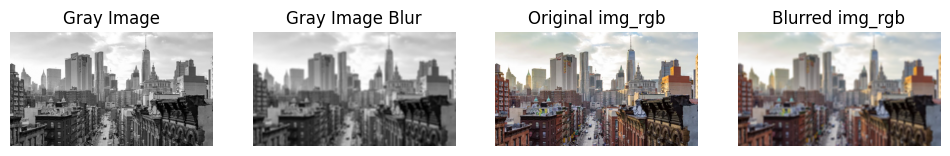

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# convreting img_rgb into gray image
r=img_rgb[:,:,0]
g=img_rgb[:,:,1]
b=img_rgb[:,:,2]
gray_img= 0.299 * r + 0.587 * g + 0.114 * b
# clipping and converting
gray_img=np.clip(gray_img,0,255).astype(np.uint8)
def average_blur_gray(img, ksize):
  #converting into float
     img=img.astype(np.float32)
     rows,cols=img.shape
     # creating a average blur kernel
     kernel=np.ones((ksize,ksize),dtype=np.float32)/ksize**2
     # reflect padding of widht (ksize-1)//2
     img_padded=np.pad(img,pad_width=(ksize-1)//2,mode="reflect")
     img_new=np.zeros((rows,cols),dtype=np.float32)
     for i in range(rows):
       for j in range(cols):
          # region of same size as of kernel to convolve with kernel centred at i,j
         region=img_padded[i:i+ksize,j:j+ksize]   # i-i+ksize, j-j+ksize
         img_new[i,j]=np.sum(region*kernel) # average values of neighbours

     return img_new

# making gray_image blur
gray_img_blur=average_blur_gray(gray_img,11)  # using higher ksize for better blur
# clipping and converting
gray_img_blur=np.clip(gray_img_blur,0,255).astype(np.uint8)
# plotting
plt.figure(figsize=(12,10))
plt.subplot(1,4,1)
plt.imshow(gray_img,cmap="gray")
plt.axis("off")
plt.title("Gray Image")

plt.subplot(1,4,2)
plt.imshow(gray_img_blur,cmap="gray")
plt.title("Gray Image Blur")
plt.axis("off")


# for rgb image
r_new =average_blur_gray(r, 11)  # convulution on r channel
g_new =average_blur_gray(g, 11)  # convulution on g channel
b_new =average_blur_gray(b, 11)  # convulution on b channel
#merging
img_rgb_blur=np.dstack((r_new,g_new,b_new))
# clipping
img_rgb_blur=np.clip(img_rgb_blur,[0,0,0],[255,255,255]).astype(np.uint8)
# plotting
plt.subplot(1,4,3)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original img_rgb")

plt.subplot(1,4,4)
plt.imshow(img_rgb_blur)
plt.axis("off")
plt.title("Blurred img_rgb")
plt.show()






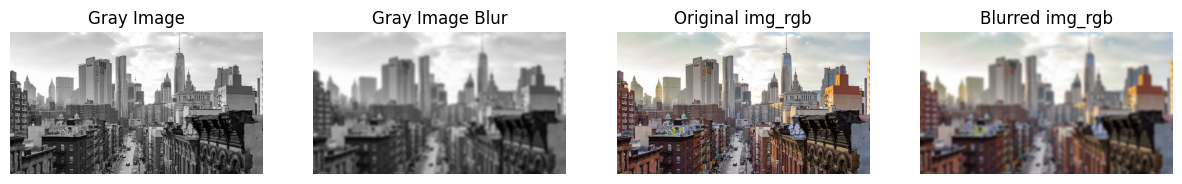

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def gaussian_kernel(ksize, sigma):
    grid = np.arange(-ksize//2+1 , ksize//2 + 1) #grid=[-1,0,1]for ksize=3 making cordinates at centre of kernel [0,0]
    # making two grids
    x, y = np.meshgrid(grid, grid) # x will store x-cordinate for each position in kernal centred at centre. Similary y
     # value in kernel depends on distance from centre . More close- More weighted
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))   # expression for gaussion propabilty distribution
    kernel = kernel / np.sum(kernel)   # to make sum of kernel =1

    return kernel
# making gaussian_kernel
gaussion_kernel=gaussian_kernel(15,6)  # ksize=9 and sigma=3 representing blur strength

# calling a function to convulve with kernel
# for gray_img
gray_img_blurred=convolve(gray_img,gaussion_kernel)
# clipping and converting
gray_img_blurred=np.clip(gray_img_blurred,0,255).astype(np.uint8)
# plotting
plt.figure(figsize=(15,8))
plt.subplot(1,4,1)
plt.imshow(gray_img,cmap="gray")
plt.title("Gray Image")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(gray_img_blurred,cmap="gray")
plt.title("Gray Image Blur")
plt.axis("off")


# for rgb img
r_new=convolve(r,gaussion_kernel) # convulution on r channel
g_new=convolve(g,gaussion_kernel) # convulution on g channel
b_new=convolve(b,gaussion_kernel)  # convulution on b channel

#merging
img_rgb_blur=np.dstack((r_new,g_new,b_new))
# clipping
img_rgb_blur=np.clip(img_rgb_blur,[0,0,0],[255,255,255]).astype(np.uint8)
# plotting
plt.subplot(1,4,3)
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Original img_rgb")

plt.subplot(1,4,4)
plt.imshow(img_rgb_blur)
plt.axis("off")
plt.title("Blurred img_rgb")
plt.show()













### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

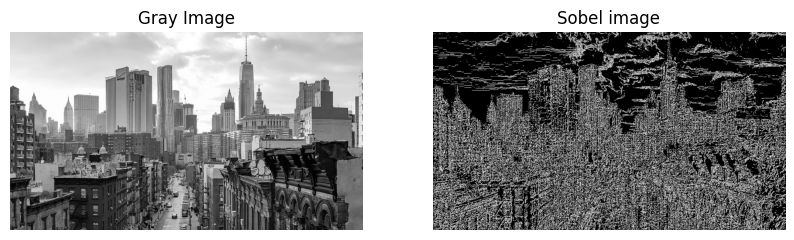

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img_rgb=img.convert("RGB")
img_rgb=np.array(img_rgb)
#def convolve(img,kernal):
   # img=img.astype(np.float32)
   # kernal=kernal.astype(np.float32)
   # rows2,cols2=kernal.shape
   # rows1,cols1=img.shape
   # img_padded=np.pad(img,pad_width=(rows2-1)//2,mode="reflect")
   # img_new=np.zeros((rows1,cols1),dtype=np.float32)
   # for i in range(rows1):
    #   for j in range(cols1):
    #      region=img_padded[i:i+rows2,j:j+cols2]

     #     img_new[i,j]=np.sum(region*kernal)


   # return img_new

# making sobel_x and sobel_y kernels of size 3
sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])   # subtracts left pixels from rigthpixels keeping centre pixels ignored detecting intensity change in x-direction
sobel_y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])   # subtracts top pixels from bottom pixels keeping centre pixels ignored detecting intensity change in y-direction


# convolving into gray_image
Gx=convolve(gray_img,sobel_x)# a 2d array of same size as of gray_image but each position represents intensity change in x-direction that is right pixels -left pixels
# clipping Gx and Gy to [0-255]and converting to int
Gx=np.clip(Gx,0,255).astype(np.uint8)
Gy=convolve(gray_img,sobel_y)# a 2d array of same size as of gray_image but each position represents intensity change in y-direction that is bottom pixels -top pixels
Gy=np.clip(Gy,0,255).astype(np.uint8)
# Gx detects vertical edges and Gy detects horizontal edges
# now detecting how strong the edge dectection at each pixel of gray_img
gradient_magnitude=np.sqrt(Gx**2+Gy**2)  # each pixel represent the strength of edge or intensity change
# normalizing to 0-255
gradient_magnitude=gradient_magnitude/np.max(gradient_magnitude)*255  # weak edges stays weak and strong edges stays strong
# thresholding the gradient with setting threshold=100 keeping only strong edges and removing weak edges
gradient_magnitude[gradient_magnitude<100]=0    # making image binary with 0(dark)-no edge and 255(white) means strong edge
gradient_magnitude=gradient_magnitude.astype(np.uint8)

#display
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(gray_img,cmap="gray")
plt.axis("off")
plt.title("Gray Image")

plt.subplot(1,2,2)
plt.imshow(gradient_magnitude,cmap="gray")
plt.axis("off")
plt.title("Sobel image")
plt.show()




### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

sharp_numpy: 228
sharp-cv2: 228


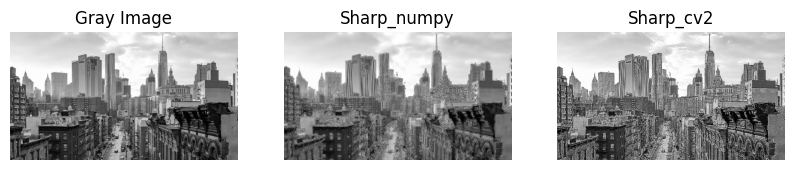

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# making 3x3 lapacian kernal (8-connected)
laplacian_kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
# convolving it on gray_image using function convolve(img,kernel)
lap=convolve(gray_img,laplacian_kernel)  # lap is to identify edges more strongly than sobel detection
# now boosting the intensity changes by increasing the contrast
alpha=1.0
sharp_numpy=gray_img.astype(np.float32)-lap*alpha
# clipping to [0-255]
sharp_numpy=np.clip(sharp_numpy,0,255).astype(np.uint8)

# using cv2
lap_cv2=cv2.Laplacian(gray_img,cv2.CV_32F,ksize=3)
sharp_cv2=gray_img-lap_cv2
sharp_cv2=np.clip(sharp_cv2,0,255).astype(np.uint8)

print("sharp_numpy:",sharp_numpy[100,100])
print("sharp-cv2:",sharp_cv2[100,100])

#display

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(gray_img,cmap="gray")
plt.axis("off")
plt.title("Gray Image")

plt.subplot(1,3,2)
plt.imshow(sharp_numpy,cmap="gray")
plt.axis("off")
plt.title("Sharp_numpy")

plt.subplot(1,3,3)
plt.imshow(sharp_cv2,cmap="gray")
plt.axis("off")
plt.title("Sharp_cv2")

plt.show()







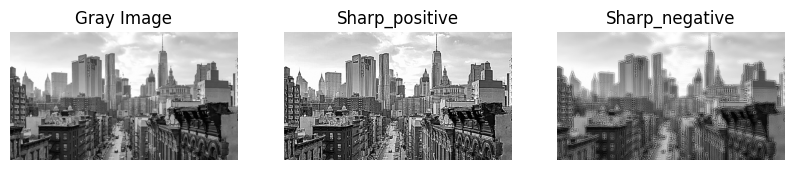

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
#unsharp masking
gaussion_kernel=gaussian_kernel(9,3) # kernal of size =9 and blur strenght =3
# making gray image blur
gray_img_blurred=convolve(gray_img,gaussion_kernel)
# subtracting blurred image from gray image
# operation in float values
mask=gray_img.astype(np.float32)-gray_img_blurred
# adding scaled mask again to gray_image
alpha=3.0
sharp_positive=gray_img.astype(np.float32)+alpha*mask  # sharp image
# clipping to [0-255]
sharp_positive=np.clip(sharp_positive,0,255).astype(np.uint8)

# for alpha negative
alpha=-3.0
sharp_negative=gray_img.astype(np.float32)+alpha*mask
#clipping
sharp_negative=np.clip(sharp_negative,0,255).astype(np.uint8)



# display
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(gray_img,cmap="gray")
plt.axis("off")
plt.title("Gray Image")

plt.subplot(1,3,2)
plt.imshow(sharp_positive,cmap="gray")
plt.axis("off")
plt.title("Sharp_positive")

plt.subplot(1,3,3)
plt.imshow(sharp_negative,cmap="gray")
plt.axis("off")
plt.title("Sharp_negative")


plt.show()





### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

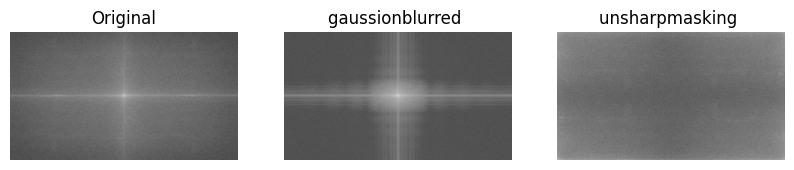

In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# for Original image
# fourier transform of gray_img
f_gray=np.fft.fft2(gray_img)
# shifitng low frequencies at centre
f_gray_shift=np.fft.fftshift(f_gray)
# computing magnitude
magnitude_gray=np.abs(f_gray_shift)
# converting into Decibals
magnitude_gray=20*np.log10(magnitude_gray)
# plotting
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(magnitude_gray,cmap="gray")
plt.axis("off")
plt.title("Original")

# for gaussion blured image
gaussion_k=gaussian_kernel(9,3) # kernel of size 9 and blur strength =3
gaussion_blurred_img=convolve(gray_img,gaussion_k)
gaussion_blurred_img=np.clip(gaussion_blurred_img,0,255).astype(np.uint8)
# fourier transform of gaussion_blurred_img
f_gaussion_blurred_img=np.fft.fft2(gaussion_blurred_img)
# shifitng low frequencies at centre
f_gaussion_blurred_img_shift=np.fft.fftshift(f_gaussion_blurred_img)
# computing magnitude
magnitude_gaussion_blurred_img=np.abs(f_gaussion_blurred_img_shift)
# converting into Decibals
magnitude_gaussion_blurred_img=20*np.log10(magnitude_gaussion_blurred_img)
# plotting
plt.subplot(1,3,2)
plt.imshow(magnitude_gaussion_blurred_img,cmap="gray")
plt.axis("off")
plt.title("gaussionblurred ")

# for unsharp masking image
# fourier transform of sharp_positive
f_sharp_positive=np.fft.fft2(sharp_positive)
# shifitng low frequencies at centre
f_sharp_positive_shift=np.fft.fftshift(f_sharp_positive)
# computing magnitude
magnitude_sharp_positive=np.abs(f_sharp_positive)
# converting into Decibals
magnitude_sharp_positive=20*np.log10(magnitude_sharp_positive)
# plotting
plt.subplot(1,3,3)
plt.imshow(magnitude_sharp_positive,cmap="gray")
plt.axis("off")
plt.title("unsharpmasking ")

plt.show()


# for original image we shift the low frequencies at the centre keeping high frequencies near the edges
# An original image is generally a low frequencies dominated which results in more smooth regions then edges and fine details .Smooth regions means gradual intensity changes concentred at the centre so it shows a brigth spot
# for gaussian image, we attennuated high frequnecies components making bright spot at the centre bigger dominating low frequencies which is same as passing low pass filter
# unsharp mask image enhances high frequences components which boosts the edges and fine details which boosts gradual intensity changes making centre dark .


### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

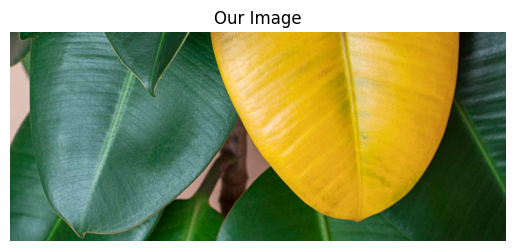

In [34]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

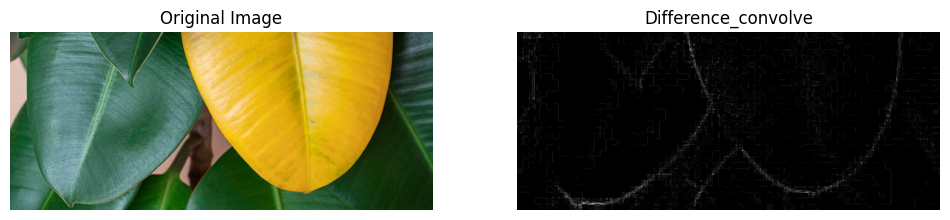

In [35]:

import numpy as np
import matplotlib.pyplot as plt
import cv2

img2_rgb=np.array(img_part5)
#converting in into float Values
img2_rgb=img2_rgb.astype(np.float32)
# seperating into channels
R=img2_rgb[:,:,0]
G=img2_rgb[:,:,1]
B=img2_rgb[:,:,2]
# R values are low on green leaf and high on yellow leaf
# at boundary of green and yellow leaf R values changes sharply while G and B values remains almost same
# img2_rgb=[low,high,low] on green leaf and img2_rgb=[high,high,low] on yellow leaf
# R-G which represent color difference at each postion is very neagtive on green leaf and close to 0 on yellow leaf
# Applying lapalcion edge detection on R-G  tells how each color difference value varies from its neighbours
laplacian_kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
Difference=R-G # a 2d array on which edge detection apply
# convolving detects the boundary of yellow and green leaf where R-G changes drastically
Difference_convolve=convolve(Difference,laplacian_kernel)
# clipping to [0-255]
#Difference_convolve=np.clip(Difference_convolve,0,255).astype(np.uint8)
# thresholding it for threshold =100
# take absoulte values of Difference_convolve as both positive large and neagtive large values  deals with edges
Difference_convolve=np.abs(Difference_convolve)
# normalizing to [0-255]
Difference_convolve=(Difference_convolve/np.max(Difference_convolve))*255
Difference_convolve=Difference_convolve.astype(np.uint8)
# thresholding with threshold=20
Difference_convolve[Difference_convolve<20]=0







#display
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img2_rgb.astype(np.uint8))
plt.axis("off")
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(Difference_convolve,cmap="gray")
plt.axis("off")
plt.title("Difference_convolve")
plt.show()



### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
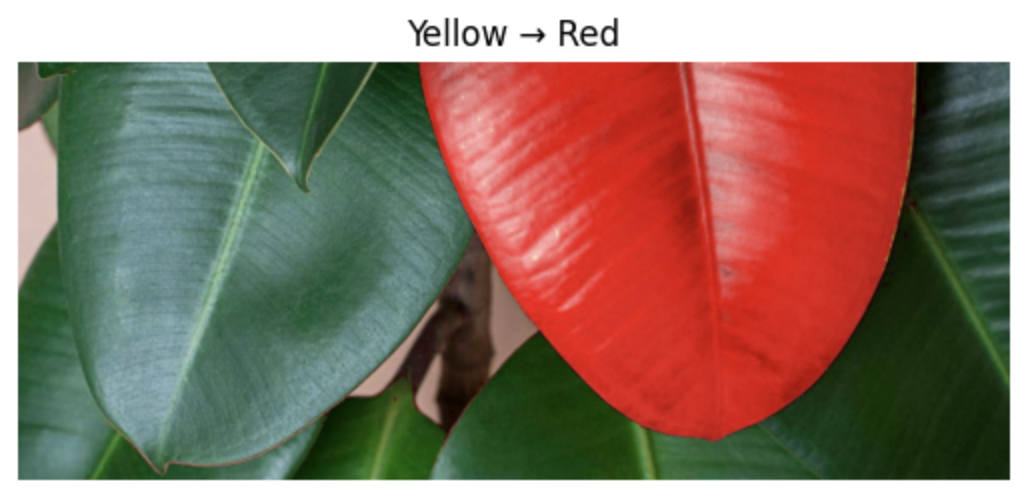

Also, we can change to a less brighter colour
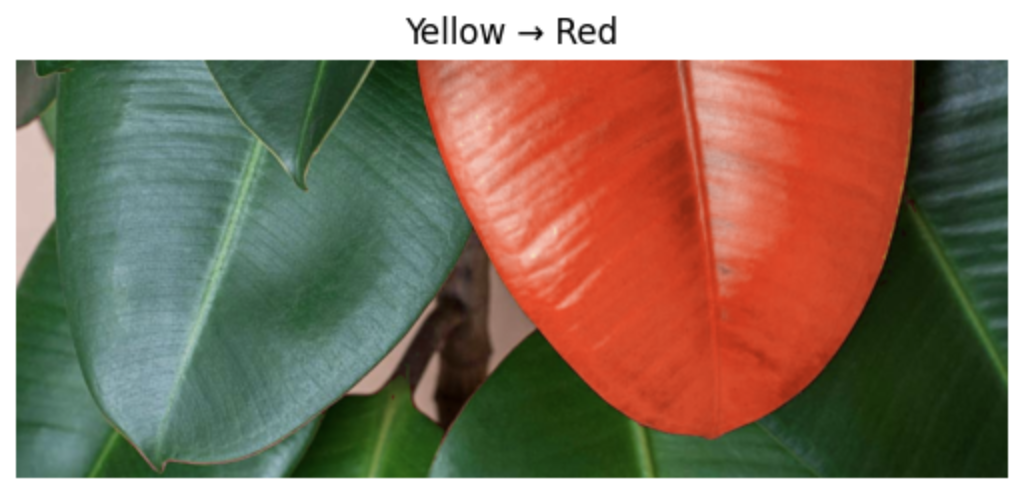

In [ ]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.